# %%%% **Reading the dataset** %%%%

# Generating a 1 big dataset called "combined_data.csv" because i realized there should be a number of the session related to its csv' rows. (this file is better) - also notice the dataframe is called "combined_df".
This dataset is a concatenation of several csv's saved in github under "data" folder (you need to download and run this code so it will allow you to upload the csv's in one click and generate the combined_data.csv.

In [ ]:
# Import necessary libraries
from google.colab import files
import pandas as pd

# Step 1: Upload CSV files
uploaded = files.upload()

# Step 2: Define the function to process the uploaded CSV files
def concatenate_csvs_with_session(filenames, output_file="combined_data.csv"):
    """
    This function takes a list of filenames, loads each CSV file, adds the session number
    extracted from the filename to a 'session' column, concatenates them into a single DataFrame,
    and saves the concatenated data to a CSV file.

    :param filenames: List of CSV filenames (strings).
    :param output_file: The name of the output CSV file to save the concatenated data.
    :return: The combined DataFrame.
    """
    # List to store individual DataFrames
    dfs = []

    # Loop through each file in the list of filenames and load them
    for filename in filenames:
        print(f"Loading file: {filename}")
        df = pd.read_csv(filename)
        # Extract session number from filename (assuming '24_' prefix in filenames)
        session_number = filename.split('_')[1].split('.')[0]  # Extracts the part after '24_' and before '.csv'
        df['session'] = session_number  # Add session column to the DataFrame
        dfs.append(df)  # Append the DataFrame to the list

    # Concatenate all the DataFrames into one large DataFrame
    combined_df = pd.concat(dfs, ignore_index=True)
    print("Combined DataFrame shape:", combined_df.shape)
    print(combined_df.head())  # Display the first few rows of the combined DataFrame

    # Save the combined DataFrame to a CSV file
    combined_df.to_csv(output_file, index=False)
    print(f"Combined DataFrame saved to {output_file}")

    return combined_df

# Step 3: Example usage with the uploaded CSV filenames
filenames = list(uploaded.keys())  # Get the filenames from the uploaded files
combined_df = concatenate_csvs_with_session(filenames, output_file="combined_data.csv")


# Here is the direct function to use the combined_data.csv path without viewing the file (because it doesn't require download)

In [ ]:
def csv_drive_path_generator(url):
    """
    Generates a direct download link from a Google Drive URL to read CSV files.

    Args:
    url (str): Google Drive sharing link for the CSV file.

    Returns:
    str: Direct link to download the CSV file.
    """
    # Extract the file ID from the Google Drive link
    file_id = url.split('/')[-2]
    # Create a direct download link
    path = f'https://drive.google.com/uc?export=download&id={file_id}'

    return path


import pandas as pd

# Replace this with your Google Drive file link
drive_link = 'https://drive.google.com/file/d/10JrEo5da5m4g-Sb9RfzXYGalD0sQ4V9a/view?usp=drive_link'

# Generate the direct download link
csv_path = csv_drive_path_generator(drive_link)

# Read the CSV directly into a DataFrame
combined_df = pd.read_csv(csv_path)

# Display the first few rows to confirm it's loaded correctly
print("First few rows of the combined dataset:")
print(combined_df.head())

# Get an overview of the dataset
print("\nCombined Dataset Information:")
print(combined_df.info())

# Check for missing values
print("\nMissing values per column in the combined dataset:")
print(combined_df.isnull().sum())


# This is how to read the dataset, if you use the first link to generate the combined_data.csv

In [ ]:
import pandas as pd
combined_df = pd.read_csv(r'combined_data.csv')

In [ ]:
combined_df.head()

In [ ]:
print(combined_df.info())

In [ ]:
# Count rows where 'speaker' is NaN and 'party' is 'הליכוד'
nan_speaker_likud = combined_df[(combined_df['speaker'].isna()) & (combined_df['party'] == 'הליכוד')]

# Print the number of such rows
print(f"Number of rows with NaN in 'speaker' and 'הליכוד' in 'party': {nan_speaker_likud.shape[0]}")


In [ ]:
# Fill NaN in the 'speaker' column where 'party' is 'הליכוד' and 'speaker' is not NaN
combined_df.loc[combined_df['party'] == 'הליכוד', 'speaker'] = combined_df.loc[combined_df['party'] == 'הליכוד', 'speaker'].fillna('Unknown')

# Verify the change by checking the first few rows and missing values in 'speaker'
print(combined_df.head())
print(f"Missing values in 'speaker': {combined_df['speaker'].isna().sum()}")


In [ ]:
# Find the rows where 'speaker' is NaN
combined_df.loc[combined_df['speaker'].isna(), 'speaker'] = pd.NA

# Verify the change
print(f"Number of missing values in 'speaker' after update: {combined_df['speaker'].isna().sum()}")
print(combined_df[combined_df['speaker'].isna()].head())  # Display rows where 'speaker' is NaN


In [ ]:
import numpy as np

# Set the rows where 'speaker' is NaN to explicitly have 'NaN' (using numpy NaN)
combined_df.loc[combined_df['speaker'].isna(), 'speaker'] = np.nan

# Verify the change
print(f"Number of missing values in 'speaker' after update: {combined_df['speaker'].isna().sum()}")
print(combined_df[combined_df['speaker'].isna()].head())  # Display rows where 'speaker' is NaN


In [ ]:
# Count the number of NaN values in the 'speaker' column
nan_count_in_speaker = combined_df['speaker'].isna().sum()

# Print the result
print(f"Number of NaN values in the 'speaker' column: {nan_count_in_speaker}")


In [ ]:
# Count rows where 'speaker' is NaN and 'party' is 'הליכוד'
nan_speaker_likud = combined_df[(combined_df['speaker'].isna()) & (combined_df['party'] == 'הליכוד')]

# Print the number of such rows
print(f"Number of rows with NaN in 'speaker' and 'הליכוד' in 'party': {nan_speaker_likud.shape[0]}")

In [ ]:
#How many missing in each coulmn
print(combined_df.isna().sum())

In [ ]:
combined_df.party.unique()
#one is called nan (probably a mistake or something we need to cleanup).
#At the end, there are a list of parties which i am not sure what they are exactly, so we need to check that later using knesset website.

In [ ]:
combined_df.session.unique()

In [ ]:
combined_df.role.unique()

In [ ]:
combined_df.speaker.unique()

In [ ]:
len(combined_df.speaker.unique())

****צריכים להיות רק 120 חברי כנסת***

You can see everything in the dataset is a string (object) and only one column is float64 (but this column is the same for all sessions because it is knesset 24).

Also there are important missing objects in column:  party, role, sub-subject
And another missing objects in other columns : role, sub_subject, knesset

No missing objects in columns: session, subject (subject might have strong relation with the text being said under a specific subject)

In order to address the features or new features, they are all need to be numeric for the pair plot, so we can pick the relevant features (for linear regression, the first model, we should see a linear connection for example).

The target (label) y in this regression problem is "Num_of_text_rows" spoken by **any** of the הליכוד speakers, so we need a column that counts how many rows each unique speaker spoke at a **specific** session. (again a numeric column)

the features X could be whatever we choose.
possible features:

1. לכל חבר כנסת יש דירוג מספרי במפלגה שלו אז חשבתי לשים בכל מפלגה את דירוג החבר ואולי הדירוג משפיע על כמה שאותו חבר כנסת מדבר.
2. גודל המפלגה הוא כגודל המנדטים או כמות החברי כנסת במפלגה ובכל מקרה גם זה נומרי וגם זה יישתל בעמודה ניפרדת בהתאם למפלגה. ייתכן וזה משפיע מאוד על כמות הדיבור במליאה, כי גודל הזמן שניתן לדיבור במליאה הינו בקשר ישיר לגודל המפלגה, עפ"י מה שכתוב באתר הכנסת.
3. count לספור את מספר התווים בכל טקסט וכך בכל שורה יהיה נתון מספרי כמה החבר כנסת פותח את הפה. זה ייקח בחשבון כל תו כי יש טקסט שלפעמים אין בו כלום חוץ מסתם קיווקוו או רווח ויובל אמר שגם את זה אנו צריכים לספור.
4. count vectorizer (bag of words) - למעשה זה כמו פיצ'ר 3 אבל כאן יש דגש על המילים שהכי נאמרות בקובץ טקסט וכמה מכל מילה כזו יש, צריך לקחת בחשבון שלמעשה זה יוצר המון עמודות וצריך להגביל את זה אחרת יש בעיה של n>>p.

Imputing party in corrsepondance with speaker -
We need to impute the right party to the right speaker and that is something i did, and still working on. this is super important because if there is even one additional note then the code will not manage to capture and impute the party for that speaker with the same name + diffrenet number of notes.

# %%%%%%%%% **OLD** %%%%%%%%%

## Creating a dictionary of הליכוד roles per speaker חבר כנסת and imputing them to the role column. details were taken from אתר הכנסת

In [ ]:
# # Cleaned dictionary with correct syntax and no empty strings
# dict_knesset_24 = {
#     'יולי יואל אדלשטיין': 'יו"ר ועדת חוץ וביטחון וחבר כנסת מטעם הליכוד',
#     'אורלי לוי אבקסיס': 'חברת כנסת מטעם הליכוד',  # Provide a placeholder role if missing
#     'יריב לוין': 'סגן ראש הממשלה שר המשפטים',
#     'אופיר אקוניס': 'שר החדשנות המדע והטכנולוגיה',
#     'בנימין נתניהו': 'ראש הממשלה',
#     'אופיר כץ': 'חבר כנסת מטעם הליכוד',
#     'דוד אמסלם': 'חבר כנסת מטעם הליכוד',  # Added a placeholder role
#     'גלית דיסטל אטבריאן': 'חברת כנסת מטעם הליכוד',  # Added a placeholder role
#     'שלמה קרעי': 'שר התקשורת',
#     'פטין מולא': 'חבר כנסת מטעם הליכוד',  # Added a placeholder role
#     'אמיר אוחנה': 'יושב–ראש הכנסת',
#     'מאי גולן': 'חברת כנסת מטעם הליכוד',  # Added a placeholder role
#     'מירי מרים רגב': 'שרת התחבורה והבטיחות בדרכים',
#     'יואב קיש': 'שר החינוך, שיתוף פעולה אזורי והשר המקשר בין הממשלה לכנסת',
#     'אלי כהן': 'שר האנרגיה והתשתיות',
#     'יואב גלנט': 'שר הביטחון',  # Added a placeholder role
#     'דסטה גדי יברקן': 'חבר כנסת מטעם הליכוד',  # Added a placeholder role
#     'ישראל כץ': 'שר החוץ',
#     'יובל שטייניץ': 'שר האוצר',  # Added a placeholder role
#     'קטי קטרין שטרית': 'חברת כנסת מטעם הליכוד',  # Added a placeholder role
#     'ניר ברקת': 'שר הכלכלה והתעשייה',
#     'אבי דיכטר': 'שר החקלאות ופיתוח הכפר',
#     'קרן ברק': 'חברת כנסת מטעם הליכוד',  # Added a placeholder role
#     'דוד ביטן': 'יו"ר ועדת הכלכלה',
#     'חיים כץ': 'שר התיירות',
#     'גילה גמליאל': 'שרת המודיעין',
#     'חוה אתי עטייה': 'חברת כנסת מטעם הליכוד',  # Added a placeholder role
#     'מכלוף מיקי זוהר': 'שר התרבות והספורט',
#     'צחי הנגבי': 'שר לעניינים אסטרטגיים'
# }

# # Use the dictionary to fill the 'role' column for speakers with missing roles
# combined_df.loc[:, 'role'] = combined_df.apply(
#     lambda row: dict_knesset_24.get(row['speaker'], row['role']), axis=1
# )

# # Verify the change
# print(combined_df.head())
# print(f"Number of missing roles: {combined_df['role'].isna().sum()}")




In [ ]:
# # Display the speaker and role columns
# speaker_role_result = combined_df[['speaker', 'role']]

# # Show the first few rows to verify
# speaker_role_result.head(10)

In [ ]:

# Count unique speaker-role pairs
#unique_speaker_role_count = speaker_role_result.drop_duplicates()

#unique_speaker_role_count

In [ ]:

# Count unique speaker-role pairs
#unique_speaker_role_count = speaker_role_result.drop_duplicates().shape[0]

# Display the count
#unique_speaker_role_count


#So the imputation need to be for 173 pairs by speaker and role.
#And those lucking a role need to be found.

In [ ]:
combined_df.info()

In [ ]:
# # Filter rows where 'role' is missing but 'speaker' is not null
# missing_roles = combined_df[combined_df['role'].isna() & combined_df['speaker'].notna()]

# # Display the rows with missing 'role'
# print("Rows with missing 'role' for a valid 'speaker':")
# print(missing_roles)


In [ ]:
# # Find unique speakers where 'role' is missing
# speakers_with_missing_roles = combined_df[combined_df['role'].isna() & combined_df['speaker'].notna()]['speaker'].unique()

# # Display the unique speakers
# print("Speakers with missing roles:")
# print(speakers_with_missing_roles)


In [ ]:
# # Count the number of unique speakers with missing roles
# unique_speakers_count = len(speakers_with_missing_roles)

# unique_speakers_count

# #unique speakers with missing roles=86

# Provided likud speakers in the dataset

In [ ]:
# Step 1: Find the speakers that belong to 'הליכוד'
likud_speakers = combined_df[combined_df['party'] == 'הליכוד']['speaker'].unique()
print(likud_speakers)

# Step 2: Count the number of unique speakers
likud_speaker_count = len(likud_speakers)
print(f"Number of unique speakers in הליכוד: {likud_speaker_count}")



# likud speakers that are missing in the dataset: {'אלי כהן', 'קטי קטרין שטרית'}



In [ ]:
# Provided list of Likud speakers from knesset website (knesset 24)
likud_speakers_provided = [
    "יולי יואל אדלשטיין", "אמיר אוחנה", "דוד אמסלם", "אופיר אקוניס", "דוד ביטן",
    "קרן ברק", "ניר ברקת", "מאי גולן", "יואב גלנט", "גילה גמליאל", "אבי דיכטר",
    "גלית דיסטל אטבריאן", "צחי הנגבי", "מכלוף מיקי זוהר", "דסטה גדי יברקן",
    "אלי אליהו כהן", "אופיר כץ", "חיים כץ", "ישראל כץ", "אורלי לוי אבקסיס",
    "יריב לוין", "פטין מולא", "בנימין נתניהו", "אופיר סופר", "חוה אתי עטייה",
    "טלי פלוסקוב", "יואב קיש", "שלמה קרעי", "מירי מרים רגב", "יובל שטייניץ",
    "קטי קטרין"
    ]

# Assuming `likud_speakers` is the original list of Likud speakers from your dataset:
# These are the speakers in the combined_data.csv.
likud_speakers_dataset = [
'יולי יואל אדלשטיין', 'אורלי לוי אבקסיס', 'יריב לוין', 'אופיר אקוניס',
 'בנימין נתניהו', 'אופיר כץ', 'דוד אמסלם', 'גלית דיסטל אטבריאן', 'שלמה קרעי',
 'פטין מולא', 'אמיר אוחנה', 'מאי גולן', 'מירי מרים רגב', 'יואב קיש', 'אלי כהן',
 'יואב גלנט', 'דסטה גדי יברקן', 'ישראל כץ', 'יובל שטייניץ', 'קטי קטרין שטרית',
 'ניר ברקת', 'אבי דיכטר', 'קרן ברק', 'דוד ביטן', 'חיים כץ', 'גילה גמליאל',
 'חוה אתי עטייה', 'מכלוף מיקי זוהר', 'צחי הנגבי'
]

# Step 1: Count the number of unique speakers in the provided list
provided_count = len(likud_speakers_provided)
print(f"Number of unique speakers in the provided list: {provided_count}")

# Step 2: Find missing speakers from the dataset-derived list
missing_speakers = set(likud_speakers_dataset) - set(likud_speakers_provided)
print(f"Speakers in the dataset but not in the provided list: {missing_speakers}")


In [ ]:
# Step 1: Capture the original unique parties before any modifications
original_parties = set(combined_df['party'].dropna().unique())  # Drop NaN to consider only valid parties

# Step 2: Apply transformations to the DataFrame (imputation or corrections)
# Updating the 'party' column based on the 'speaker' list
combined_df.loc[combined_df['speaker'].isin(likud_speakers) & combined_df['party'].isna(), 'party'] = 'הליכוד'
combined_df.loc[combined_df['speaker'].isin(likud_speakers) & (combined_df['party'] != 'הליכוד'), 'party'] = 'הליכוד'

# Step 3: Capture the unique parties after the modifications
updated_parties = set(combined_df['party'].dropna().unique())

# Step 4: Calculate added and removed parties
added_parties = updated_parties - original_parties
removed_parties = original_parties - updated_parties

# Step 5: Print the results
print(f"Number of parties added: {len(added_parties)}")
print(f"Added parties: {added_parties}")
print(f"Number of parties removed: {len(removed_parties)}")
print(f"Removed parties: {removed_parties}")


In [ ]:
combined_df.info()

In [ ]:
#ORIGINAL CODE** I used the code below instead******************
# Step 1: Find the speakers that belong to 'הליכוד'
likud_speakers = combined_df[combined_df['party'] == 'הליכוד']['speaker'].unique()

# Step 2: Update the 'party' column for rows where the 'speaker' is in the list of 'הליכוד' speakers
# and where the 'party' column is missing or incorrect
combined_df.loc[combined_df['speaker'].isin(likud_speakers) & combined_df['party'].isna(), 'party'] = 'הליכוד'

# Step 3: Check if there are any mistakes (incorrect party values for 'הליכוד' speakers)
combined_df.loc[combined_df['speaker'].isin(likud_speakers) & (combined_df['party'] != 'הליכוד'), 'party'] = 'הליכוד'

# Verify the change
print(combined_df.head())

#In this code these are the same number of changes in step 2 and 3. meannig they are the same  speakers in both stages.
#So I created the code below with a condition in stage 3:

##### Of course they are the same speakers of likud, but i was trying to impute the party for the speakers from likud
##### who don't have a party
##### and for those who have a mistake in the party (=different than likud) and to also change there to likud



In [ ]:
print(set(df['party']) - set(combined_df['party']))  # Added parties
print(set(combined_df['party']) - set(df['party']))  # Removed parties


In [ ]:
#CORECTED CODE
# Step 1: Find the speakers that belong to 'הליכוד'
likud_speakers = combined_df[combined_df['party'] == 'הליכוד']['speaker'].unique()

#checking stage 2
# Count rows BEFORE the update
before_update_count = combined_df.loc[combined_df['speaker'].isin(likud_speakers) & combined_df['party'].isna()].shape[0]

# Update the 'party' column
combined_df.loc[combined_df['speaker'].isin(likud_speakers) & combined_df['party'].isna(), 'party'] = 'הליכוד'

# Count rows AFTER the update
after_update_count = combined_df.loc[(combined_df['speaker'].isin(likud_speakers)) & (combined_df['party'] == 'הליכוד')].shape[0]

# Display the number of rows that were updated
updated_rows_count = after_update_count - before_update_count
print(f"Number of rows updated to 'הליכוד': {updated_rows_count}")


In [ ]:
#Checking stage 3 WE NEED THIS CONDITION OTHERWISE WE GET THE SAME NUMBER OF UPDATED ROWS IN STAGE 3 THAT WERE ALREADY UPDATED IN STAGE 2
# תנאי שלב 3 מתוקן
step_3_condition = (
    combined_df['speaker'].isin(likud_speakers) &
    (combined_df['party'] != 'הליכוד') &
    combined_df['party'].notna()  # לוודא שלא מדובר בשורות שעודכנו בשלב 2
)

# ספירת שורות בשלב 3 לאחר התיקון
step_3_rows_fixed = combined_df.loc[step_3_condition]
print(f"שורות לעדכון בשלב 3 לאחר התיקון: {step_3_rows_fixed.shape[0]}")

# ביצוע עדכון שלב 3
combined_df.loc[step_3_condition, 'party'] = 'הליכוד'





In [ ]:
# Count the number of rows with 'nan' in the 'party' column
combined_df['party'].isna().sum()


That is a list of speakers that don't have a role in the role column:

In [ ]:
# Filter the rows where 'role' is either nan or an empty string
filtered_speakers = combined_df[combined_df['role'].isna() | (combined_df['role'] == '')]

# Get the unique 'speaker' values from the filtered rows
unique_speakers_with_no_role = filtered_speakers['speaker'].unique()

# Print the unique speakers
print("Unique speakers with no role (nan or empty):")
for speaker in unique_speakers_with_no_role:
    print(speaker)


In [ ]:
#how many
len(speakers_with_missing_roles)


In this list we see the speakers that have a party and which speaker is grouped in which party :

In [ ]:
# Group by 'party' and list the speakers associated with each party
grouped_by_party = combined_df.groupby('party')['speaker'].apply(list).reset_index()

# Display the grouped information
print(grouped_by_party)


Again speakers grouped in parties but now the unique speakers, better visualization :

In [ ]:
# Group by 'party' and list unique speakers associated with each party
grouped_by_party_unique = combined_df.groupby('party')['speaker'].apply(lambda x: list(set(x))).reset_index()

# Display the grouped information with unique speakers
print(grouped_by_party_unique)


## Creating a dictionary of speaker with their corresponding party to try and impute the parties, in order to reduce number of missing parties (again using knesset website)

In [ ]:
import pandas as pd

# DataFrame with columns ['Speaker', 'Party']
# Create a dictionary manually for each speaker with their corresponding party
speaker_to_party = {
    'מיקי לוי': 'יש עתיד',
    'יעקב אשר': 'יהדות התורה',
    'דוד ביטן': 'הליכוד',
    'איתן גינזבורג': 'כחול לבן',
    'צבי האוזר': 'תקווה חדשה',
    'אחמד טיבי': 'הרשימה המשותפת',
    'אמילי מואטי': 'העבודה',
    'יעקב מרגי': 'ש"ס',
    'יבגני סובה': 'ישראל ביתנו',
    'מנסור עבאס': 'רע"מ',
    'זועבי': 'מרצ',
    'ניר אורבך': 'ימינה',
    'אלכס קושניר': 'ישראל ביתנו',
    'מיכאל ביטון': 'כחול לבן',
    'רם בן ברק': 'יש עתיד',
    'סעיד אלחרומי': 'רע"מ',
    'וליד טאהא': 'רע"מ',
    'גלעד קריב': 'העבודה',
    'שרן השכל': 'תקווה חדשה',
    'אפרת רייטן': 'העבודה',
    'עידית סילמן': 'ימינה',
    'מירב בן-ארי': 'יש עתיד',
    'יוליה מלינובסקי': 'ישראל ביתנו',
    'עאידה תומה סלימאן': 'הרשימה המשותפת',
    'מיכל שיר': 'תקווה חדשה',
    'יעל רון בן משה': 'כחול לבן',
    'מוסי רז': 'מרצ',
    'רם שפע': 'העבודה',
    'אבתיסאם מראענה': 'העבודה',
    'יריב לוין': 'הליכוד',
    'בועז טופורובסקי': 'יש עתיד',
    'מיכאל מלכיאלי': 'ש"ס',
    'ישראל אייכלר': 'יהדות התורה',
    'אורית סטרוק': 'הציונות הדתית',
    'סאמי אבו שחאדה': 'הרשימה המשותפת',
    'מיכל רוזין': 'מרצ',
    'בנימין נתניהו': 'הליכוד'
    # Add more speakers and their corresponding party information here
}

# Replace all 'Party' values using the 'Speaker' to 'Party' mapping
combined_df['party'] = combined_df['speaker'].map(speaker_to_party)


In [ ]:
print(combined_df.info())  #For some reason after your imputaion above we have less party count compared to the original party count in the start of the file, party was=7428  non-noul

In [ ]:
# Count the number of missing values in the 'party' column
missing_party_count = combined_df['party'].isna().sum()

print(f"Number of missing values in 'party': {missing_party_count}")


In [ ]:
# Impute 'party' based on 'speaker'
combined_df['party'] = combined_df['party'].fillna(combined_df['speaker'].map(speaker_to_party))


In [ ]:
missing_parties = combined_df[combined_df['party'].isna()]
print(missing_parties[['speaker', 'party']])


##These are the unique speakers that are still remained unmapped, look at the notes in some of their names:

In [ ]:
# Check unique unmapped speakers
unmapped_speakers = combined_df[combined_df['party'].isna() & combined_df['speaker'].notna()]['speaker'].unique()
print(unmapped_speakers)


Number of rows with missing party :

In [ ]:
# Count the number of missing values in the 'party' column
missing_party_count = combined_df['party'].isna().sum()

print(f"Number of missing values in 'party': {missing_party_count}")

In [ ]:
import pandas as pd

# Step 1: Define the speaker-to-party mapping
speaker_to_party = {}

# Add mappings for each party
likud_speakers = [
    "יולי יואל אדלשטיין", "אמיר אוחנה", "דוד אמסלם", "אופיר אקוניס", "דוד ביטן",
    "קרן ברק", "ניר ברקת", "מאי גולן", "יואב גלנט", "גילה גמליאל", "אבי דיכטר",
    "גלית דיסטל אטבריאן", "צחי הנגבי", "מכלוף מיקי זוהר", "דסטה גדי יברקן",
    "אלי אליהו כהן", "אופיר כץ", "חיים כץ", "ישראל כץ", "אורלי לוי אבקסיס",
    "יריב לוין", "פטין מולא", "בנימין נתניהו", "אופיר סופר", "חוה אתי עטייה",
    "טלי פלוסקוב", "יואב קיש", "שלמה קרעי", "מירי מרים רגב", "יובל שטייניץ",
    "קטי קטרין"
]
for speaker in likud_speakers:
    speaker_to_party[speaker] = "הליכוד"
#######################################################
# Add mappings for other parties (shortened for brevity, use your full list)
yesh_atid_speakers = ["יאיר לפיד", "מירב כהן", "אורנה ברביבאי"]
for speaker in yesh_atid_speakers:
    speaker_to_party[speaker] = "יש עתיד"
#####################################################
# Add Shas speakers to the mapping
shas_speakers = [
    "משה אבוטבול", "ינון אזולאי", "משה ארבל", "אוריאל בוסו", "חיים ביטון",
    "יואב בן צור", "אריה מכלוף דרעי", "יוסף טייב", "מיכאל מלכיאלי", "יעקב מרגי"
]

# Assign "ש\"ס" to all these speakers
for speaker in shas_speakers:
    speaker_to_party[speaker] = "ש\"ס"
####################################################
# Add Blue and White speakers to the mapping
blue_and_white_speakers = [
    "מיכאל מרדכי ביטון", "איתן גינזבורג", "בני גנץ", "רות וסרמן לנדה",
    "אלון טל", "חילי טרופר", "מופיד מרעי", "אורית פרקש הכהן",
    "יעל רון בן משה", "אלון שוסטר", "פנינה תמנו"
]

# Assign "כחול לבן" to all these speakers
for speaker in blue_and_white_speakers:
    speaker_to_party[speaker] = "כחול לבן"
#####################################################
# Add יהדות התורה speakers to the mapping
yahadut_hatora_speakers = [
    "ישראל אייכלר",
    "יעקב אשר",
    "אליהו ברוכי",
    "משה גפני",
    "יעקב טסלר",
    "יעקב ליצמן",
    "אורי מקלב",
   "יצחק זאב פינדרוס",
   "מאיר פרוש"
]

# Assign "יהדות התורה" to all these speakers
for speaker in yahadut_hatora_speakers:
    speaker_to_party[speaker] = "יהדות התורה"
#################################################
# Add ימינה speakers to the mapping
yamina_speakers = [
      "ניר אורבך",
      "נפתלי בנט",
      "מתן כהנא",
      "יום טוב חי כלפון",
      "עידית סילמן",
      "שירלי פינטו קדוש",
      "אביר קארה",
      "עמיחי שיקלי",
      "אילת שקד"
]

# Assign " ימינה" to all these speakers
for speaker in yamina_speakers:
    speaker_to_party[speaker] = "ימינה"
##################################################
# Add הרשימה המשותפת speakers to the mapping
hareshima_hameshutefet_speakers = [
      "סמי אבו שחאדה",
      "אחמד טיבי",
      "עופר כסיף",
      "אוסאמה סעדי",
      "איימן עודה",
      "עאידה תומא סלימאן"
]

# Assign " הרשימה המשותפת" to all these speakers
for speaker in hareshima_hameshutefet_speakers:
    speaker_to_party[speaker] = "הרשימה המשותפת"
####################################################
# Add  מרצ speakers to the mapping
meretz_speakers = [
      "יאיר גולן",
      "ניצן הורוביץ",
      "תמר זנדברג",
      "גבי לסקי",
      "עלי סלאלחה",
      "'/עיסאווי פריג",
      "מיכל רוזין",
      "מוסי רז",
ג'/ידא רינאוי זועבי
# Assign "  מרצ" to all these speakers
for speaker in meretz_speakers:
    speaker_to_party[speaker] =  "מרצ"
###################################################
# Add  הציונות הדתית speakers to the mapping
hazionut_hadatit_speakers = [
      "איתמר בן גביר",
      "מיכל מרים וולדיגר",
      "אבי מעוז",
      "אופיר סופר",
      "אורית סטרוק",
      "'/בצלאל סמוטריץ",
      "שמחה רוטמן"
]

# Assign "  הציונות הדתית" to all these speakers
for speaker in hazionut_hadatit_speakers:
    speaker_to_party[speaker] =  "הציונות הדתית"
##################################################
# Add תקווה חדשה Speakers to the mapping
tikva_hadasha_speakers = [

        "זאב אלקין",
        "זאב בנימין בגין",
        "מישל בוסקילה",
        "צבי האוזר",
        "יועז הנדל",
        "שרן מרים השכל",
        "מאיר יצחק-הלוי",
        "גדעון סער",
        "יפעת שאשא ביטון",
        "מיכל שיר סגמן"
]

# Assign "  תקווה חדשה" to all these speakers
for speaker in tikva_hadasha_speakers:
    speaker_to_party[speaker] =  "תקווה חדשה"
###################################################
# Add S הרשימה הערבית המאוחדת  speakers to the mapping
hareshima_haaravit_speakers = [

        " סעיד אלחרומי",
        "מאזן גנאים",
        "אימאן חטיב יאסין",
        "ווליד טאהא",
        "מנסור עבאס",
]

# Assign "  הרשימה הערבית המאוחדת "" to all these speakers
for speaker in hareshima_haaravit_speakers:
    speaker_to_party[speaker] =  "הרשימה הערבית המאוחדת"
#################################################
# Step 2: Define the pipeline
def preprocess_data(df):
    """
    Preprocess the DataFrame to impute missing parties and compute party_row_count.
    """
    # Impute missing parties based on the speaker name
    df['party'] = df.apply(
        lambda row: speaker_to_party.get(row['speaker'], row['party']),
        axis=1
    )

    # Recompute party_row_count
    party_counts = (
        df.groupby(['session', 'party'])
        .size()
        .reset_index(name='party_row_count')
    )
    df = df.merge(party_counts, on=['session', 'party'], how='left')

    return df

df = pd.DataFrame(combined_df)

# Process the data
processed_combined_df = preprocess_data(df)

# Display the result
print(processed_combined_df)


In [ ]:
processed_combined_df.head(20)

In [ ]:
processed_combined_df.info()

In [ ]:
def preprocess_data(df):
    """
    Preprocess the DataFrame to impute missing parties and compute party_row_count.
    """
    # Ensure the DataFrame contains the necessary columns
    required_columns = {'speaker', 'party', 'session'}
    if not required_columns.issubset(df.columns):
        raise ValueError(f"DataFrame must contain columns: {required_columns}")

    # Impute missing 'party' values based on the speaker name
    df['party'] = df.apply(
        lambda row: speaker_to_party.get(row['speaker'], row['party']),
        axis=1
    )

    # Compute party_row_count for each combination of session and party
    party_counts = (
        df.groupby(['session', 'party'])
        .size()
        .reset_index(name='party_row_count')
    )

    # Merge the computed counts back into the original DataFrame
    df = df.merge(party_counts, on=['session', 'party'], how='left')

    return df


In [ ]:
processed_combined_df = preprocess_data(combined_df)
print(processed_combined_df)

##These are the mapping of the speakers from הליכוד : (based on knesset website, knesset 24)


In [ ]:
# Add Likud speakers to the mapping
likud_speakers = [
    "יולי יואל אדלשטיין", "אמיר אוחנה", "דוד אמסלם", "אופיר אקוניס", "דוד ביטן",
    "קרן ברק", "ניר ברקת", "מאי גולן", "יואב גלנט", "גילה גמליאל", "אבי דיכטר",
    "גלית דיסטל אטבריאן", "צחי הנגבי", "מכלוף מיקי זוהר", "דסטה גדי יברקן",
    "אלי אליהו כהן", "אופיר כץ", "חיים כץ", "ישראל כץ", "אורלי לוי אבקסיס",
    "יריב לוין", "פטין מולא", "בנימין נתניהו", "אופיר סופר", "חוה אתי עטייה",
    "טלי פלוסקוב", "יואב קיש", "שלמה קרעי", "מירי מרים רגב", "יובל שטייניץ",
    "קטי קטרין"
]

# Assign "הליכוד" to all these speakers
for speaker in likud_speakers:
    speaker_to_party[speaker] = "הליכוד"


##These are the mapping of the speakers from יש עתיד : (based on knesset website, knesset 24)

In [ ]:
# Add Yesh Atid speakers to the mapping
yesh_atid_speakers = [
    "קארין אלהרר", "ענבר בזק", "ולדימיר בליאק", "מירב בן ארי", "רם בן ברק",
    "אורנה ברביבאי", "סימון דוידסון", "בועז טופורובסקי", "משה טור פז", "מאיר כהן",
    "מירב כהן", "רון כץ", "יוראי להב הרצנו", "מיקי לוי", "יאיר לפיד",
    "טטיאנה מזרסקי", "יואב סגלוביץ", "יסמין פרידמן", "עידן רול",
    "יואל רזבוזוב", "אלעזר שטרן", "נירה שפק"
]

# Assign "יש עתיד" to all these speakers
for speaker in yesh_atid_speakers:
    speaker_to_party[speaker] = "יש עתיד"


##These are the mapping of the speakers from ש"ס: (based on knesset website, knesset 24)

In [ ]:
# Add Shas speakers to the mapping
shas_speakers = [
    "משה אבוטבול", "ינון אזולאי", "משה ארבל", "אוריאל בוסו", "חיים ביטון",
    "יואב בן צור", "אריה מכלוף דרעי", "יוסף טייב", "מיכאל מלכיאלי", "יעקב מרגי"
]

# Assign "ש\"ס" to all these speakers
for speaker in shas_speakers:
    speaker_to_party[speaker] = "ש\"ס"


##These are the mapping of the speakers from כחול לבן : (based on knesset website, knesset 24)

In [ ]:
# Add Blue and White speakers to the mapping
blue_and_white_speakers = [
    "מיכאל מרדכי ביטון", "איתן גינזבורג", "בני גנץ", "רות וסרמן לנדה",
    "אלון טל", "חילי טרופר", "מופיד מרעי", "אורית פרקש הכהן",
    "יעל רון בן משה", "אלון שוסטר", "פנינה תמנו"
]

# Assign "כחול לבן" to all these speakers
for speaker in blue_and_white_speakers:
    speaker_to_party[speaker] = "כחול לבן"


##These are the mapping of the speakers from יהדות התורה: (based on knesset website, knesset 24)

In [ ]:
# Add יהדות התורה speakers to the mapping
yahadut_hatora_speakers = [
    "ישראל אייכלר",
    "יעקב אשר",
    "אליהו ברוכי",
    "משה גפני",
    "יעקב טסלר",
    "יעקב ליצמן",
    "אורי מקלב",
   "יצחק זאב פינדרוס",
   "מאיר פרוש"
]

# Assign "יהדות התורה" to all these speakers
for speaker in yahadut_hatora_speakers:
    speaker_to_party[speaker] = "יהדות התורה"

##These are the mapping of the speakers from ימינה : (based on knesset website, knesset 24)

In [ ]:
# Add ימינה speakers to the mapping
yamina_speakers = [
      "ניר אורבך",
      "נפתלי בנט",
      "מתן כהנא",
      "יום טוב חי כלפון",
      "עידית סילמן",
      "שירלי פינטו קדוש",
      "אביר קארה",
      "עמיחי שיקלי",
      "אילת שקד"
]

# Assign " ימינה" to all these speakers
for speaker in yamina_speakers:
    speaker_to_party[speaker] = "ימינה"


##These are the mapping of the speakers from הרשימה המשותפת : (based on knesset website, knesset 24)

In [ ]:
# Add הרשימה המשותפת speakers to the mapping
hareshima_hameshutefet_speakers = [
      "סמי אבו שחאדה",
      "אחמד טיבי",
      "עופר כסיף",
      "אוסאמה סעדי",
      "איימן עודה",
      "עאידה תומא סלימאן"
]

# Assign " הרשימה המשותפת" to all these speakers
for speaker in hareshima_hameshutefet_speakers:
    speaker_to_party[speaker] = "הרשימה המשותפת"

##These are the mapping of the speakers from מרצ : (based on knesset website, knesset 24)

In [ ]:
# Add  מרצ speakers to the mapping
meretz_speakers = [
      "יאיר גולן",
      "ניצן הורוביץ",
      "תמר זנדברג",
      "גבי לסקי",
      "עלי סלאלחה",
      "'/עיסאווי פריג",
      "מיכל רוזין",
      "מוסי רז",
      "ג/'ידא רינאוי זועבי"
]

# Assign "  מרצ" to all these speakers
for speaker in meretz_speakers:
    speaker_to_party[speaker] =  "מרצ"

In [ ]:
# Add  הציונות הדתית speakers to the mapping
hazionut_hadatit_speakers = [
      "איתמר בן גביר",
      "מיכל מרים וולדיגר",
      "אבי מעוז",
      "אופיר סופר",
      "אורית סטרוק",
      "'/בצלאל סמוטריץ",
      "שמחה רוטמן"
]

# Assign "  הציונות הדתית" to all these speakers
for speaker in hazionut_hadatit_speakers:
    speaker_to_party[speaker] =  "הציונות הדתית"

##These are the mapping of the speakers from תקווה חדשה : (based on knesset website, knesset 24)

In [ ]:
# Add תקווה חדשה Speakers to the mapping
tikva_hadasha_speakers = [

        "זאב אלקין",
        "זאב בנימין בגין",
        "מישל בוסקילה",
        "צבי האוזר",
        "יועז הנדל",
        "שרן מרים השכל",
        "מאיר יצחק-הלוי",
        "גדעון סער",
        "יפעת שאשא ביטון",
        "מיכל שיר סגמן"
]

# Assign "  הציונות הדתית" to all these speakers
for speaker in tikva_hadasha_speakers:
    speaker_to_party[speaker] =  "תקווה חדשה"

##These are the mapping of the speakers from הרשימה הערבית המאוחדת : (based on knesset website, knesset 24)

In [ ]:
# Add S הרשימה הערבית המאוחדת  speakers to the mapping
hareshima_haaravit_speakers = [

        " סעיד אלחרומי",
        "מאזן גנאים",
        "אימאן חטיב יאסין",
        "ווליד טאהא",
        "מנסור עבאס",
]

# Assign "  הרשימה הערבית המאוחדת "" to all these speakers
for speaker in hareshima_haaravit_speakers:
    speaker_to_party[speaker] =  "הרשימה הערבית המאוחדת"

In [ ]:
combined_df['party'] = combined_df['party'].fillna(combined_df['speaker'].map(speaker_to_party))


In [ ]:
# Update the party mapping for the remaining speakers
remaining_speakers_to_party = {
    "תומא סלימאן (הרשימה המשותפת)": "הרשימה המשותפת",
    "בצלאל סמוטריץ'": "הציונות הדתית",  # Add other parties as needed
    "בנימין גנץ": "כחול לבן",
    "ישראל אייכלר": "יהדות התורה",
    "מאיר פרוש": "יהדות התורה",
    "ראדה חסייסי": "הרשימה המשותפת",
    # Add other mappings as needed
}

# Apply the updated mapping
for speaker, party in remaining_speakers_to_party.items():
    speaker_to_party[speaker] = party


In [ ]:
combined_df['party'] = combined_df['party'].fillna(combined_df['speaker'].map(speaker_to_party))

In [ ]:
combined_df['party'].info()

In [ ]:
#i want to see all mising speakers:
# Ensure all rows are displayed in the console
import pandas as pd
pd.set_option('display.max_rows', None)  # Remove row limit
pd.set_option('display.max_columns', None)  # Remove column limit for wide DataFrames

# Filter and display the remaining rows with missing 'party'
remaining_missing = combined_df[combined_df['party'].isna()]
print(remaining_missing[['speaker', 'party']].drop_duplicates())

# Optional: Reset display options after printing
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')


In [ ]:
# Code before stopping #it doesnt really stop when i use run all
print("This will run")

# Add a manual breakpoint
breakpoint()  # Stops here in debugging mode

# Code after stopping
print("This will not run until you continue debugging")


In [ ]:
#when I try to run this the party count changes bakwords
#maybe not use it-but the information is important


#Filling the rEMINING SPEAKERS WITHOUT PARTIES:
# I have some notes for some of the NA speakers that we can drop, they dont belong to any party


# Create a dictionary manually for each speaker with their corresponding party
speaker_to_party = {
    'דן מרזוק': 'NA',          #He is secretery of the knesset, doesnt belongs to any party
    'עופר כסיף': 'חד"ש',
    'עודד פורר': 'ישראל ביתנו',
    'רון כץ': 'יש עתיד',
    'יועז הנדל': 'תקווה חדשה',
    'שמחה רוטמן': 'הציונות הדתית',
    'אופיר אקוניס': 'הליכוד',
    'אוריאל בוסו': 'ש"ס',
    'נפתלי בנט': 'ימינה',
    'קריאה': 'NA',       # need to drop this value
    'קריאות': 'NA',       # need to drop this value
    'אופיר כץ': 'הליכוד',
    'מירב בן ארי': 'יש עתיד',
    'דוד אמסלם': 'הליכוד',
    'גלית דיסטל אטבריאן': 'הליכוד',
    'שלמה קרעי': 'הליכוד',
    'פטין מולא': 'הליכוד',
    'אמיר אוחנה': 'הליכוד',
    'מאי גולן': 'הליכוד',
    'משה ארבל': 'ש"ס',        #is it ok the ש"ס is written like this?
    'בצלאל סמוטריץ\'': 'הציונות הדתית',
    'משה אבוטבול': 'ש"ס',
    'גדעון סער': 'תקווה חדשה',
    'בנימין גנץ': 'כחול לבן',
    'איתמר בן גביר': 'עוצמה יהודית',
    'עאידה תומא סלימאן': 'חד"ש',
    'איימן עודה': 'חד"ש',
    'יפעת שאשא ביטון': 'תקווה חדשה',
    'מירי מרים רגב': 'הליכוד',
    'זאב אלקין': 'תקווה חדשה',
    'יואב קיש': 'הליכוד',
    'ולדימיר בליאק': 'יש עתיד',
    'אלי כהן': 'הליכוד',
    'אורית מלכה סטרוק': 'הציונות הדתית',
    'לימור מגן תלם': 'ימינה',
    'יאיר גולן': 'מרצ',
    'יואל רזבוזוב': 'יש עתיד',
    'שירלי פינטו קדוש': 'ימינה',
    'יסמין פרידמן': 'יש עתיד',
    'נירה שפק': 'יש עתיד',
    'עלי סלאלחה': 'מרצ',
    'ניצן הורוביץ': 'מרצ',
    'ינון אזולאי': 'ש"ס',
    'משה גפני': 'יהדות התורה',
    'יואב גלנט': 'הליכוד',
    'חיים ביטון': 'ש"ס',
    'סמי אבו שחאדה': 'בל"ד',
    'אלי אבידר': 'ישראל ביתנו',
    'אלינה ברדץ\' יאלוב': 'ישראל ביתנו',    #this not writen well
    'יואב סגלוביץ\'': 'יש עתיד',               #this not writen well
    'דסטה גדי יברקן': 'הליכוד',
    'אורלי לוי אבקסיס': 'הליכוד',
    'אורנה ברביבאי': 'יש עתיד',
    'יוסף שיין': 'ישראל ביתנו',
    'אלינור ימין': 'הליכוד',
    'ישראל כץ': 'הליכוד',
    'יובל שטייניץ': 'הליכוד',
    'קטי קטרין שטרית': 'הליכוד',
    'אוסאמה סעדי': 'תע"ל',
    'ניר ברקת': 'הליכוד',
    'עידן רול': 'יש עתיד',
    'אורי מקלב': 'יהדות התורה',
    'גבי לסקי': 'מרצ',
    'יצחק פינדרוס': 'יהדות התורה',
    'ג\'ידא רינאוי זועבי': 'מרצ',      ##this not writen well
    'אבי דיכטר': 'הליכוד',
    'קרן ברק': 'הליכוד',
    'מרב מיכאלי': 'העבודה',
    'מאיר פרוש': 'יהדות התורה',
    'חמד עמאר': 'ישראל ביתנו',
    'אבי מעוז': 'נעם',
    'נעמה לזימי': 'העבודה',
    'יואב בן צור': 'ש"ס',
    'יוסף טייב': 'ש"ס',
    'אלון שוסטר': 'כחול לבן',
    'עמיחי שיקלי': 'ימינה',
    'ענבר בזק': 'יש עתיד',
    'מיכל וולדיגר': 'הציונות הדתית',
    'רות וסרמן לנדה': 'כחול לבן',
    'קארין אלהרר': 'יש עתיד',
    'מתן כהנא': 'ימינה',
    'הממשלה נפתלי בנט': 'ימינה',     #this not writen well
    'מיכל שיר סגמן': 'תקווה חדשה',
    'משה טור פז': 'יש עתיד',
    'מאיר כהן': 'יש עתיד',
    'אלעזר שטרן': 'יש עתיד',
    'אמילי חיה מואטי': 'העבודה',
    'אופיר סופר': 'הציונות הדתית',
    'אילת שקד': 'ימינה',
    'חיים כץ': 'הליכוד',
    'תומא סלימאן (הרשימה המשותפת)': 'חד"ש',   #this not writen well
    'יאיר לפיד': 'יש עתיד',
    'יוראי להב הרצנו': 'יש עתיד',
    'גילה גמליאל': 'הליכוד',
    'אימאן ח\'טיב יאסין': 'רע"מ',
    'חוה אתי עטייה': 'הליכוד',
    'תמר זנדברג': 'מרצ',
    'מכלוף מיקי זוהר': 'הליכוד',
    'יעקב ליצמן': 'יהדות התורה',
    'מופיד מרעי': 'העבודה',
    'רוברטה מטסולה': 'NA',             #SHE IS NOT FROM israel Knesset we need to drop here
    'מיכאל מרדכי ביטון': 'כחול לבן',
    'אזורי עיסאווי': 'רע"מ',
    'זאב בנימין בגין': 'תקווה חדשה',
    'עמר בר לב': 'העבודה',
    'מאיר יצחק הלוי': 'תקווה חדשה',
    'חילי טרופר': 'כחול לבן',
    'יולי יואל אדלשטיין': 'הליכוד',
    'אביר קארה': 'ימינה',
    'שרן מרים השכל': 'תקווה חדשה'
}



# Replace all 'party' values using the 'speaker' to 'party' mapping
combined_df['party'] = combined_df['speaker'].map(speaker_to_party)


In [ ]:
combined_df['party'].info()   #why the party count didnt change after i made  applying the dictionary above?

##Remained 2313 rows with missing party:

# %%%%% **OR's FEATURES** %%%%%%

# CREATING NEW FEATURES:


GENERATE NEW COLUMNS:
1. Number of rows per party per session: ACTUAL Y- done
2. COUNT VECTIORIZES: DONE BUT NEED MORE WORK TOO MANY COLUMS, NEED TO STICK WITH TOP WORDS
3. COUNT TEXT-DONE-BUT NEED MORE INSPECTION
4. Party size from the Knesset website- done


# Generting the actual y

In [ ]:
#Generting the actual y: Number of rows per party per session:
# #This means that different speakers in the same party and session will get the same y values:


# Group by 'party' and 'session' to calculate the number of rows per party per session
party_session_counts = combined_df.groupby(['party', 'session']).size().reset_index(name='count')

# Merge the counts back into the original DataFrame to create the 'y' column
combined_df = combined_df.merge(party_session_counts, on=['party', 'session'], how='left')

# Rename the 'count' column to 'y'
combined_df.rename(columns={'count': 'n_party_seesion'}, inplace=True)

# Verify the results
combined_df.head()


In [ ]:
#Becuase we still miss 2000 party we dont have  n_party_seesion for all spakers
combined_df.info()

#12105 cases


# Feature for Counting text:

In [ ]:
#Create a feature that counts the number of letters in the text for each party and session,
# Excluding numbers, punctuation, spaces, and special characters

# Clean text to remove numbers, punctuation, spaces, and special characters, leaving only Hebrew letters
combined_df['cleaned_text'] = combined_df['text'].str.replace(r'[^א-ת]', '', regex=True)

# Count the number of letters in the cleaned text
combined_df['letter_count'] = combined_df['cleaned_text'].str.len()

# Group by 'party' and 'session' to calculate the total number of letters
letter_counts_by_group = combined_df.groupby(['party', 'session'])['letter_count'].sum().reset_index()

# Rename the result column for clarity
letter_counts_by_group.rename(columns={'letter_count': 'total_letters'}, inplace=True)

# Display the aggregated results
letter_counts_by_group



In [ ]:
# Merge the aggregated total letters back into the original DataFrame
combined_df = combined_df.merge(letter_counts_by_group, on=['party', 'session'], how='left')


In [ ]:
# Display the updated DataFram
combined_df

# COUNT VECTIORIZES

In [ ]:
#COUNT VECTIORIZES for the text
from sklearn.feature_extraction.text import CountVectorizer



# #Replace NaN with Empty Strings otherwise the code will not work:
combined_df['text'] = combined_df['text'].fillna("")

# Define Hebrew prepositions and stop words
prepositions = {
    "אל": ["אלי", "אליך", "אליו", "אליה", "אלינו", "אליכם", "אליכן", "אליהם", "אליהן"],
    "על": ["עלי", "עליך", "עליו", "עליה", "עלינו", "עליכם", "עליכן", "עליהם", "עליהן"],
    "עם": ["עמי", "עמך", "עמו", "עמה", "עמנו", "עמכם", "עמכן", "עמם", "עמן", "עמהם", "עמהן"],
    "את": ["אותי", "אותך", "אותו", "אותה", "אותנו", "אתכם", "אתכן", "אותם", "אותן"],
    "של": ["שלי", "שלך", "שלו", "שלה", "שלנו", "שלכם", "שלכן", "שלהם", "שלהן"],
    "מן": ["ממני", "ממך", "ממנו", "ממנה", "מכם", "מכן", "מהם", "מהן"],
    "אצל": ["אצלי", "אצלך", "אצלו", "אצלה", "אצלנו", "אצלכם", "אצלכן", "אצלם", "אצלן"],
    "בשביל": ["בשבילי", "בשבילך", "בשבילו", "בשבילה", "בשבילנו", "בשבילכם", "בשבילכן", "בשבילם", "בשבילן"],
}

# Flatten prepositions into a single list and create stop words set
stopwords_extend = set(item for sublist in prepositions.values() for item in sublist)

# Preprocess text: remove non-Hebrew characters and preserve spaces
combined_df['text'] = combined_df['text'].str.replace(r'[^א-ת\s]', '', regex=True)

# Initialize CountVectorizer with constraints
vectorizer = CountVectorizer(
    stop_words=list(stopwords_extend),  # Use custom stop words
    max_features=5000,                 # Limit vocabulary size
    min_df=2                           # Include words appearing in at least 10 documents/rows-we can play with this
)

# Fit and transform the 'text' column
X = vectorizer.fit_transform(combined_df['text'])

# Debug: Check vocabulary size and sample words
print(f"Vocabulary size: {len(vectorizer.get_feature_names_out())}")
print("Sample words:", vectorizer.get_feature_names_out()[:50])

# Convert the sparse matrix to a DataFrame
count_matrix = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Add the count matrix back to the original DataFrame
combined_df = pd.concat([combined_df.reset_index(drop=True), count_matrix.reset_index(drop=True)], axis=1)

# Display the first few rows of the updated DataFrame
print(combined_df.head())


In [ ]:
# Count how many documents each word appears in
word_doc_counts = (X > 0).sum(axis=0)  # Number of rows (documents) each word appears in

# Convert to a dictionary for easier interpretation
word_distribution = dict(zip(vectorizer.get_feature_names_out(), word_doc_counts.tolist()))

# Sort words by frequency in descending order
sorted_word_distribution = sorted(word_distribution.items(), key=lambda x: x[1], reverse=True)

# Display the top 10 words and their document counts
print("Top 10 words by document frequency (descending order):")
for word, count in sorted_word_distribution[:10]:
    print(f"{word}: {count}")

# I got only the word אבא for some reason and all the values of the words


In [ ]:
# Check Sparsity: Percentage of the matrix that is non-zero.
sparsity = (X.nnz / (X.shape[0] * X.shape[1])) * 100
print(f"Sparsity: {sparsity:.2f}%")


# PREPARING THE גודל המפלגה FEATURE - party_sizes

In [ ]:
# Example dictionary for party sizes  NUMBER OF MANDATES:
party_sizes = {
    'הליכוד': 30,
    'יש עתיד': 17,
    'ש״ס': 9,
    'כחול לבן': 8,
    'ימינה': 7,
    'העבודה' : 7,
    'יהדות התורה' : 7,
    'ישראל ביתנו' : 7,
    'הציונות הדתית' : 6,
    'הרשימה המשותפת' : 6,
    'תקווה חדשה' : 6,
    'מרצ' : 6,
    'הרשימה הערבית המאוחדת' : 4
}

# Map party size to speakers
combined_df['party_size'] = combined_df['party'].map(party_sizes)

# Fill missing roles using party size
combined_df['role'] = combined_df.apply(
    lambda row: f"Member of {row['party']} (Party Size: {row['party_size']} mandates)"
                if pd.isna(row['role']) else row['role'],
    axis=1
)

# Verify changes
print(combined_df[['speaker', 'party', 'party_size', 'role']].head())


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the pair plot
sns.pairplot(combined_df)



# Show the plot
plt.show()


# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

# %% **INSIGHTS FOR LIKUD** %%%%%

# OLD SCRIPTS This is where i get insights for likud only.

In [ ]:
import pandas as pd
combined_df = pd.read_csv('combined_data.csv')

In [ ]:
# General tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For transformations and predictions
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import pairwise_distances

# For the tree visualization
import pydot
from IPython.display import Image
#from sklearn.externals.six import StringIO

# For scoring
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import mean_squared_error as mse


# For validation
from sklearn.model_selection import train_test_split as split

%matplotlib inline

In [ ]:
knesset_24 = pd.read_csv('combined_data.csv', index_col='session')
knesset_24.head()

In [ ]:
knesset_24.info()

In [ ]:
knesset_24.describe()

## we need to turn all categorical to numerical so we can pair plot (or create a numerical features based on the categorical ones)

In [ ]:
# Drop 'knesset' and 'session' columns
df_cleaned = combined_df.drop(columns=['knesset', 'session'])

df_cleaned.info()

In [ ]:
df_cleaned.describe()

In [ ]:
# Filter the DataFrame for rows where the party is "הליכוד"
likud_speakers = df_cleaned[df_cleaned['party'] == 'הליכוד']

# Extract the unique speakers
unique_likud_speakers = likud_speakers['speaker'].unique()

# Print the unique speakers
print(f"Speakers from 'הליכוד': {unique_likud_speakers}")


# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

## Old script

now we shall impute (in other words complete) the party for likud members if it's missing or written inccorectly.

In [ ]:
# Step 1: Find the speakers that belong to 'הליכוד'
likud_speakers = df_cleaned[df_cleaned['party'] == 'הליכוד']['speaker'].unique()

# Step 2: Update the 'party' column for rows where the 'speaker' is in the list of 'הליכוד' speakers
# and where the 'party' column is missing or incorrect
df_cleaned.loc[df_cleaned['speaker'].isin(likud_speakers) & df_cleaned['party'].isna(), 'party'] = 'הליכוד'

# Step 3: Check if there are any mistakes (incorrect party values for 'הליכוד' speakers)
df_cleaned.loc[df_cleaned['speaker'].isin(likud_speakers) & (df_cleaned['party'] != 'הליכוד'), 'party'] = 'הליכוד'

# Verify the change
print(df_cleaned.head())


In [ ]:
df_cleaned.head()

In [ ]:
df_cleaned.info()

In [ ]:
# Drop rows where 'party' is not 'הליכוד'
df_cleaned_likud = df_cleaned[df_cleaned['party'] == 'הליכוד']

# Verify the change
print(df_cleaned_likud.head())
print(df_cleaned_likud.info())


In [ ]:
df_cleaned_likud.info()

In [ ]:
df_cleaned_likud.reset_index(drop=True, inplace=True)

In [ ]:
df_cleaned_likud.info()

In [ ]:
# Display all unique roles in the 'role' column
unique_roles = df_cleaned['role'].unique()
print("Unique roles in the 'role' column:")
print(unique_roles)


In [ ]:
# Create a dictionary with 'speaker' as key and 'role' as value
speaker_role_dict = df_cleaned_likud.dropna(subset=['role']).set_index('speaker')['role'].to_dict()

# Display the dictionary
print("Speaker to Role dictionary:")
print(speaker_role_dict)


In [ ]:
# Count unique values in the 'role' column
unique_roles_count = df_cleaned_likud['role'].nunique()

# Display the result
print(f"Number of unique roles: {unique_roles_count}")

# Optionally, if you want to see the actual unique roles:
unique_roles = df_cleaned_likud['role'].unique()
print(f"Unique roles: {unique_roles}")


In [ ]:
# Cleaned dictionary with correct syntax and no empty strings
dict_knesset_24 = {
    'יולי יואל אדלשטיין': 'יו"ר ועדת חוץ וביטחון וחבר כנסת מטעם הליכוד',
    'אורלי לוי אבקסיס': 'חברת כנסת מטעם הליכוד',  # Provide a placeholder role if missing
    'יריב לוין': 'סגן ראש הממשלה שר המשפטים',
    'אופיר אקוניס': 'שר החדשנות המדע והטכנולוגיה',
    'בנימין נתניהו': 'ראש הממשלה',
    'אופיר כץ': 'חבר כנסת מטעם הליכוד',
    'דוד אמסלם': 'חבר כנסת מטעם הליכוד',  # Added a placeholder role
    'גלית דיסטל אטבריאן': 'חברת כנסת מטעם הליכוד',  # Added a placeholder role
    'שלמה קרעי': 'שר התקשורת',
    'פטין מולא': 'חבר כנסת מטעם הליכוד',  # Added a placeholder role
    'אמיר אוחנה': 'יושב–ראש הכנסת',
    'מאי גולן': 'חברת כנסת מטעם הליכוד',  # Added a placeholder role
    'מירי מרים רגב': 'שרת התחבורה והבטיחות בדרכים',
    'יואב קיש': 'שר החינוך, שיתוף פעולה אזורי והשר המקשר בין הממשלה לכנסת',
    'אלי כהן': 'שר האנרגיה והתשתיות',
    'יואב גלנט': 'שר הביטחון',  # Added a placeholder role
    'דסטה גדי יברקן': 'חבר כנסת מטעם הליכוד',  # Added a placeholder role
    'ישראל כץ': 'שר החוץ',
    'יובל שטייניץ': 'שר האוצר',  # Added a placeholder role
    'קטי קטרין שטרית': 'חברת כנסת מטעם הליכוד',  # Added a placeholder role
    'ניר ברקת': 'שר הכלכלה והתעשייה',
    'אבי דיכטר': 'שר החקלאות ופיתוח הכפר',
    'קרן ברק': 'חברת כנסת מטעם הליכוד',  # Added a placeholder role
    'דוד ביטן': 'יו"ר ועדת הכלכלה',
    'חיים כץ': 'שר התיירות',
    'גילה גמליאל': 'שרת המודיעין',
    'חוה אתי עטייה': 'חברת כנסת מטעם הליכוד',  # Added a placeholder role
    'מכלוף מיקי זוהר': 'שר התרבות והספורט',
    'צחי הנגבי': 'שר לעניינים אסטרטגיים'
}

# Use the dictionary to fill the 'role' column for speakers with missing roles
df_cleaned_likud.loc[:, 'role'] = df_cleaned_likud.apply(
    lambda row: dict_knesset_24.get(row['speaker'], row['role']), axis=1
)

# Verify the change
print(df_cleaned_likud.head())
print(f"Number of missing roles: {df_cleaned_likud['role'].isna().sum()}")


In [ ]:
# Display the speaker and role columns
speaker_role_result = df_cleaned_likud[['speaker', 'role']]

# Show the first few rows to verify
print(speaker_role_result.head())

# Optionally, display all unique speaker-role pairs
print(speaker_role_result.drop_duplicates())


In [ ]:
df_cleaned_likud.head()

In [ ]:
# Display only the 'speaker' column to see the unique speakers
unique_speakers = df_cleaned_likud['speaker'].unique()

# Show the unique speakers
print(unique_speakers)


In [ ]:
# Filter the DataFrame for the speaker 'דוד ביטן' and display the role
david_biton_role = df_cleaned_likud[df_cleaned_likud['speaker'] == 'דוד ביטן']['role'].iloc[0]

# Display the role
print(f"The role of 'דוד ביטן' is: {david_biton_role}")


In [ ]:
df_cleaned_likud.info()

In [ ]:
# Filter the DataFrame to show rows where the 'text' column is missing (NaN)
missing_text_rows = df_cleaned_likud[df_cleaned_likud['text'].isna()]

missing_text_rows


In [ ]:
# Display rows between index 580 and 600 (inclusive)
df_cleaned_likud.iloc[580:601]


In [ ]:
# Impute missing text for rows 590 and 591
df_cleaned_likud.loc[590:591, 'text'] = df_cleaned_likud.loc[590:591, 'text'].fillna('No text provided')

# Verify the change
df_cleaned_likud.loc[590:591]


In [ ]:
df_cleaned_likud.describe()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for the 'role' column
sns.countplot(data=df_cleaned_likud, x='speaker')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


In [ ]:
# Create a contingency table for role, party, and sub_subject
contingency_table = pd.crosstab([df_cleaned_likud['role'], df_cleaned_likud['party']], df_cleaned_likud['sub_subject'])

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt="d", cbar=False)
plt.title("Heatmap of Role, Party, and Sub Subject")
plt.show()


# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

# IMPUTATION IN THE PARTY COLUMN

## step 1: mapping out the parties according to data mining from the web (knesset website/wikipedia)

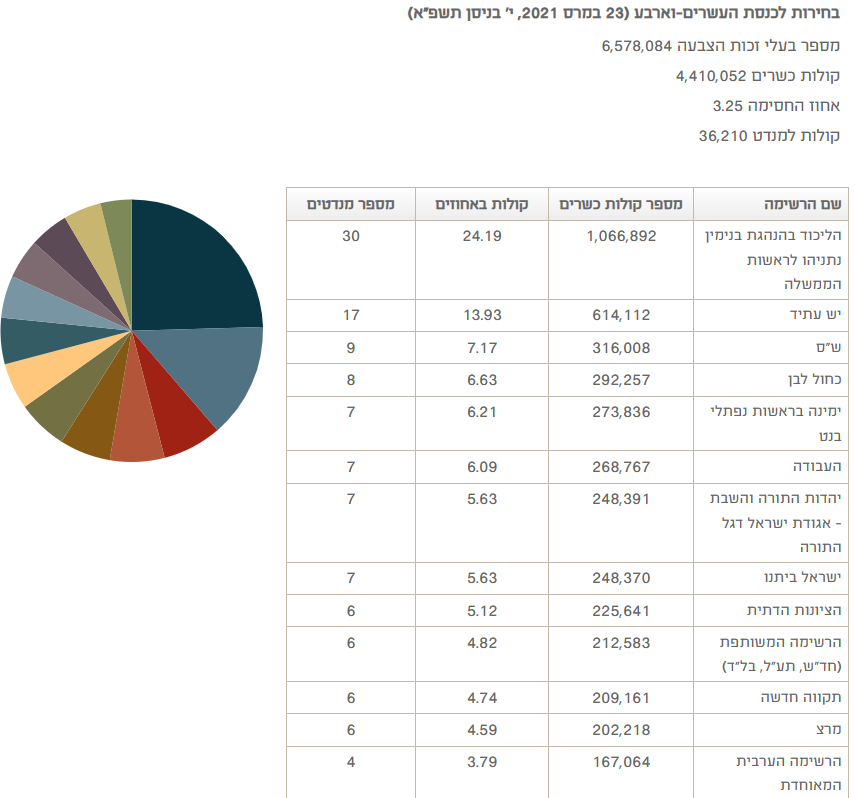

המפלגה הכי גדולה בכנסת ה 24 = הליכוד

סה"כ מנדטים = 120 כמספר חברי כנסת להלן speaker column

סה"כ מפלגות = 13


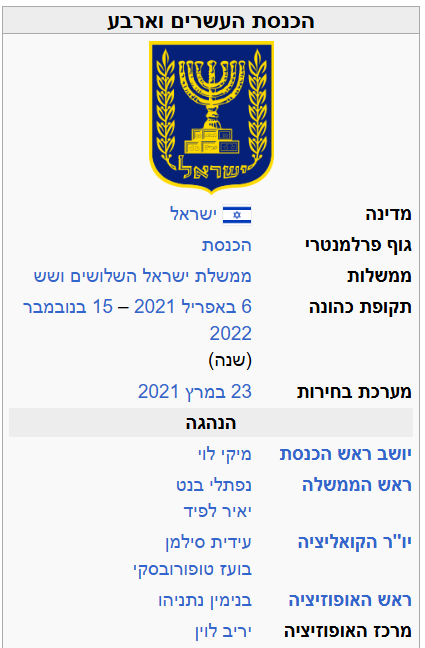

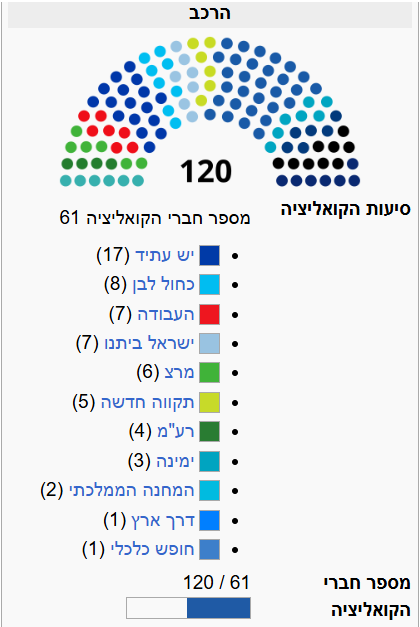

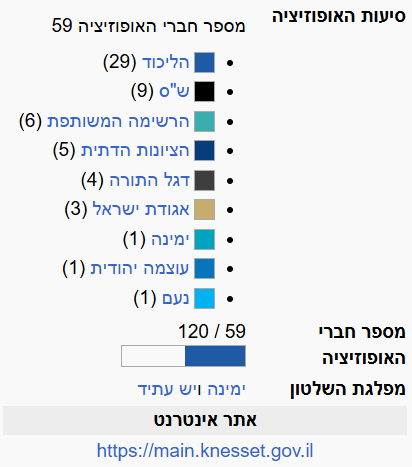

In [ ]:
import pandas as pd
combined_df = pd.read_csv(r'combined_data.csv')

In [ ]:
combined_df.info()

In [ ]:
combined_df['speaker'] = combined_df['speaker'].str.strip() #normalization: There could be discrepancies in names (e.g., additional spaces, different spellings). Normalize speaker names before mapping.


In [ ]:
# Initialize the dictionary to map speakers to parties
speaker_to_party = {}

# Add mappings for each party
likud_speakers = [
    "יולי יואל אדלשטיין", "אמיר אוחנה", "דוד אמסלם", "אופיר אקוניס", "דוד ביטן",
    "קרן ברק", "ניר ברקת", "מאי גולן", "יואב גלנט", "גילה גמליאל", "אבי דיכטר",
    "גלית דיסטל אטבריאן", "צחי הנגבי", "מכלוף מיקי זוהר", "דסטה גדי יברקן",
    "אלי אליהו כהן", "אופיר כץ", "חיים כץ", "ישראל כץ", "אורלי לוי אבקסיס",
    "יריב לוין", "פטין מולא", "בנימין נתניהו", "חוה אתי עטייה",
    "טלי פלוסקוב", "יואב קיש", "שלמה קרעי", "מירי מרים רגב", "יובל שטייניץ",
    "קטי קטרין שטרית"
]
for speaker in likud_speakers:
    speaker_to_party[speaker] = "הליכוד"

print(f"num_of_likud_speakers: {len(likud_speakers)}")

# Yesh Atid
yesh_atid_speakers = ["יאיר לפיד", "מירב כהן", "אורנה ברביבאי"]
for speaker in yesh_atid_speakers:
    speaker_to_party[speaker] = "יש עתיד"

print(f"num_of_yesh_atid_speakers: {len(yesh_atid_speakers)}")

# Shas
shas_speakers = [
    "משה אבוטבול", "ינון אזולאי", "משה ארבל", "אוריאל בוסו", "חיים ביטון",
    "יואב בן צור", "אריה מכלוף דרעי", "יוסף טייב", "מיכאל מלכיאלי", "יעקב מרגי"
]
for speaker in shas_speakers:
    speaker_to_party[speaker] = "ש\"ס"

print(f"num_of_shas_speakers: {len(shas_speakers)}")

# Blue and White
blue_and_white_speakers = [
    "מיכאל מרדכי ביטון", "איתן גינזבורג", "בני גנץ", "רות וסרמן לנדה",
    "אלון טל", "חילי טרופר", "מופיד מרעי", "אורית פרקש הכהן",
    "יעל רון בן משה", "אלון שוסטר", "פנינה תמנו שטה"
]
for speaker in blue_and_white_speakers:
    speaker_to_party[speaker] = "כחול לבן"

print(f"num_of_blue_and_white_speakers: {len(blue_and_white_speakers)}")

# יהדות התורה
yahadut_hatora_speakers = [
    "ישראל אייכלר", "יעקב אשר", "אליהו ברוכי", "משה גפני", "יעקב טסלר",
    "יעקב ליצמן", "אורי מקלב", "יצחק זאב פינדרוס", "מאיר פרוש"
]
for speaker in yahadut_hatora_speakers:
    speaker_to_party[speaker] = "יהדות התורה"

print(f"num_of_yahadut_hatora_speakers: {len(yahadut_hatora_speakers)}")

# ימינה
yamina_speakers = [
    "ניר אורבך", "נפתלי בנט", "מתן כהנא", "יום טוב חי כלפון", "עידית סילמן",
    "שירלי פינטו קדוש", "אביר קארה", "עמיחי שיקלי", "איילת שקד"
]
for speaker in yamina_speakers:
    speaker_to_party[speaker] = "ימינה"

print(f"num_of_yamina_speakers: {len(yamina_speakers)}")

# הרשימה המשותפת
hareshima_hameshutefet_speakers = [
    "סמי אבו שחאדה", "אחמד טיבי", "עופר כסיף", "אוסאמה סעדי", "איימן עודה",
    "עאידה תומא סלימאן"
]
for speaker in hareshima_hameshutefet_speakers:
    speaker_to_party[speaker] = "הרשימה המשותפת"

print(f"num_of_hareshima_hameshutefet_speakers: {len(hareshima_hameshutefet_speakers)}")

# מרצ
meretz_speakers = [
    "יאיר גולן", "ניצן הורוביץ", "תמר זנדברג", "גבי לסקי", "עלי סלאלחה",
    "עיסאווי פריג'", "מיכל רוזין", "מוסי רז", "ג'ידא רינאוי זועבי"
]
for speaker in meretz_speakers:
    speaker_to_party[speaker] = "מרצ"

print(f"num_of_meretz_speakers: {len(meretz_speakers)}")

# הציונות הדתית
hazionut_hadatit_speakers = [
    "איתמר בן גביר", "מיכל מרים וולדיגר", "אבי מעוז", "אורית סטרוק",
    "בצלאל סמוטריץ'", "שמחה רוטמן"
]
for speaker in hazionut_hadatit_speakers:
    speaker_to_party[speaker] = "הציונות הדתית"

print(f"num_of_hazionut_hadatit_speakers: {len(hazionut_hadatit_speakers)}")

# תקווה חדשה
tikva_hadasha_speakers = [
    "זאב אלקין", "זאב בנימין בגין", "מישל בוסקילה", "צבי האוזר",
    "יועז הנדל", "שרן מרים השכל", "מאיר יצחק-הלוי", "גדעון סער",
    "יפעת שאשא ביטון", "מיכל שיר סגמן"
]
for speaker in tikva_hadasha_speakers:
    speaker_to_party[speaker] = "תקווה חדשה"

print(f"num_of_tikva_hadasha_speakers: {len(tikva_hadasha_speakers)}")

# הרשימה הערבית המאוחדת
hareshima_haaravit_speakers = [
    "סעיד אלחרומי", "מאזן גנאים", "אימאן חטיב יאסין", "ווליד טאהא", "מנסור עבאס"
]
for speaker in hareshima_haaravit_speakers:
    speaker_to_party[speaker] = "הרשימה הערבית המאוחדת"

print(f"num_of_hareshima_haaravit_speakers: {len(hareshima_haaravit_speakers)}")

# העבודה
haavoda_speakers = [
    "עמר בר-לב", "נעמה לזימי", "אמילי חיה מואטי", "מרב מיכאלי", "אבתיסאם מראענה",
    "גלעד קריב", "אפרת רייטן מרום", "רם שפע"
]
for speaker in haavoda_speakers:
    speaker_to_party[speaker] = "העבודה"

print(f"num_of_haavoda_speakers: {len(haavoda_speakers)}")

# ישראל ביתנו
israel_beitenu_speakers = [
    "אלי אבידר", "אלינה ברדץ יאלוב", "אביגדור ליברמן", "לימור מגן תלם",
    "יוליה מלינובסקי", "יבגני סובה", "חמד עמאר", "עודד פורר",
    "אלכס קושניר", "שרון רופא אופיר", "יוסף שיין"
]
for speaker in israel_beitenu_speakers:
    speaker_to_party[speaker] = "ישראל ביתנו"

print(f"num_of_israel_beitenu_speakers: {len(israel_beitenu_speakers)}")


In [ ]:
total_speakers = (
    len(likud_speakers) +
    len(yesh_atid_speakers) +
    len(shas_speakers) +
    len(blue_and_white_speakers) +
    len(yahadut_hatora_speakers) +
    len(yamina_speakers) +
    len(hareshima_hameshutefet_speakers) +
    len(meretz_speakers) +
    len(hazionut_hadatit_speakers) +
    len(tikva_hadasha_speakers) +
    len(hareshima_haaravit_speakers) +
    len(haavoda_speakers) +
    len(israel_beitenu_speakers)
)

print(f"Total number of speakers: {total_speakers}")


In [ ]:
combined_df.speaker.unique()

##step 2: Finding unique speakers who weren't mapped yet and mapping them also.

In [ ]:
# Get the unique speakers from combined_df, ensuring they are strings
unique_speakers_in_df = {str(speaker) for speaker in combined_df.speaker.unique() if isinstance(speaker, str)}

# Get the speakers from the mapping, ensuring they are strings
speakers_in_mapping = {str(speaker) for speaker in speaker_to_party.keys() if isinstance(speaker, str)}

# Find speakers in combined_df but not in the mapping
speakers_not_in_mapping = sorted(unique_speakers_in_df - speakers_in_mapping)
print("Speakers in combined_df but not in the mapping:")
for idx, speaker in enumerate(speakers_not_in_mapping, start=1):
    print(f"{idx}. {speaker}")

# Find speakers in the mapping but not in combined_df
speakers_not_in_df = sorted(speakers_in_mapping - unique_speakers_in_df)
print("\nSpeakers in the mapping but not in combined_df:")
for idx, speaker in enumerate(speakers_not_in_df, start=1):
    print(f"{idx}. {speaker}")


In [ ]:
# Fix discrepancies in combined_df and mapping
additional_mappings = {
    "<< קריאה >> מאיר פרוש": "יהדות התורה",
    "אופיר סופר": "הציונות הדתית",
    "אורית מלכה סטרוק": "הציונות הדתית",
    "אזורי עיסאווי": "מרצ",
    "אילת שקד": "ימינה",
    "אימאן ח'טיב יאסין": "הרשימה הערבית המאוחדת",
    "אלי כהן": "הליכוד",
    "אלינה ברדץ' יאלוב": "ישראל ביתנו",
    "אלינור ימין": "no party",  # מזכירות הכנסת
    "אלעזר שטרן": "כחול לבן",
    "בועז טופורובסקי": "יש עתיד",
    "בנימין גנץ": "כחול לבן",
    "דן מרזוק": "no party",  # מזכירות הכנסת
    "הממשלה נפתלי בנט": "ימינה",
    "ולדימיר בליאק": "יש עתיד",
    "טטיאנה מזרסקי": "יש עתיד",
    "יואב סגלוביץ'": "יש עתיד",
    "יואל רזבוזוב": "יש עתיד",
    "יוראי להב הרצנו": "יש עתיד",
    "יסמין פרידמן": "יש עתיד",
    "יצחק פינדרוס": "יהדות התורה",
    "מאיר יצחק הלוי": "תקווה חדשה",
    "מאיר כהן": "יש עתיד",
    "מיכל וולדיגר": "הציונות הדתית",
    "מיקי לוי": "יש עתיד",
    "מירב בן ארי": "יש עתיד",
    "משה טור פז": "יש עתיד",
    "נחמן שי": "העבודה",
    "נירה שפק": "יש עתיד",
    "סימון דוידסון": "יש עתיד",
    "עידן רול": "יש עתיד",
    "עמר בר לב": "העבודה",
    "ענבר בזק": "יש עתיד",
    "פנינה תמנו": "כחול לבן",
    "קארין אלהרר": "יש עתיד",
    "קריאה": "unknown speaker",  # Metadata, ignore
    "קריאות": "unknown speaker",  # Metadata, ignore
    "ראדה חסייסי": "no party",  # מזכירות הכנסת
    "רוברטה מטסולה": "no party",  # נשיאת הפרלמנט האירופי
    "רון כץ": "יש עתיד",
    "רם בן ברק": "יש עתיד",
    "תומא סלימאן (הרשימה המשותפת)": "הרשימה המשותפת",
}

# Merge additional mappings into the existing dictionary
speaker_to_party.update(additional_mappings)

# Remove unused mappings
unused_mappings = [
    "אורית סטרוק",  # Already mapped as "אורית מלכה סטרוק"
    "איילת שקד",  # Already mapped as "אילת שקד"
    "אימאן חטיב יאסין",  # Already mapped as "אימאן ח'טיב יאסין"
    "אלי אליהו כהן",  # Already mapped as "אלי כהן"
    "אלינה ברדץ יאלוב",  # Already mapped as "אלינה ברדץ' יאלוב"
    "עיסאווי פריג'",  # Already mapped as "אזורי עיסאווי"
    "עמר בר-לב",  # Already mapped as "עמר בר לב"
    "פנינה תמנו שטה",  # Already mapped as "פנינה תמנו"
]
for unused in unused_mappings:
    speaker_to_party.pop(unused, None)


## step 3: Imputation of speaker_to_party

In [ ]:
def impute_party(df, mapping):
    """
    Impute missing 'party' values in the DataFrame based on the 'speaker_to_party' mapping.

    Parameters:
        df (pd.DataFrame): The DataFrame containing columns 'speaker' and 'party'.
        mapping (dict): A dictionary mapping speakers to their respective parties.

    Returns:
        pd.DataFrame: The updated DataFrame with imputed 'party' values.
    """
    # Impute missing 'party' values using the mapping
    df['party'] = df['speaker'].map(mapping).fillna(df['party'])
    return df

# Apply the function to impute missing party values
processed_combined_df = impute_party(combined_df, speaker_to_party)

# Inspect the result
print(processed_combined_df[['speaker', 'party']].head())


## *Results* show full imputation of parties

In [ ]:
combined_df.info()

## Saving to processed_combined_data.csv

In [ ]:
# Save the processed DataFrame to a CSV file
processed_combined_df.to_csv("processed_combined_data.csv", index=False)

print("Imputed data has been saved to 'processed_combined_data.csv'.")


## Handling 11 missing rows of speaker & party

In [ ]:
missing_party = processed_combined_df[processed_combined_df['party'].isna()]
print(missing_party[['speaker', 'party']].head())
print(f"Number of rows with missing 'party': {len(missing_party)}")


In [ ]:
missing_speakers = missing_party['speaker'].unique()
print(f"Speakers with missing 'party': {missing_speakers}")


In [ ]:
missing_in_mapping = [speaker for speaker in missing_speakers if speaker not in speaker_to_party]
print(f"Speakers not in mapping: {missing_in_mapping}")


In [ ]:
missing_speaker_rows = processed_combined_df[processed_combined_df['speaker'].isna()]
print(missing_speaker_rows.head())
print(f"Number of rows with missing 'speaker': {len(missing_speaker_rows)}")


מה שעזר לתייג את כל המפלגות באופן סופי ובהתאם לדובר, היה נורמליזציה שלמעשה מורידה רווחים או איות שונה אצל הדובר ולמעשה מחדד מי הוא הדובר. רק לאחר מכן עושים מיפוי למפלגות ואז הצלחה מובטחת !!

נותרו 11 שורות בהן הדובר אינו ידוע והמפלגה אינה ידועה גם היא.

יש תיוג של מספר דוברי מזכירות הכנסת ונשיאת הפרלמנט האירופאי כ"ללא מפלגה" במפלגה.

יש תיוג של מספר שורות של מטאדאטה כלשהו, כלומר דובר עם משהו אחר שאינו שם אלא קריאה כלשהי וגם זה מתוייג כ"דובר אינו ידוע" במפלגה.



להלן צילום מסך של השורות עם דובר שמתוייג כ"קריאה" למשל, וניתן לראות שיש טקסט שמישהו מדבר ואומר. כלומר במצב כזה נידרש להמשך תיוג בעזרת

count vectorizer

כדי להתאים את הדובר למילות המפתח שנאמרו בטקסט.

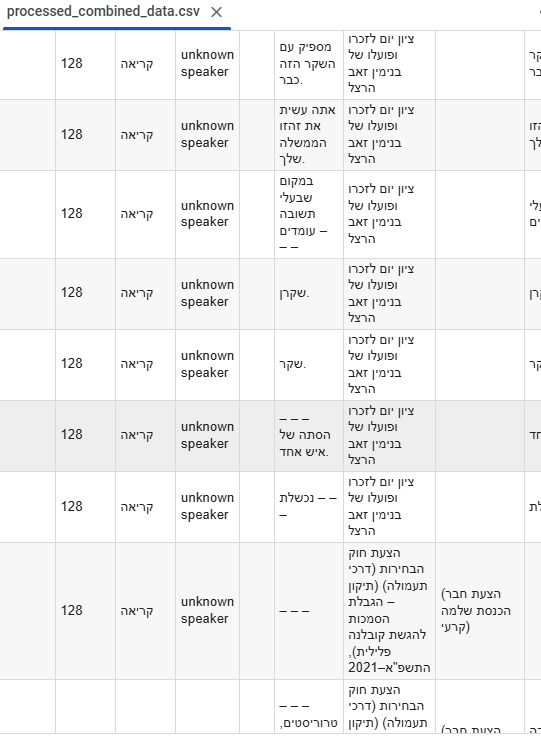

In [ ]:
# Filter rows where the 'speaker' column is NaN
missing_speaker_rows = combined_df[combined_df['speaker'].isna()]

# Display the rows
print(missing_speaker_rows)

# Optional: Save to a CSV for manual review
missing_speaker_rows.to_csv("missing_speaker_rows.csv", index=False)


**ניתן לצפות בפרטי 11 השורות בהן אין דובר&מפלגה בתמונות הבאות :**

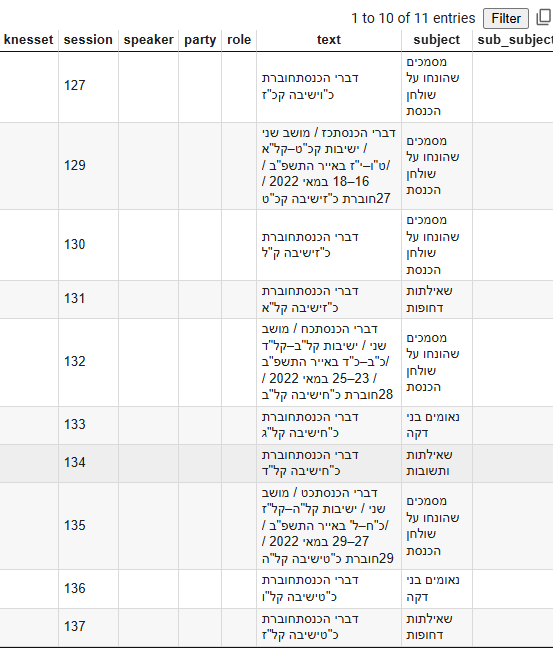

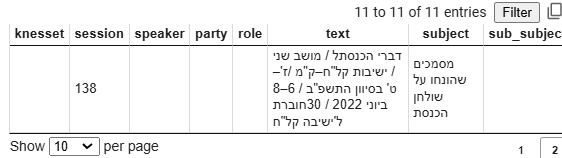

הצילומי מסך הקודמים היו עבור 11 השורות בלבד, אבל אז פילטרתי בקובץ החדש שיצרתי

processed_combined_data.csv

לאחר

imputation speaker_to_party

לפי מילות מפתח "דברי הכנסתחוברת" ומצאתי כי מי שפותח באופן זה את המליאה הוא היו"ר איתן גינזבורג ממפלגת כחול לבן.

להלן הוכחה מצולמת:


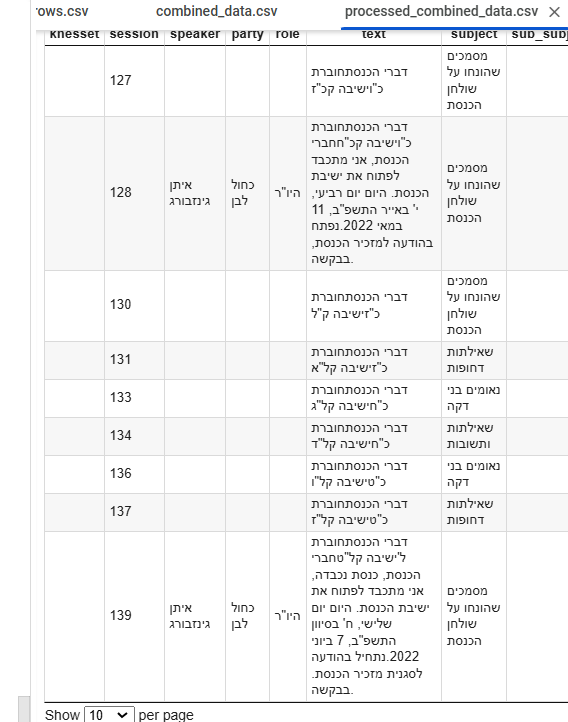

In [ ]:
# Filter rows with NaN in 'speaker' and the specific keyword in 'text'
keyword =  "דברי הכנסתחוברת כ"
rows_to_update = (processed_combined_df['speaker'].isna()) & (processed_combined_df['text'].str.contains(keyword, na=False))

# Impute 'speaker' and 'party' for these rows
processed_combined_df.loc[rows_to_update, 'speaker'] = "איתן גינזבורג"
processed_combined_df.loc[rows_to_update, 'party'] = "כחול לבן"

# Save the updated DataFrame to a new CSV
processed_combined_df.to_csv("processed_combined_data.csv", index=False)

print(f"Imputed {rows_to_update.sum()} rows with speaker as איתן גינזבורג and party as כחול לבן.")


אחרי הפילטור הנ"ל שוב יש שמירה לקובץ

processed_combined_data.csv

In [ ]:
combined_df.info()

In [ ]:
# Normalize the 'text' column for consistent keyword matching
processed_combined_df['text_normalized'] = (
    processed_combined_df['text']
    .str.lower()  # Lowercase
    .str.strip()  # Strip leading/trailing whitespace
    .str.replace(r'[^\w\s]', '', regex=True)  # Remove special characters
    .str.replace(r'\s+', ' ', regex=True)  # Replace multiple spaces with one
)

# Check for rows with NaN speakers and normalized keyword
rows_to_update = (
    processed_combined_df['speaker'].isna() &
    processed_combined_df['text_normalized'].str.contains("דברי הכנסתחוברת", na=False)
)

# Impute 'speaker' and 'party' for these rows
processed_combined_df.loc[rows_to_update, 'speaker'] = "איתן גינזבורג"
processed_combined_df.loc[rows_to_update, 'party'] = "כחול לבן"

# Save the updated DataFrame to a new CSV
processed_combined_df.to_csv("processed_combined_data.csv", index=False)

# Print the number of rows updated
print(f"Imputed {rows_to_update.sum()} additional rows with speaker as איתן גינזבורג and party as כחול לבן.")


עדיין חסר התיוג לגבי 4 מקרים נוספים, כי המילות מפתח טיפה שונות ולכן בהמשך השתמשתי בעמודת ה

subject

שגם פילטור שלה הראה אותה אבחנה לאותן שורות חסרות דובר שהן למעשה רלוונטיות ליו"ר הכנסת.

In [ ]:
# Filter rows where the 'speaker' column is NaN
missing_speaker_rows2 = combined_df[combined_df['speaker'].isna()]

# Display the rows
print(missing_speaker_rows2)

# Optional: Save to a CSV for manual review
missing_speaker_rows2.to_csv("missing_speaker_rows2.csv", index=False)


In [ ]:
# Check for rows with NaN speakers and normalized keyword
rows_to_update = (
    processed_combined_df['speaker'].isna() &
    processed_combined_df['subject'].str.contains("מסמכים שהונחו", na=False)
)

# Impute 'speaker' and 'party' for these rows
processed_combined_df.loc[rows_to_update, 'speaker'] = "איתן גינזבורג"
processed_combined_df.loc[rows_to_update, 'party'] = "כחול לבן"

# Save the updated DataFrame to a new CSV
processed_combined_df.to_csv("processed_combined_data.csv", index=False)

# Print the number of rows updated
print(f"Imputed {rows_to_update.sum()} additional rows with speaker as איתן גינזבורג and party as כחול לבן.")

## *Results* showing full imputation after handling missing data

In [ ]:
combined_df.info()

## **Verify imputation of party:**

In [ ]:
print(combined_df['party'].value_counts())
print(combined_df['party'].isnull().sum())


In [ ]:
import pandas as pd


# Group by party and extract unique speakers for each party
party_to_speakers = (
    combined_df.groupby("party")["speaker"]
    .apply(lambda x: x.dropna().unique().tolist())
    .to_dict()
)

# Display unique speakers per party
for party, speakers in party_to_speakers.items():
    print(f"{party}: {len(speakers)} speakers")
    print(speakers)
    print()


In [ ]:
# Create a mapping of speakers to parties
speaker_to_parties = combined_df.groupby("speaker")["party"].apply(lambda x: x.dropna().unique().tolist())

# Filter for speakers associated with multiple parties
multi_party_speakers = speaker_to_parties[speaker_to_parties.apply(len) > 1]

# Display the results
if multi_party_speakers.empty:
    print("No speakers are associated with multiple parties.")
else:
    print("Speakers associated with multiple parties:")
    for speaker, parties in multi_party_speakers.items():
        print(f"{speaker}: {', '.join(parties)}")


## **איזה דוברים מופיעים בכל מליאה**:

In [ ]:
import pandas as pd

# Example: Replace with your actual dataframe
# df = pd.read_csv("your_dataset.csv")

# Group by session and extract unique speakers for each session
session_to_speakers = (
    combined_df.groupby("session")["speaker"]
    .apply(lambda x: x.dropna().unique().tolist())
    .to_dict()
)

# Display unique speakers per session
for session, speakers in session_to_speakers.items():
    print(f"Session {session}: {len(speakers)} speakers")
    print(speakers)
    print()


In [ ]:
# Group by session and speaker_to_party, then count occurrences
party_counts = combined_df.groupby(["session", "party"]).size().reset_index(name="party_per_session_count")

# Display the result
print(party_counts)

אפשר לראות שיש תיוג מלא של הדוברים והמפלגות וגם נושאי הדיון במליאה.

שימי לב שחסר בעמודת ה

text

מה עוד יש לעשות:

1. לבדוק מי המפלגות שמופיעות עבור ה4 שורות עם טקסט חסר, גם אותן צריך לספור להבנתי. אפשר לוודא עם יובל.
לפי יובל זה תלוי בפיצ'רים כי אם הם תלויים בטקסט אז מן הסתם שתהיה בעיה כי אין טקסט.

2. בבלוק קוד האחרון צריך שהקוד גם יחלק את הדוברים שמופיעים בכל מליאה, למפלגות שלהם ויספור כמה מאותה מפלגה יש באותה מליאה. זה אגב מתקשר ל y label

3. לנסות לפענח מי זה הדובר שרשמתי תחת מפלגה unknown speaker
אולי באמצעות מילות מפתח, יש הרבה "שקר" שם ואולי גם באמצעות
count vectorizer
ובעצם לאחר שנבין מי הדובר אז נוכל לתייג את המפלגה שלו. יש לא מעט שורות כאלו ולכן זה חשוב.

4. הכנת פיצ'ר בינארי של 1 הליכוד וכל שאר המפלגות יקבלו 0

5. הכנת פיצ'ר שסופר את כמות המפלגות בכל מליאה שזה המשתנה מטרה למעשה

6. הכנת פיצ'רים שסופרים את כמות התווים בטקסט ו/או את כמות התווים שאינם אותיות כמו סימני קריאה

7. לנקות עמודות שלא צריך, לדעתי את role, sub subject, knesset
לדעתי גם צריך לעשות משהו עם הרעש של "ללא מפלגה" כי זה לא רלוונטי לתרגיל בכלל.

8. לשים אינדקס ?

9. להמשיך למודל ראשון ברגרסיה לינארית

# FEATURES (including y label for הליכוד) session_party_counts.csv

In [ ]:
#I changed this feature so we have one colum for all parties and not column for each party- so we can merge the data afterwards
# # (Long format instead of Wide).
#(You can not merge in wide formet session and party).
import pandas as pd
# Load the dataset
df = pd.read_csv(r"C:\Users\User\Downloads\processed_combined_data.csv")

# Group by Session and Party to calculate counts
grouped = df.groupby(["session", "party"]).size().reset_index(name="count")

# Save the grouped table to a new CSV file
grouped.to_csv("session_party_counts.csv", index=False)

print("Table saved to session_party_counts.csv")

# Display the grouped DataFrame
grouped




Table saved to session_party_counts.csv


,session,party,count
0,127,no party,1
1,127,הליכוד,94
2,127,העבודה,21
3,127,הציונות הדתית,2
4,127,הרשימה המשותפת,11
...,...,...,...
166,139,ימינה,4
167,139,יש עתיד,3
168,139,כחול לבן,12
169,139,מרצ,7


In [ ]:
#No party coulmn-but we need to merge the next filr based on session and party
grouped.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   session  171 non-null    int64 
 1   party    171 non-null    object
 2   count    171 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.1+ KB


In [ ]:
grouped['party'].unique()

array(['no party', 'הליכוד', 'העבודה', 'הציונות הדתית', 'הרשימה המשותפת',
       'יהדות התורה', 'ימינה', 'יש עתיד', 'ישראל ביתנו', 'כחול לבן',
       'מרצ', 'ש"ס', 'תקווה חדשה', 'unknown speaker',
       'הרשימה הערבית המאוחדת'], dtype=object)

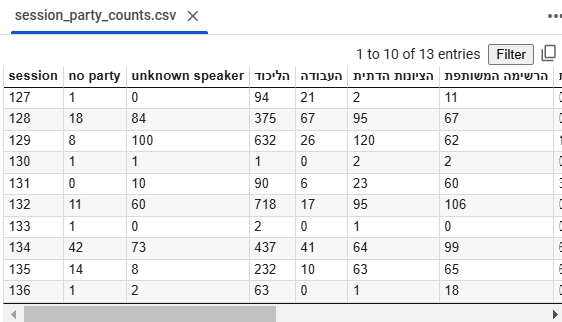

# FEATURE note_count

## saving to session_party_counts_with_notes.csv

In [ ]:
import pandas as pd

# Load the processed dataset
processed_df = pd.read_csv(r"C:\Users\User\Downloads\processed_combined_data.csv")


# Handle missing values in the `text` column and calculate note counts
processed_df['note_count'] = (
    processed_df['text']
    .fillna("")  # Replace NaN with an empty string
    .str.split()
    .str.len()
    .astype(int)  # Convert to integer after handling missing values
)

# Aggregate note counts by session and party
session_note_counts = processed_df.groupby(['session', 'party'])['note_count'].sum().reset_index




# Configure pandas to display all rows
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns

# Display the entire DataFrame
session_note_counts


<bound method Series.reset_index of session  party                
127      no party                    19
         הליכוד                    3667
         העבודה                    2171
         הציונות הדתית              679
         הרשימה המשותפת            2037
         יהדות התורה               2303
         ימינה                      414
         יש עתיד                   4698
         ישראל ביתנו               3002
         כחול לבן                  1310
         מרצ                       1582
         ש"ס                       1829
         תקווה חדשה                1791
128      no party                  2663
         unknown speaker            298
         הליכוד                   14785
         העבודה                    1626
         הציונות הדתית             3952
         הרשימה המשותפת            1179
         יהדות התורה               4203
         ימינה                     1449
         יש עתיד                   9156
         ישראל ביתנו               8546
         כחול

In [ ]:
##Here the merge with from the session_party_counts.csv- session_note_counts.csv works on both levels of session and party##

# Ensure .reset_index() is called properly to create a DataFrame
session_note_counts = processed_df.groupby(['session', 'party'])['note_count'].sum().reset_index()

# Load the session_party_counts.csv
session_party_counts = pd.read_csv(r"C:\Users\User\Downloads\session_party_counts.csv")

# Merge note counts with session_party_counts
updated_session_party_counts = session_party_counts.merge(session_note_counts, on=['session', 'party'], how='left')

# Ensure the `note_count` column is an integer, replacing NaN with 0
updated_session_party_counts['note_count'] = updated_session_party_counts['note_count'].fillna(0).astype(int)

# Display or save the updated DataFrame
updated_session_party_counts



,session,party,count,note_count
0,127,no party,1,19
1,127,הליכוד,94,3667
2,127,העבודה,21,2171
3,127,הציונות הדתית,2,679
4,127,הרשימה המשותפת,11,2037
5,127,יהדות התורה,6,2303
6,127,ימינה,1,414
7,127,יש עתיד,50,4698
8,127,ישראל ביתנו,14,3002
9,127,כחול לבן,17,1310


In [ ]:
# Save the updated DataFrame to a new CSV file
updated_session_party_counts.to_csv("session_party_counts_with_notes.csv", index=False)

print("Updated session_party_counts.csv saved as session_party_counts_with_notes.csv")


updated_session_party_counts.head()

Updated session_party_counts.csv saved as session_party_counts_with_notes.csv


,session,party,count,note_count
0,127,no party,1,19
1,127,הליכוד,94,3667
2,127,העבודה,21,2171
3,127,הציונות הדתית,2,679
4,127,הרשימה המשותפת,11,2037


In [ ]:
updated_session_party_counts[['count','note_count']].describe()
#mean number of note_count in the database:3133, median: 2097

,count,note_count
count,171.000000,171.000000
mean,84.315789,3133.461988
std,118.088624,3565.888551
min,1.000000,3.000000
25%,9.000000,630.000000
50%,49.000000,2097.000000
75%,106.500000,4175.000000
max,718.000000,23314.000000


## PAIR PLOT

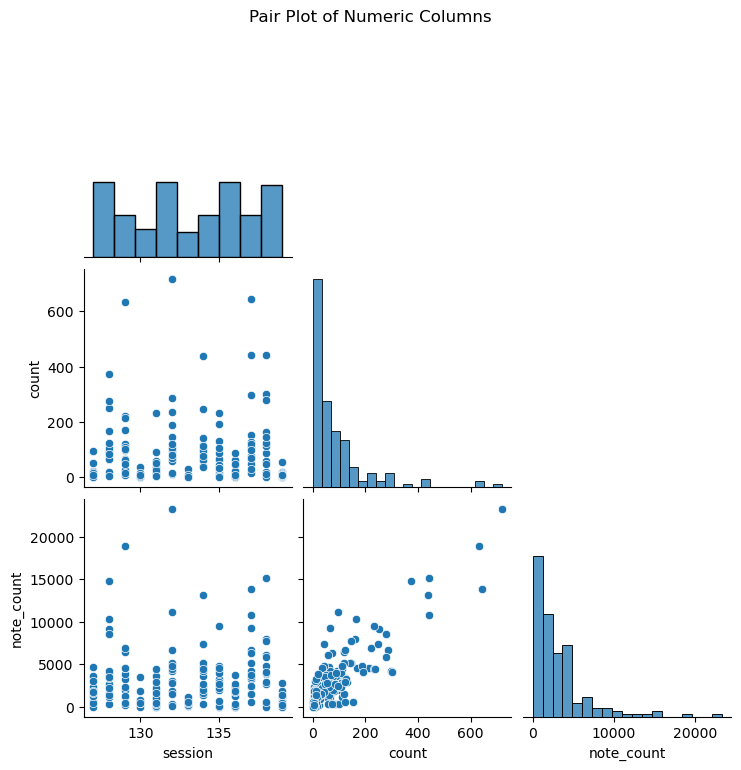

In [ ]:
#These are new graphs based on the merged data
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_data = updated_session_party_counts.select_dtypes(include=['number'])

# Create a pair plot
sns.pairplot(numeric_data, diag_kind='hist', corner=True)

# Add a title
plt.suptitle("Pair Plot of Numeric Columns", y=1.02)

# Show the plot
plt.show()

# In general, larger parties in size have higher number of notes (speak more then smaller parties)

In [ ]:
correlation = updated_session_party_counts[['count', 'note_count']].corr()
print(correlation)
#A very strong correlation between  count (party represntaion) and  note_count (number of words spoken): 0.86 pearson correlation
#The correlation is positive and linear

               count  note_count
count       1.000000    0.862164
note_count  0.862164    1.000000


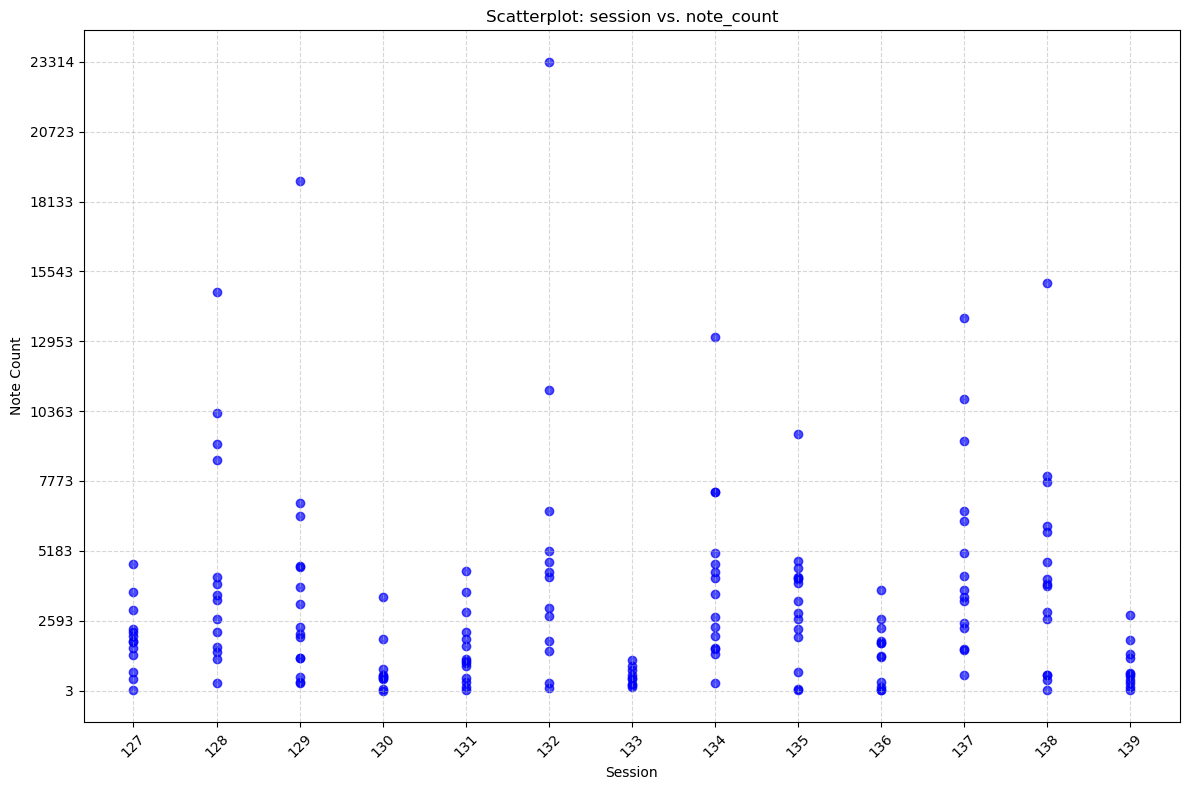

In [ ]:

#Note_count and session:
import matplotlib.pyplot as plt
import numpy as np


# Set up the figure
plt.figure(figsize=(12, 8))

# Scatter plot: session vs note_count
plt.scatter(numeric_data['session'], numeric_data['note_count'], alpha=0.7, color='blue')
plt.title("Scatterplot: session vs. note_count")
plt.xlabel("Session")
plt.ylabel("Note Count")

# Ensure all x-axis values are visible
plt.xticks(sorted(numeric_data['session'].unique()), rotation=45)  # Sort unique values and rotate for readability

# Adjust y-axis ticks: Define a range based on note_count
y_min = numeric_data['note_count'].min()
y_max = numeric_data['note_count'].max()
y_ticks = np.linspace(y_min, y_max, num=10)  # Generate 10 evenly spaced ticks

plt.yticks(y_ticks.astype(int))  # Use integers for tick labels

# Add a grid for better visualization
plt.grid(True, linestyle='--', alpha=0.5)

# Display the plot
plt.tight_layout()
plt.show()
 #In some sessions there is more note_count then in others: 128, 129, 132, 138- Maybe these sessions were about controversial topic.



In [ ]:
# I installed converter Hebrew text so the text will be written in the graphs from  right to left:
!pip install arabic-reshaper python-bidi


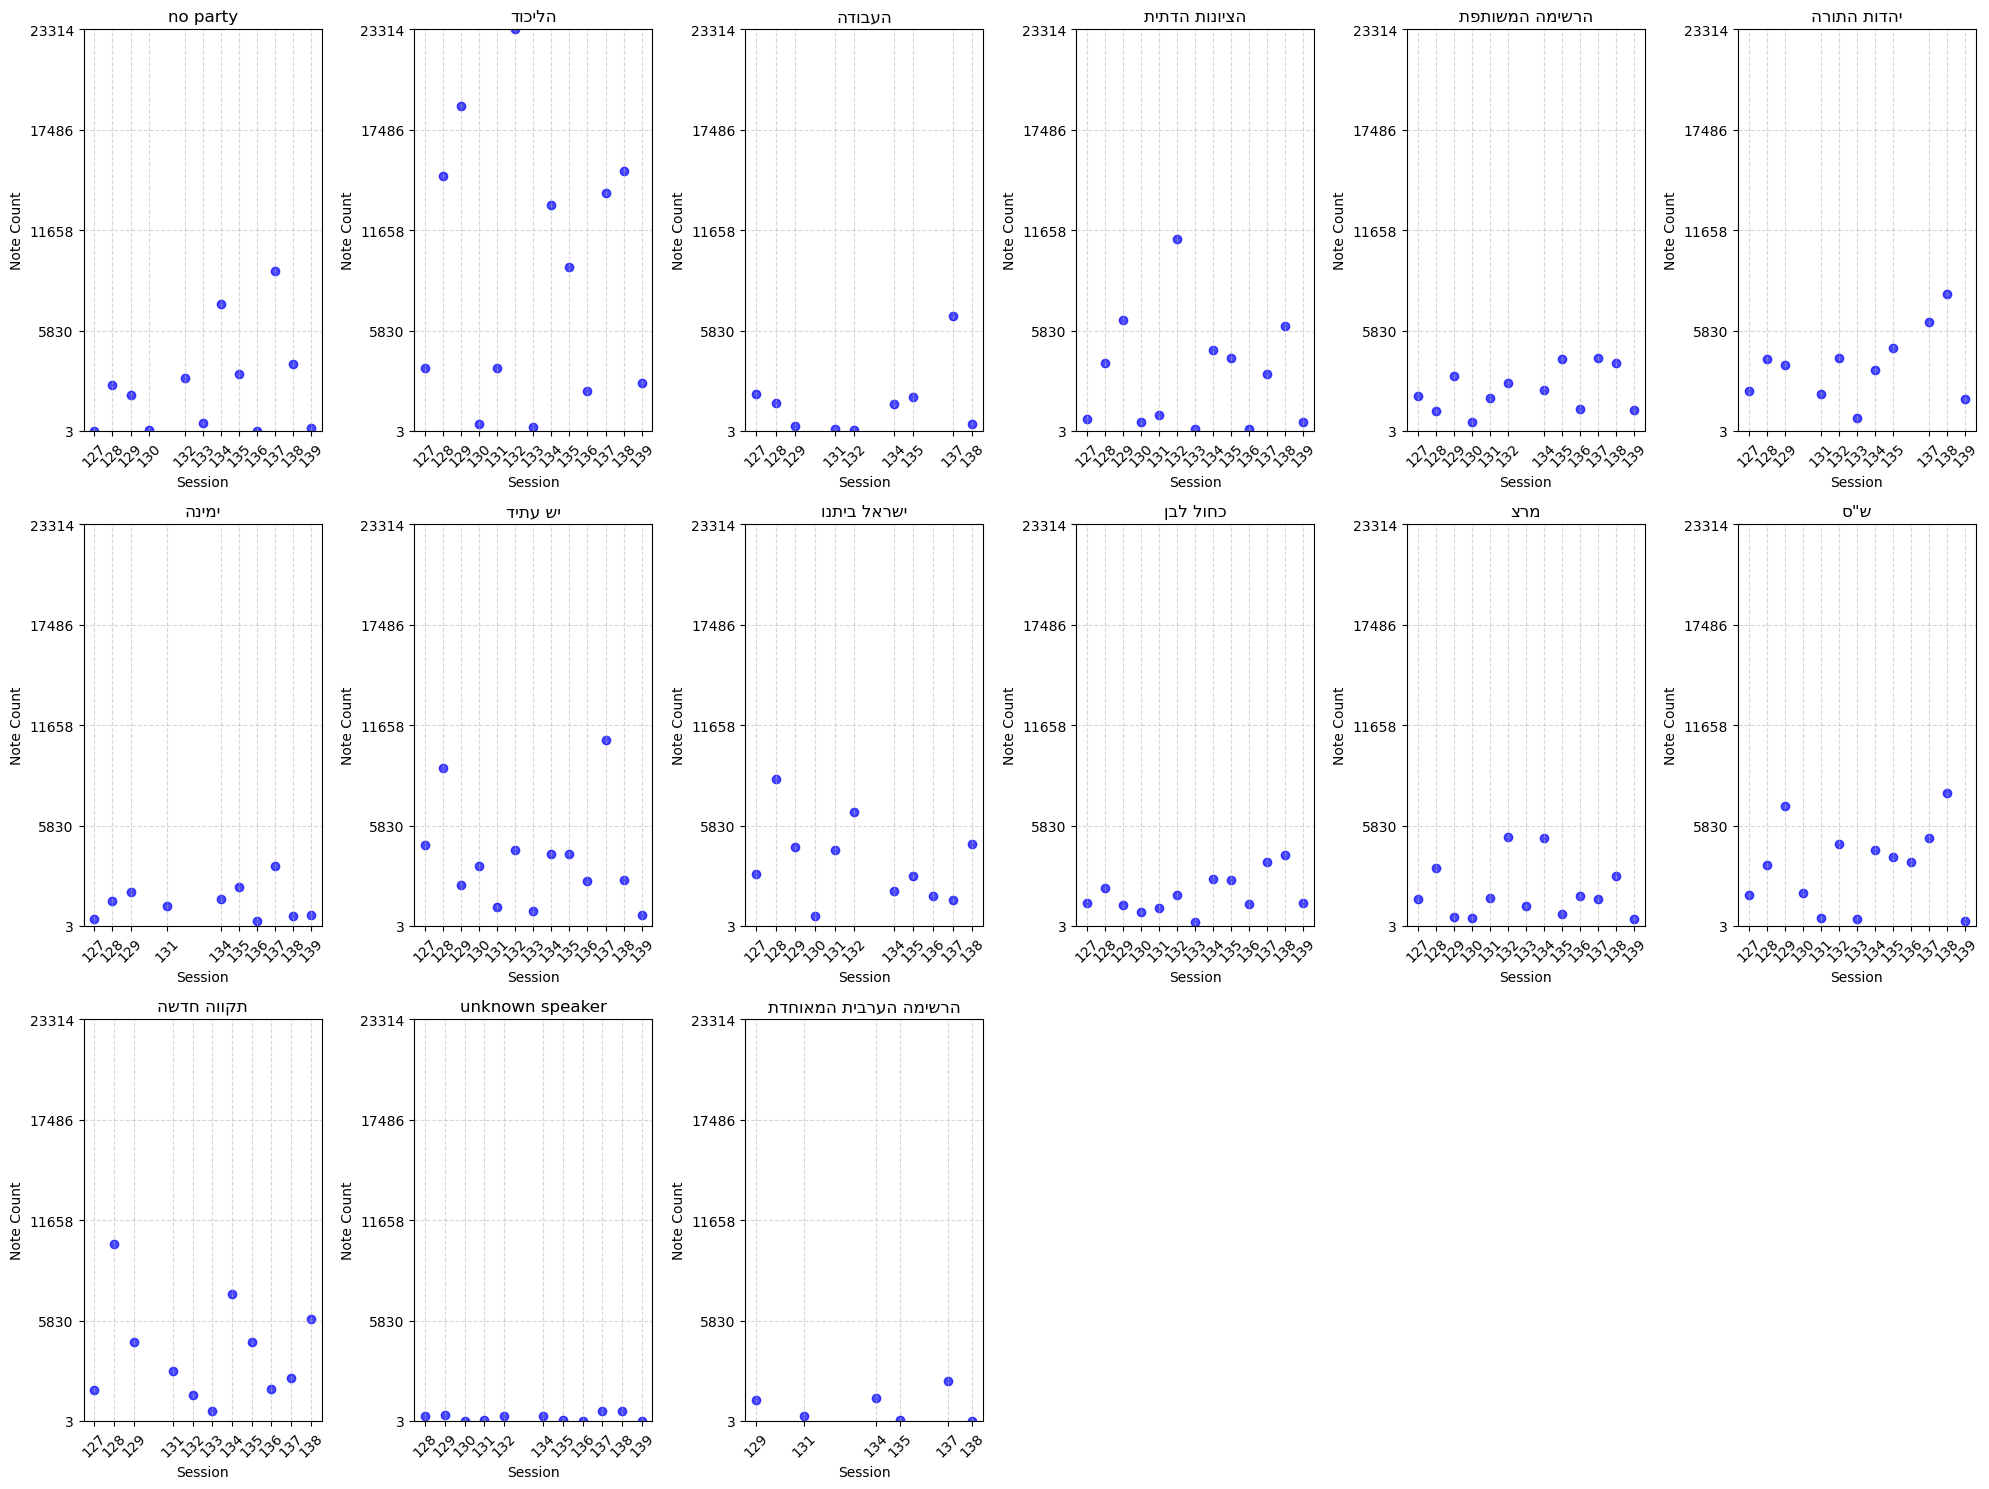

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import arabic_reshaper
from bidi.algorithm import get_display



# Helper function to reshape and display Hebrew text properly
def reshape_text(text):
    reshaped_text = arabic_reshaper.reshape(text)  # Reshape text for proper display
    return get_display(reshaped_text)  # Apply bidi algorithm to handle RTL

# Compute global y-axis range
global_y_min = updated_session_party_counts['note_count'].min()
global_y_max = updated_session_party_counts['note_count'].max()
global_y_ticks = np.linspace(global_y_min, global_y_max, num=5).astype(int)  # Generate consistent ticks

# Unique parties
parties = updated_session_party_counts['party'].unique()

# Define grid dimensions
rows = 3
cols = 6
num_plots = len(parties)

# Set up the grid
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))
axes = axes.flatten()  # Flatten to handle as a 1D array for easy indexing

# Loop through each party and plot
for i, party in enumerate(parties):
    if i < len(axes):  # Ensure we don't exceed the number of axes
        # Filter the data for the current party
        party_data = updated_session_party_counts[updated_session_party_counts['party'] == party]

        # Scatter plot: session vs note_count
        axes[i].scatter(party_data['session'], party_data['note_count'], alpha=0.7, color='blue')

        # Reshape Hebrew text for title
        hebrew_party = reshape_text(party)
        axes[i].set_title(f"{hebrew_party}")

        # Set labels
        axes[i].set_xlabel("Session")
        axes[i].set_ylabel("Note Count")

        # Adjust x-axis ticks for visibility
        axes[i].set_xticks(sorted(party_data['session'].unique()))
        axes[i].tick_params(axis='x', rotation=45)

        # Set consistent y-axis ticks and range
        axes[i].set_yticks(global_y_ticks)
        axes[i].set_ylim(global_y_min, global_y_max)

        # Add gridlines
        axes[i].grid(True, linestyle='--', alpha=0.5)

# Hide unused subplots if there are fewer parties than grid cells
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


#Graphs of note_count and sessions by party
#You can see that in some sessions some parties talked more then in other sessions' number:
#Likud talked alot on sessions: 128,129,132,134,137,138.
# ציונות הדתית 132
#תקוה חדשה 128
# יש עתיד128  137
# ש"ס 129 128
#ישראל ביתנו 128
#We need to check sub-subject of session 28.

### Results of 3 scatter plots (from the pair plot) - showing linear correlation

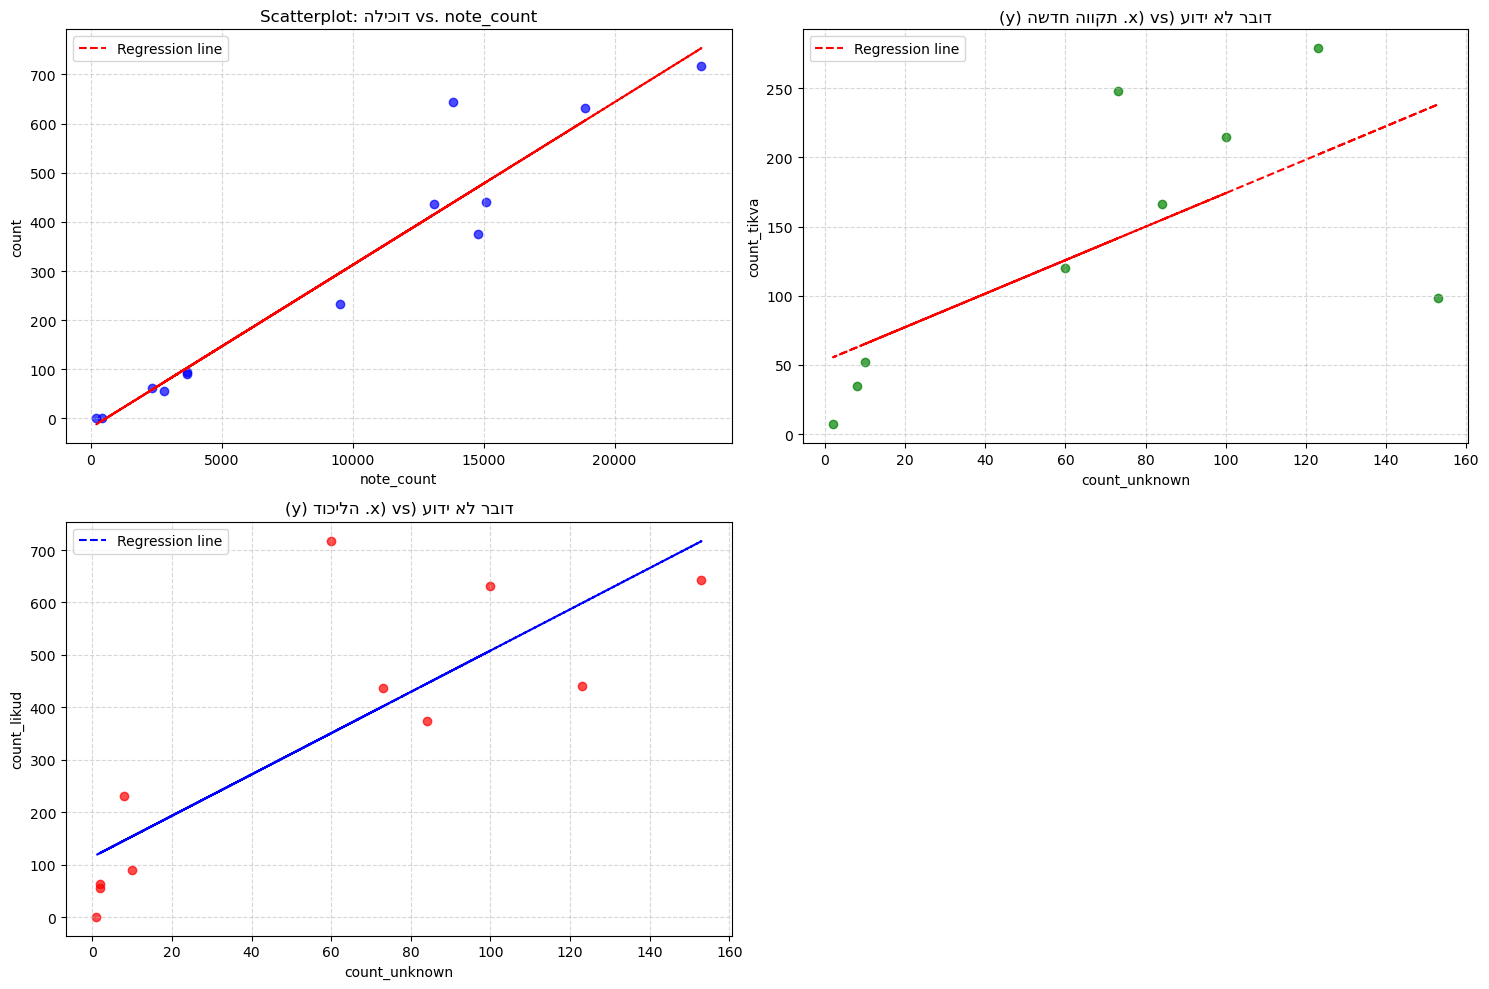

In [ ]:


import matplotlib.pyplot as plt
import numpy as np
import arabic_reshaper
from bidi.algorithm import get_display

# Helper function to reshape and display Hebrew text properly
def reshape_text(text):
    reshaped_text = arabic_reshaper.reshape(text)  # Reshape text for proper display
    return get_display(reshaped_text)  # Apply bidi algorithm to handle RTL

# Filter data for הליכוד, unknown speaker, and תקווה חדשה
likud_data = updated_session_party_counts[updated_session_party_counts['party'] == 'הליכוד']
unknown_speaker_data = updated_session_party_counts[updated_session_party_counts['party'] == 'unknown speaker']
tikva_hadasha_data = updated_session_party_counts[updated_session_party_counts['party'] == 'תקווה חדשה']

# Set up the figure for subplots
plt.figure(figsize=(15, 10))

# Plot 1: הליכוד vs note_count
if not likud_data.empty:
    plt.subplot(2, 2, 1)
    x = likud_data['note_count']
    y = likud_data['count']
    plt.scatter(x, y, alpha=0.7, color='blue')
    # Regression line
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m * x + b, color='red', linestyle='--', label='Regression line')
    plt.title("Scatterplot: הליכוד vs. note_count")
    plt.xlabel("note_count")
    plt.ylabel("count")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()

# Plot 2: Unknown Speaker (x-axis) vs תקווה חדשה (y-axis)
if not unknown_speaker_data.empty and not tikva_hadasha_data.empty:
    merged_data = unknown_speaker_data.merge(
        tikva_hadasha_data, on="session", suffixes=("_unknown", "_tikva")
    )
    plt.subplot(2, 2, 2)
    x = merged_data['count_unknown']
    y = merged_data['count_tikva']
    plt.scatter(x, y, alpha=0.7, color='green')
    # Regression line
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m * x + b, color='red', linestyle='--', label='Regression line')
    plt.title(reshape_text("דובר לא ידוע (x) vs. תקווה חדשה (y)"))
    plt.xlabel("count_unknown")
    plt.ylabel("count_tikva")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()

# Plot 3: Unknown Speaker (x-axis) vs הליכוד (y-axis)
if not likud_data.empty and not unknown_speaker_data.empty:
    merged_data = likud_data.merge(
        unknown_speaker_data, on="session", suffixes=("_likud", "_unknown")
    )
    plt.subplot(2, 2, 3)
    x = merged_data['count_unknown']
    y = merged_data['count_likud']
    plt.scatter(x, y, alpha=0.7, color='red')
    # Regression line
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m * x + b, color='blue', linestyle='--', label='Regression line')
    plt.title(reshape_text("דובר לא ידוע (x) vs. הליכוד (y)"))
    plt.xlabel("count_unknown")
    plt.ylabel("count_likud")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()

# Adjust layout and display
plt.tight_layout()
plt.show()


## העמודות בטבלה בקובץ session_party_counts_with_notes.csv :

In [ ]:
# Display all column names
print(updated_session_party_counts.columns)


Index(['session', 'party', 'count', 'note_count'], dtype='object')


In [ ]:
# Filter data for הליכוד, unknown speaker, and תקווה חדשה
likud_data = updated_session_party_counts[updated_session_party_counts['party'] == 'הליכוד']
unknown_speaker_data = updated_session_party_counts[updated_session_party_counts['party'] == 'unknown speaker']
tikva_hadasha_data = updated_session_party_counts[updated_session_party_counts['party'] == 'תקווה חדשה']

# Calculate Pearson's correlation coefficients
# הליכוד vs note_count
if not likud_data.empty:
    correlation_1 = likud_data['count'].corr(likud_data['note_count'])
    print(f"Correlation (הליכוד vs. note_count): {correlation_1}")
else:
    print("No data available for הליכוד")

# Unknown Speaker vs תקווה חדשה
# Unknown Speaker vs תקווה חדשה
if not unknown_speaker_data.empty and not tikva_hadasha_data.empty:
    merged_data = unknown_speaker_data.merge(
        tikva_hadasha_data, on="session", suffixes=("_unknown", "_tikva")
    )
    correlation_2 = merged_data['count_unknown'].corr(merged_data['count_tikva'])
    print(f"Correlation (Unknown Speaker vs. תקווה חדשה): {correlation_2}")
else:
    print("Insufficient data for Unknown Speaker or תקווה חדשה")



# הליכוד vs Unknown Speaker
if not likud_data.empty and not unknown_speaker_data.empty:
    merged_data = likud_data.merge(
        unknown_speaker_data, on="session", suffixes=("_likud", "_unknown")
    )
    correlation_3 = merged_data['count_likud'].corr(merged_data['count_unknown'])
    print(f"Correlation (הליכוד vs. Unknown Speaker): {correlation_3}")
else:
    print("Insufficient data for הליכוד or Unknown Speaker")



#The corelation between Likud num of rows and Unknown Speaker num of rows: is very strong and positive. 0.86.
#However, we need to keep in mind that these are the results of linear regression and not Multiple linear regression so we are not controling on other parties and featuears.
#Go to the end of the file: Linear regression OR

Correlation (הליכוד vs. note_count): 0.9634511977883835
Correlation (Unknown Speaker vs. תקווה חדשה): 0.6664560014937484
Correlation (הליכוד vs. Unknown Speaker): 0.8245945438352964


# FEATURE non_letter_note_count , saved to session_party_counts_with_non_letter_notes.csv

In [ ]:
##########I changed it to groupby(['session', 'party'])
import re

# Load the processed dataset
processed_df = pd.read_csv("processed_combined_data.csv")

# Define a function to count words that are not purely letters
def count_non_letter_notes(text):
    if pd.isna(text):
        return 0
    # Use regex to find words that contain non-letter characters
    non_letter_words = re.findall(r'\b\w*[^\w\s]\w*|\b\d+\b', text)
    return len(non_letter_words)

# Apply the function to the `text` column to calculate `non_letter_note_count`
processed_df['non_letter_note_count'] = processed_df['text'].apply(count_non_letter_notes)

# Aggregate non-letter note counts by session
session_non_letter_counts = processed_df.groupby(['session', 'party'])['non_letter_note_count'].sum().reset_index()


session_non_letter_counts


,session,party,non_letter_note_count
0,127,no party,5
1,127,הליכוד,812
2,127,העבודה,377
3,127,הציונות הדתית,159
4,127,הרשימה המשותפת,449
5,127,יהדות התורה,434
6,127,ימינה,97
7,127,יש עתיד,1003
8,127,ישראל ביתנו,524
9,127,כחול לבן,267


In [ ]:
session_non_letter_counts.head()


,session,party,non_letter_note_count
0,127,no party,5
1,127,הליכוד,812
2,127,העבודה,377
3,127,הציונות הדתית,159
4,127,הרשימה המשותפת,449


In [ ]:
#'non_letter_note_count':MEAN:638, MEDIAN:393
session_non_letter_counts[['non_letter_note_count']].describe()



,non_letter_note_count
count,171.000000
mean,638.578947
std,775.416957
min,0.000000
25%,121.500000
50%,393.000000
75%,866.000000
max,5398.000000


In [ ]:
# merge: session_non_letter_counts with updated_session_party_counts by (['session', 'party'])

merge_notecount_nonletter = updated_session_party_counts.merge(session_non_letter_counts, on=['party', 'session'], how='left')
merge_notecount_nonletter
# Save the grouped table to a new CSV file
merge_notecount_nonletter.to_csv("merge_notecount_nonletter.csv", index=False)


merge_notecount_nonletter.head(5)

,session,party,count,note_count,non_letter_note_count
0,127,no party,1,19,5
1,127,הליכוד,94,3667,812
2,127,העבודה,21,2171,377
3,127,הציונות הדתית,2,679,159
4,127,הרשימה המשותפת,11,2037,449


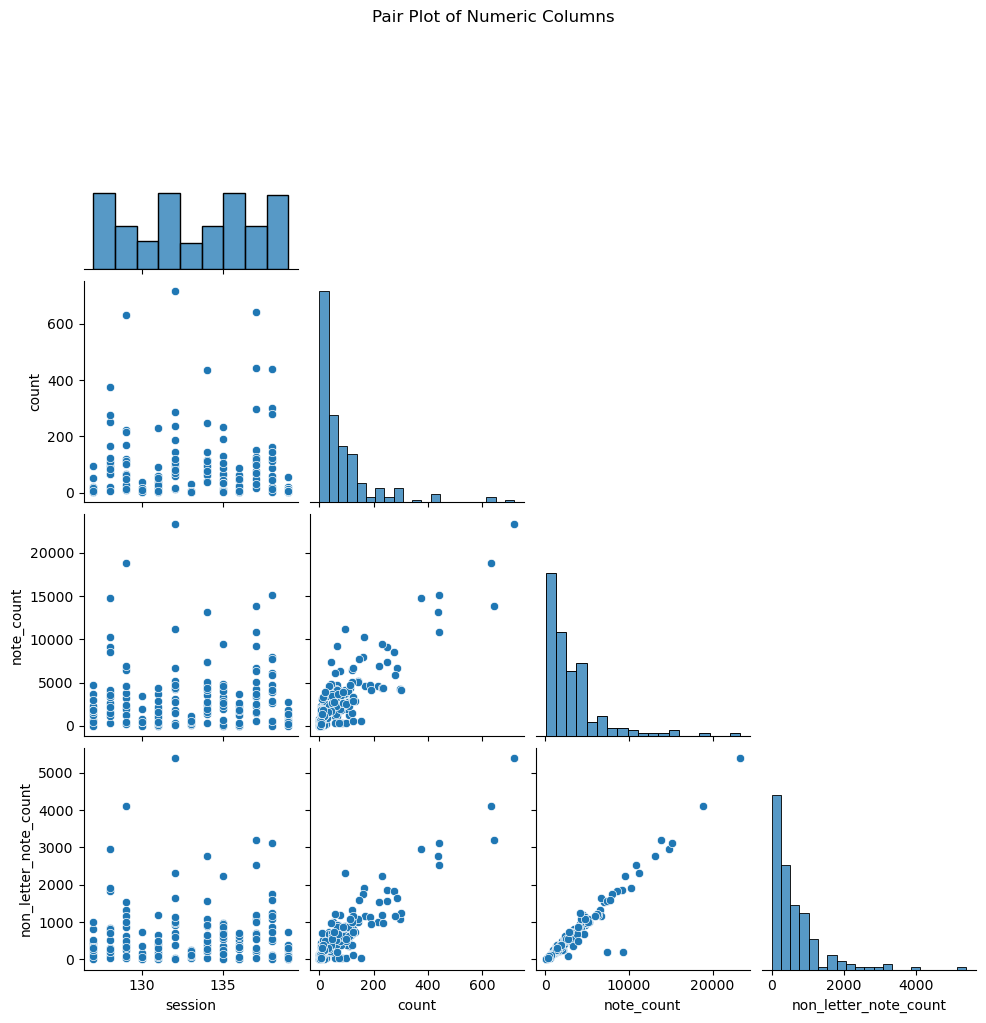

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_data = merge_notecount_nonletter.select_dtypes(include=['number'])

# Create a pair plot
sns.pairplot(numeric_data, diag_kind='hist', corner=True)

# Add a title
plt.suptitle("Pair Plot of Numeric Columns", y=1.02)

# Show the plot
plt.show()
#A linear and a positive corelation between count and non_letter_note_count for all dataset
#A linear and a positive corelation between non_letter_note_count and note_count for all dataset

## PAIR PLOT

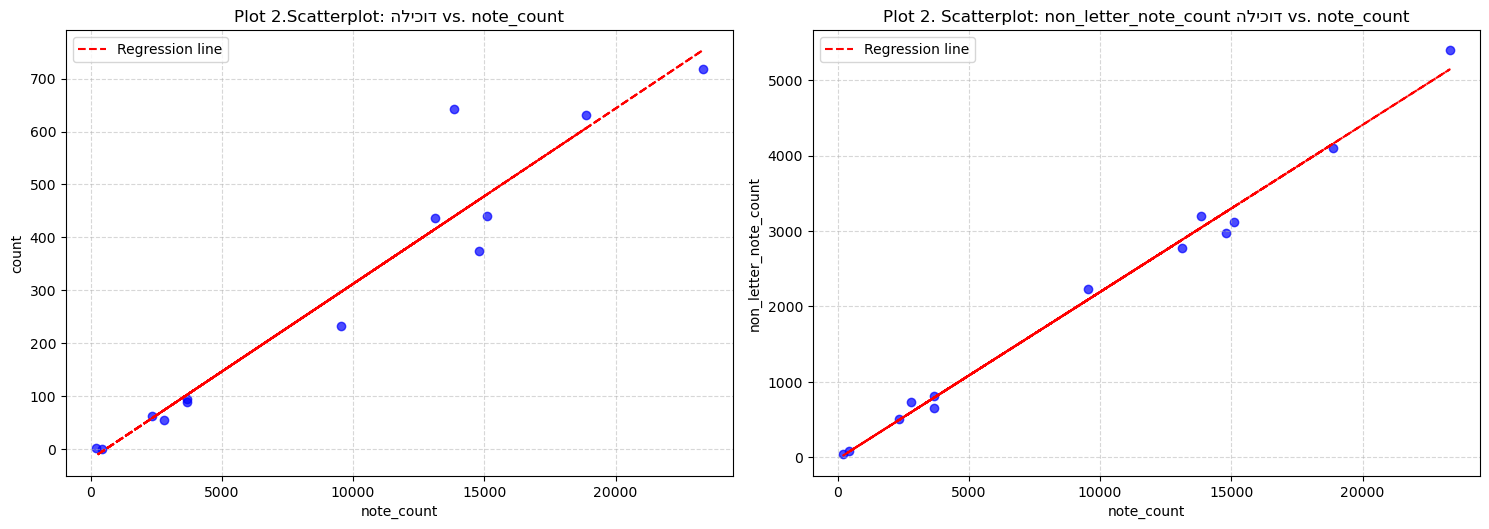

''

In [ ]:
# I need to run pairpolt with non_letter_note_count using merge_notecount_nonletter

import matplotlib.pyplot as plt
import numpy as np
import arabic_reshaper
from bidi.algorithm import get_display

# Helper function to reshape and display Hebrew text properly
def reshape_text(text):
    reshaped_text = arabic_reshaper.reshape(text)  # Reshape text for proper display
    return get_display(reshaped_text)  # Apply bidi algorithm to handle RTL

# Filter data for הליכוד, unknown speaker, and תקווה חדשה
likud_data = merge_notecount_nonletter[merge_notecount_nonletter['party'] == 'הליכוד']
unknown_speaker_data = merge_notecount_nonletter[merge_notecount_nonletter['party'] == 'unknown speaker']
tikva_hadasha_data = merge_notecount_nonletter[merge_notecount_nonletter['party'] == 'תקווה חדשה']

# Set up the figure for subplots
plt.figure(figsize=(15, 10))

# Plot 1: הליכוד  count vs note_count
if not likud_data.empty:
    plt.subplot(2, 2, 1)
    x = likud_data['note_count']
    y = likud_data['count']
    plt.scatter(x, y, alpha=0.7, color='blue')
    # Regression line
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m * x + b, color='red', linestyle='--', label='Regression line')
    plt.title("Plot 2.Scatterplot: הליכוד vs. note_count")
    plt.xlabel("note_count")
    plt.ylabel("count")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()


    # Plot 2: הליכוד  note_count VS non_letter_note_count
if not likud_data.empty:
    plt.subplot(2, 2, 2)
    x = likud_data['note_count']
    y = likud_data['non_letter_note_count']
    plt.scatter(x, y, alpha=0.7, color='blue')
    # Regression line
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m * x + b, color='red', linestyle='--', label='Regression line')
    plt.title("Plot 2. Scatterplot: non_letter_note_count הליכוד vs. note_count")
    plt.xlabel("note_count")
    plt.ylabel("non_letter_note_count")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()

""""""
#######I am not sure what u tried to corrlate on plot 3 and 4:


# Plot 3: Unknown Speaker (x-axis) vs תקווה חדשה (y-axis)
# if not unknown_speaker_data.empty and not tikva_hadasha_data.empty:
#     merged_data = unknown_speaker_data.merge(
#         tikva_hadasha_data, on="session", suffixes=("_unknown", "_tikva")
#     )
#     plt.subplot(2, 2, 3)
#     x = merged_data['count']
#     y = merged_data['non_letter_note_count']
#     plt.scatter(x, y, alpha=0.7, color='green')
#     # Regression line
#     m, b = np.polyfit(x, y, 1)
#     plt.plot(x, m * x + b, color='red', linestyle='--', label='Regression line')
#     plt.title(reshape_text(" Plot 3. דובר לא ידוע (x) vs. תקווה חדשה (y)"))
#     plt.xlabel("count_unknown")
#     plt.ylabel("non_letter_note_count")
#     plt.grid(True, linestyle='--', alpha=0.5)
#     plt.legend()

# Plot 4: Unknown Speaker (x-axis) vs הליכוד (y-axis)
# if not likud_data.empty and not unknown_speaker_data.empty:
#     merged_data = likud_data.merge(
#         unknown_speaker_data, on="session", suffixes=("_likud", "_unknown")
#     )
#     plt.subplot(2, 2, 4)
#     x = merged_data['count']
#     y = merged_data['non_letter_note_count']
#     plt.scatter(x, y, alpha=0.7, color='red')
#     # Regression line
#     m, b = np.polyfit(x, y, 1)
#     plt.plot(x, m * x + b, color='blue', linestyle='--', label='Regression line')
#     plt.title(reshape_text("Plot 4. דובר לא ידוע (x) vs. הליכוד (y)"))
#     plt.xlabel("count_unknown")
#     plt.ylabel("non_letter_note_count")
#     plt.grid(True, linestyle='--', alpha=0.5)
#     plt.legend()


# Adjust layout and display
plt.tight_layout()
plt.show()
""""""

#I changed in this code the dataframe name :merge_notecount_nonletter


### Results of 3 scatter plots - showing linear correlation

In [ ]:
# Correlations with non_letter_note_count using merge_notecount_nonletter

# Filter data for הליכוד, unknown speaker, and תקווה חדשה
likud_data = merge_notecount_nonletter[merge_notecount_nonletter['party'] == 'הליכוד']
unknown_speaker_data = merge_notecount_nonletter[merge_notecount_nonletter['party'] == 'unknown speaker']
tikva_hadasha_data = merge_notecount_nonletter[merge_notecount_nonletter['party'] == 'תקווה חדשה']

# Calculate Pearson's correlation coefficients

# הליכוד vs note_count
if not likud_data.empty:
    correlation_1 = likud_data['count'].corr(likud_data['non_letter_note_count'])
    print(f"Correlation (count vs. non_letter_note_count for Likud): {correlation_1}")
else:
    print("No data available for הליכוד")


    # הליכוד vs note_count
if not likud_data.empty:
    correlation_1 = likud_data['note_count'].corr(likud_data['non_letter_note_count'])
    print(f"Correlation (note_count vs. non_letter_note_count for Likud): {correlation_1}")
else:
    print("No data available for הליכוד")

"""
# Unknown Speaker vs תקווה חדשה
if not unknown_speaker_data.empty and not tikva_hadasha_data.empty:
    merged_data = unknown_speaker_data.merge(
        tikva_hadasha_data, on="session", suffixes=("_unknown", "_tikva")
    )
    correlation_2 = merged_data['count_unknown'].corr(merged_data['count_tikva'])
    print(f"Correlation (Unknown Speaker vs. תקווה חדשה): {correlation_2}")
else:
    print("Insufficient data for Unknown Speaker or תקווה חדשה")

# הליכוד vs Unknown Speaker
if not likud_data.empty and not unknown_speaker_data.empty:
    merged_data = likud_data.merge(
        unknown_speaker_data, on="session", suffixes=("_likud", "_unknown")
    )
    correlation_3 = merged_data['count_likud'].corr(merged_data['count_unknown'])
    print(f"Correlation (הליכוד vs. Unknown Speaker): {correlation_3}")
else:
    print("Insufficient data for הליכוד or Unknown Speaker")
    """
# Almost perfect correlation between note_count and non_letter_note_count for likud.
# I suggest we will make a new feature that will include them both in the count?


Correlation (count vs. non_letter_note_count for Likud): 0.9677661392108626
Correlation (note_count vs. non_letter_note_count for Likud): 0.9959403165082439


'\n# Unknown Speaker vs תקווה חדשה\nif not unknown_speaker_data.empty and not tikva_hadasha_data.empty:\n    merged_data = unknown_speaker_data.merge(\n        tikva_hadasha_data, on="session", suffixes=("_unknown", "_tikva")\n    )\n    correlation_2 = merged_data[\'count_unknown\'].corr(merged_data[\'count_tikva\'])\n    print(f"Correlation (Unknown Speaker vs. תקווה חדשה): {correlation_2}")\nelse:\n    print("Insufficient data for Unknown Speaker or תקווה חדשה")\n\n# הליכוד vs Unknown Speaker\nif not likud_data.empty and not unknown_speaker_data.empty:\n    merged_data = likud_data.merge(\n        unknown_speaker_data, on="session", suffixes=("_likud", "_unknown")\n    )\n    correlation_3 = merged_data[\'count_likud\'].corr(merged_data[\'count_unknown\'])\n    print(f"Correlation (הליכוד vs. Unknown Speaker): {correlation_3}")\nelse:\n    print("Insufficient data for הליכוד or Unknown Speaker")\n    '

אפשר להתחיל לנסות רגרסיה לינארית אבל קודם לא לשכוח לעשות scaling לפיצ'רים

X will be note_count & non_letter_note_count

y label will be הליכוד

and i should calculate RMSE approx. 5%

# Merging to one big dataset

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
####session should be discrete categories and not int type, they dont have numerical meaning, it's like id
merge_notecount_nonletter.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   session                171 non-null    int64 
 1   party                  171 non-null    object
 2   count                  171 non-null    int64 
 3   note_count             171 non-null    int32 
 4   non_letter_note_count  171 non-null    int64 
dtypes: int32(1), int64(3), object(1)
memory usage: 6.1+ KB


In [ ]:
#session should be category (like id) not int type:
merge_notecount_nonletter['session'] = merge_notecount_nonletter['session'].astype('category')

merge_notecount_nonletter['session'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 171 entries, 0 to 170
Series name: session
Non-Null Count  Dtype   
--------------  -----   
171 non-null    category
dtypes: category(1)
memory usage: 963.0 bytes


In [ ]:
#Now I want to create a big df with all features:
# MERGE merge_notecount_nonletter with (role,text,subject,sub_subject) on=['session', 'party'] from processed_combined_data

# Load the processed_combined_data CSV file
processed_combined_data = pd.read_csv(r"C:\Users\User\Downloads\processed_combined_data.csv")

# Select only the necessary columns from processed_combined_data
columns_to_merge = ['session', 'party', 'role', 'text', 'subject', 'sub_subject']
processed_subset = processed_combined_data[columns_to_merge]

# Merge using the session and updated party from merge_notecount_nonletter
df = merge_notecount_nonletter.merge(
    processed_subset,
    on=['session', 'party'],  # Merge based on session and party
    how='left'  # Keep all rows from merge_notecount_nonletter
)

# Save the merged DataFrame to a new CSV file
df.to_csv("processed_combined_data2.csv", index=False)

# Display the first few rows of the resulting DataFram
df.head()


,session,party,count,note_count,non_letter_note_count,role,text,subject,sub_subject
0,127,no party,1,19,5,מזכיר הכנסת,"ברשות יושב-ראש הכנסת, אני מתכבד להודיעכם, כי ה...",מסמכים שהונחו על שולחן הכנסת,NaN
1,127,הליכוד,94,3667,812,NaN,"תודה, אדוני היושב-ראש. חבריי חברי הכנסת, חבריי...",ציון יום הניצחון על גרמניה הנאצית,NaN
2,127,הליכוד,94,3667,812,NaN,"כן. אדוני היושב-ראש, כפי שהבטחנו, וכדי שהחוק ה...","הצעת חוק דמי מחלה (תיקון מס' 6), התשפ""ב–2022",(קריאה שנייה וקריאה שלישית)
3,127,הליכוד,94,3667,812,NaN,"אפשר לברך, אדוני?","הצעת חוק דמי מחלה (תיקון מס' 6), התשפ""ב–2022",(קריאה שנייה וקריאה שלישית)
4,127,הליכוד,94,3667,812,NaN,"תודה רבה לך, אדוני היושב-ראש. תודה לחברי הכנסת...","הצעת חוק דמי מחלה (תיקון מס' 6), התשפ""ב–2022",(קריאה שנייה וקריאה שלישית)


In [ ]:
#I verified that the merge is correct
session_to_check = 127
party_to_check = 'no party'

# Filter rows in processed_combined_data
original_row = processed_combined_data[
    (processed_combined_data['session'] == session_to_check) &
    (processed_combined_data['party'] == party_to_check)
][['session', 'party', 'role']]

# Filter rows in the merged df
merged_row = df[
    (df['session'] == session_to_check) &
    (df['party'] == party_to_check)
][['session', 'party', 'role']]

# Print for comparison
print("Original Data:")
print(original_row)

print("\nMerged Data:")
print(merged_row)


Original Data:
   session     party         role
2      127  no party  מזכיר הכנסת

Merged Data:
   session     party         role
0      127  no party  מזכיר הכנסת


In [ ]:
"""""
# נושאים במליאה 128 שכנראה הליכוד דיבר עליהם הרבה:
# Filter the merged DataFrame for session 128 and display the subject column
session_128_subjects = df[df['session'] == 128]['subject']

# Print the unique subjects or the entire column
print(session_128_subjects.unique())  # Display unique subjects for session 128
# נושאים במליאה 128 שכנראה הליכוד דיבר עליהם הרבה:
הצעת חוק-יסוד ירושלים בירת ישראל (תיקון – איסור על פתיחת נציגות דיפלומטית זרה)'
 'פגיעה בפולחן הדת של יהודים במירון לעומת מתפללי אל-אקצא'
'הצעת חוק לתיקון פקודת המשטרה (תיעוד חזותי של השימוש במכת"זית), התשפ"ב–2022'
'ההתפתחויות הביטחוניות בחודשים האחרונים והתמודדות הממשלה עם גל הטרור'
""""""


In [ ]:
merge_notecount_nonletter['session'].unique()

[127, 128, 129, 130, 131, ..., 135, 136, 137, 138, 139]
Length: 13
Categories (13, int64): [127, 128, 129, 130, ..., 136, 137, 138, 139]

In [ ]:
#We can use all data types for linear regression, not just numaric features.
#In linear regression only the label should be numaric, the features can be all types (except for text).
#Therefore, I didn't run numeric_data pd
""""""
#numeric_data = pd.read_csv(r'session_party_counts_with_notes.csv')
""

''

In [ ]:
""""
# Check for missing values
print(numeric_data.isnull().sum())

# Fill or drop missing values if necessary
numeric_data = numeric_data.dropna()  # Example: Drop rows with missing values
"""""

## ORTAL Linear Regression (with only 1 feature -> note_count)

## Creating csv files of sessions from the processed_combined_data2.csv

***saved all filed in processed data folder in github repository***

In [ ]:
import pandas as pd
# Here I loaded the updated file
file_path = 'processed_combined_data.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Specify the column representing sessions
session_column = 'session'  # Adjust this to match the column name in your dataset

# Save each session's data as a separate CSV in the current working directory
for session, group in data.groupby(session_column):
    session_file_name = f'session_{int(session)}.csv'  # Example: session_127.csv
    group.to_csv(session_file_name, index=False)
    print(f"Saved {session_file_name} with {len(group)} rows.")

print("All session CSV files have been saved in the current directory.")



Saved session_127.csv with 260 rows.
Saved session_128.csv with 1788 rows.
Saved session_129.csv with 1958 rows.
Saved session_130.csv with 71 rows.
Saved session_131.csv with 630 rows.
Saved session_132.csv with 2130 rows.
Saved session_133.csv with 51 rows.
Saved session_134.csv with 1726 rows.
Saved session_135.csv with 1029 rows.
Saved session_136.csv with 318 rows.
Saved session_137.csv with 2412 rows.
Saved session_138.csv with 1919 rows.
Saved session_139.csv with 126 rows.
All session CSV files have been saved in the current directory.


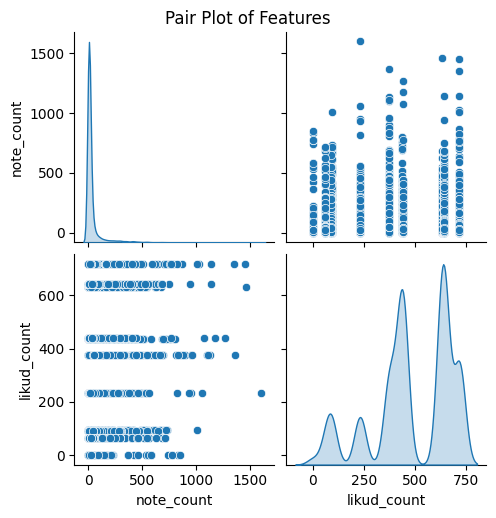

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

K-Fold Cross-Validation Results (5 folds):
  Mean RMSE: 1.00
  Mean R²: 0.01
Final model trained and saved.
Predicted likud_count for session_139.csv: 60250
        session  note_count  likud_count
0   session_127       25502           94
1   session_128       67230          375
2   session_129       58546          632
3   session_130        8746            1
4   session_131       21948           90
5   session_132       69218          718
6   session_133        4845            2
7   session_134       61621          437
8   session_135       49367          232
9   session_136       17087           63
10  session_137       75217          643
11  session_138       66655          441


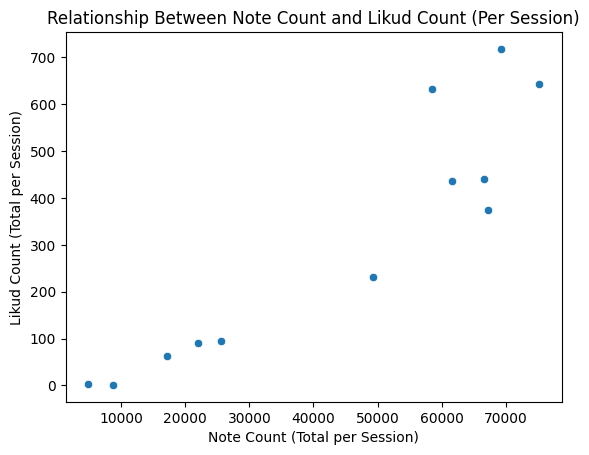

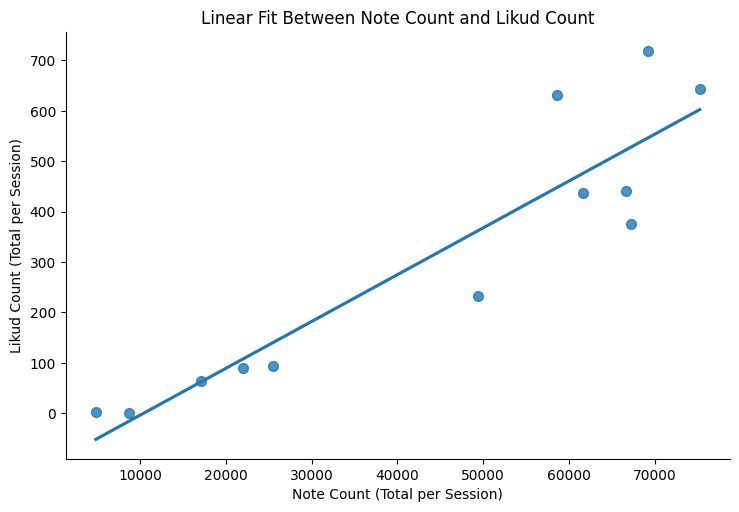

             note_count  likud_count
note_count     1.000000     0.919403
likud_count    0.919403     1.000000


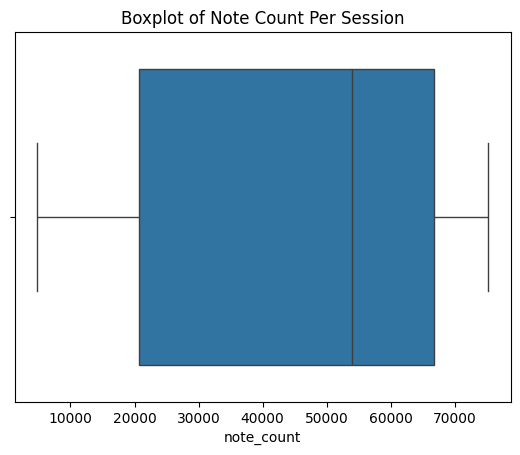

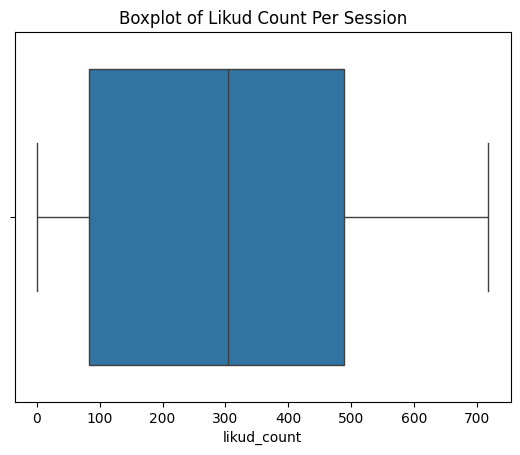

Model Coefficients: [0.00929573]
Intercept: -96.78209005994432


In [ ]:
import pickle
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Function to prepare data for training
def prepare_training_data(file_list):
    combined_data = []
    for file in file_list:
        data = pd.read_csv(file)

        # Ensure 'party' column exists
        if 'party' not in data.columns:
            print(f"Skipping {file}: Missing 'party' column.")
            continue

        # Calculate note_count if not already present
        if 'note_count' not in data.columns and 'text' in data.columns:
            data['note_count'] = (
                data['text']
                .fillna("")  # Replace NaN with empty string
                .str.split()
                .str.len()
                .astype(int)
            )

        # Calculate likud_count
        likud_count = data['party'].value_counts().get('הליכוד', 0)
        data['likud_count'] = likud_count

        combined_data.append(data[['note_count', 'likud_count']])  # Use only relevant columns

    # Combine all sessions into one dataset
    return pd.concat(combined_data, ignore_index=True)

# Function to visualize relationships with a pair plot
def plot_pairplot(training_data):
    """
    Generates a pair plot for the training data to visualize relationships
    between features and the target.
    """
    sns.pairplot(training_data, diag_kind="kde", markers="o")
    plt.suptitle("Pair Plot of Features", y=1.02)  # Add a title
    plt.show()

# Function to train the model using K-Fold Cross-Validation
#Each fold is used as a test set once, while the remaining folds are used as the training set.
def train_model_with_kfold(training_data, k=5):
    # Define features (X) and target (y)
    X = training_data[['note_count']].values
    y = training_data['likud_count'].values

    # Scale features and target
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()

    X_scaled = scaler_X.fit_transform(X)
    y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

    # Initialize K-Fold
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    model = LinearRegression()

    # Metrics for tracking performance
    rmse_scores = []
    r2_scores = []

    for train_idx, val_idx in kf.split(X_scaled):
        X_train, X_val = X_scaled[train_idx], X_scaled[val_idx]
        y_train, y_val = y_scaled[train_idx], y_scaled[val_idx]

        # Train the model
        model.fit(X_train, y_train)

        # Validate the model
        y_val_pred = model.predict(X_val)
        rmse = mean_squared_error(y_val, y_val_pred, squared=False)
        r2 = r2_score(y_val, y_val_pred)

        rmse_scores.append(rmse)
        r2_scores.append(r2)

    # Display cross-validation metrics
    print(f"K-Fold Cross-Validation Results ({k} folds):")
    print(f"  Mean RMSE: {np.mean(rmse_scores):.2f}")
    print(f"  Mean R²: {np.mean(r2_scores):.2f}")

    # Train the final model on all data
    model.fit(X_scaled, y_scaled)

    # Save scalers and model for later use
    with open('model_and_scalers.pkl', 'wb') as f:
        pickle.dump((model, scaler_X, scaler_y), f)

    print("Final model trained and saved.")
    return model, scaler_X, scaler_y

# Function to use the trained model for prediction
def run_model(test_file):
    # Load the trained model and scalers
    with open('model_and_scalers.pkl', 'rb') as f:
        model, scaler_X, scaler_y = pickle.load(f)

    # Load the test dataset
    data = pd.read_csv(test_file)

    # Ensure the `party` column exists
    if 'party' not in data.columns:
        raise ValueError(f"{test_file} is missing the 'party' column.")

    # Calculate note_count if not already present
    if 'note_count' not in data.columns and 'text' in data.columns:
        data['note_count'] = (
            data['text']
            .fillna("")  # Replace NaN with empty string
            .str.split()
            .str.len()
            .astype(int)
        )

    # Extract features
    X_test = data[['note_count']].values
    X_test_scaled = scaler_X.transform(X_test)

    # Predict the scaled target and inverse transform it to original scale
    y_pred_scaled = model.predict(X_test_scaled)
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

    # Return the sum of predicted likud_count
    return int(round(sum(y_pred)))

# Main script
if __name__ == "__main__":
    # Step 1: Define training files and test file
    train_files = [
        'session_127.csv',
        'session_128.csv',
        'session_129.csv',
        'session_130.csv',
        'session_131.csv',
        'session_132.csv',
        'session_133.csv',
        'session_134.csv',
        'session_135.csv',
        'session_136.csv',
        'session_137.csv',
        'session_138.csv'
    ]
    test_file = 'session_139.csv'

    # Step 2: Prepare training data
    training_data = prepare_training_data(train_files)

    # Step 2.5: Visualize relationships using a pair plot
    plot_pairplot(training_data)

    # Step 3: Train the model with K-Fold Cross-Validation
    train_model_with_kfold(training_data, k=5)

    # Step 4: Use the trained model for prediction on the test file
    predicted_likud_count = run_model(test_file)
    print(f"Predicted likud_count for {test_file}: {predicted_likud_count}")


def calculate_session_metrics(file_list):
    session_data = []

    for file in file_list:
        data = pd.read_csv(file)

        # Ensure the necessary columns exist
        if 'party' not in data.columns or 'text' not in data.columns:
            print(f"Skipping {file}: Missing required columns.")
            continue

        # Calculate note_count if not already present
        if 'note_count' not in data.columns:
            data['note_count'] = (
                data['text']
                .fillna("")  # Replace NaN with empty string
                .str.split()
                .str.len()
            )

        # Calculate metrics for this session
        session_note_count = data['note_count'].sum()
        session_likud_count = data[data['party'] == 'הליכוד'].shape[0]

        # Store session-level data
        session_data.append({
            'session': file.split('.')[0],  # Extract session name from filename
            'note_count': session_note_count,
            'likud_count': session_likud_count
        })

    return pd.DataFrame(session_data)

# Example usage
session_metrics = calculate_session_metrics(train_files)
print(session_metrics)

import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=session_metrics, x='note_count', y='likud_count')
plt.title('Relationship Between Note Count and Likud Count (Per Session)')
plt.xlabel('Note Count (Total per Session)')
plt.ylabel('Likud Count (Total per Session)')
plt.show()

sns.lmplot(data=session_metrics, x='note_count', y='likud_count', ci=None, aspect=1.5, scatter_kws={'s': 50})
plt.title('Linear Fit Between Note Count and Likud Count')
plt.xlabel('Note Count (Total per Session)')
plt.ylabel('Likud Count (Total per Session)')
plt.show()

correlation = session_metrics[['note_count', 'likud_count']].corr()
print(correlation)

sns.boxplot(data=session_metrics, x='note_count')
plt.title('Boxplot of Note Count Per Session')
plt.show()

sns.boxplot(data=session_metrics, x='likud_count')
plt.title('Boxplot of Likud Count Per Session')
plt.show()

from sklearn.linear_model import LinearRegression

X = session_metrics[['note_count']].values
y = session_metrics['likud_count'].values

model = LinearRegression()
model.fit(X, y)

print(f"Model Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")


#here i improved you model by usung the 'processed_combined_data2' :
#Mean RMSE: 0.94
#Mean R²: 0.11


## GPT explains about slopes in linear regression and how to improve

Model Equation
The equation of a linear regression model is:

𝑦
=
𝛽
0
+
𝛽
1
⋅
𝑥
y=β
0
​
 +β
1
​
 ⋅x
Where:

𝑦
y: Predicted value (likud_count)
𝛽
0
β
0
​
 : Intercept (-96.782)
𝛽
1
β
1
​
 : Coefficient for note_count (0.0093)
𝑥
x: Value of note_count
So, the equation for your model is:

\text{likud_count} = -96.782 + 0.0093 \cdot \text{note_count}
Interpretation
Coefficient (0.0093):

This is the slope of the line, representing the average change in likud_count for a one-unit increase in note_count.
For every additional note in a session, the model predicts an increase of 0.0093 Likud contributions on average.
Intercept (-96.782):

This is the predicted value of likud_count when note_count is zero.
A negative intercept indicates that at very low note_count values, the model predicts a negative likud_count, which is not physically meaningful but is common in linear models when extrapolated beyond the data range.
How to Use This Model
To predict likud_count for a given note_count, plug in the value of note_count into the model equation.

Example: If note_count = 500:

\text{likud_count} = -96.782 + 0.0093 \cdot 500 \text{likud_count} = -96.782 + 4.647 = -92.135
The model predicts approximately -92.135 Likud contributions, which seems off due to the intercept's behavior.

Implications for Your Analysis

The low coefficient (0.0093) suggests a ***weak slope***, meaning ***the impact of note_count on likud_count is relatively small per unit.***
****The negative intercept highlights that the linear relationship might not hold well at lower values of note_count.***

 This could suggest:

A need to recheck the data.

***The possibility of transformations (e.g., log-transformation of note_count or likud_count) to improve the model.***

***Exploring non-linear relationships (e.g., polynomial regression).***


## GPT insights about the linear regression code and how to improve it

Summary of ORTAL Linear Regression Code
Objective: Predict likud_count (total count of speakers from the "הליכוד" party) in a session using note_count as the primary feature.

Methods:

K-Fold Cross-Validation: Used to evaluate model performance across different training-validation splits (5-fold, with RMSE and
𝑅
2
R
2
  scores reported).
Feature Scaling: Standardized features and target values using StandardScaler.
Data Preparation:
Extracted note_count from text data.
Derived likud_count (target) for each session.
Visualization: Pair plots, scatterplots, and linear fits were used to understand relationships between features.
Current Performance:

RMSE as a percentage of the mean target (count) ranges from 15.34% to 24.08% in various attempts.
𝑅
2
R
2
  scores are decent, reaching 0.83 to 0.85.
Areas for Improvement
To achieve RMSE < 5%, here's what can be improved:

Feature Engineering:

Use additional features like non_letter_note_count, role, session metadata, or speaker characteristics.
Derive new interaction terms, such as note_count × session.
Add polynomial terms (e.g., square of note_count) to capture non-linear relationships.
Model Selection:

Experiment with more robust regression models:
Ridge Regression and Lasso Regression: Handle multicollinearity and prevent overfitting.
Decision Trees or Gradient Boosting: Capture non-linear patterns.
Handling Outliers:

Analyze and cap extreme values in note_count and likud_count that may inflate RMSE.
Cross-Validation and Hyperparameter Tuning:

Perform Grid Search with hyperparameter optimization (e.g., for Ridge or Lasso).
Increase k in K-Fold Cross-Validation for better validation results.

In [ ]:
import pandas as pd
# Here I loaded the updated file
file_path = 'processed_combined_data2.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Specify the column representing sessions
session_column = 'session'  # Adjust this to match the column name in your dataset

# Save each session's data as a separate CSV in the current working directory
for session, group in data.groupby(session_column):
    session_file_name = f'session_{int(session)}.csv'  # Example: session_127.csv
    group.to_csv(session_file_name, index=False)
    print(f"Saved {session_file_name} with {len(group)} rows.")

print("All session CSV files have been saved in the current directory.")



Saved session_127.csv with 260 rows.
Saved session_128.csv with 1788 rows.
Saved session_129.csv with 1958 rows.
Saved session_130.csv with 71 rows.
Saved session_131.csv with 630 rows.
Saved session_132.csv with 2130 rows.
Saved session_133.csv with 51 rows.
Saved session_134.csv with 1726 rows.
Saved session_135.csv with 1029 rows.
Saved session_136.csv with 318 rows.
Saved session_137.csv with 2412 rows.
Saved session_138.csv with 1919 rows.
Saved session_139.csv with 126 rows.
All session CSV files have been saved in the current directory.


In [ ]:
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# ------------------- Data Preparation ------------------- #
def prepare_training_data(file_list):
    """
    Combines training data files, calculates note_count (log-transformed) and likud_count.
    Groups data by session and party for better structure.
    """
    combined_data = []

    for file in file_list:
        data = pd.read_csv(file)

        # Ensure necessary columns exist
        if 'party' not in data.columns or 'text' not in data.columns:
            print(f"Skipping {file}: Missing required columns.")
            continue

        # Calculate note_count (word count per row)
        data['note_count'] = (
            data['text']
            .fillna("")  # Replace NaN with empty string
            .str.split()
            .str.len()
            .astype(int)
        )

        # Apply log transformation to note_count
        data['log_note_count'] = np.log1p(data['note_count'])  # log(1 + note_count)

        # Calculate likud_count
        likud_count = data['party'].value_counts().get('הליכוד', 0)
        data['likud_count'] = likud_count

        # Group by session and party, aggregate log_note_count
        grouped_data = (
            data.groupby(['session', 'party'], as_index=False)
            .agg({'log_note_count': 'sum', 'likud_count': 'mean'})
        )

        combined_data.append(grouped_data[['log_note_count', 'likud_count']])

    # Combine all sessions into one dataset
    return pd.concat(combined_data, ignore_index=True)


# ------------------- Model Training ------------------- #
def train_model_with_kfold(training_data, k=5):
    """
    Trains a Linear Regression model using K-Fold Cross-Validation with scaled features.
    Saves the final model and scalers.
    """
    # Define features (X) and target (y)
    X = training_data[['log_note_count']].values
    y = training_data['likud_count'].values

    # Scale features and target
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()

    X_scaled = scaler_X.fit_transform(X)
    y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

    # Initialize K-Fold
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    model = LinearRegression()

    # Metrics for tracking performance
    rmse_scores = []
    r2_scores = []

    for train_idx, val_idx in kf.split(X_scaled):
        X_train, X_val = X_scaled[train_idx], X_scaled[val_idx]
        y_train, y_val = y_scaled[train_idx], y_scaled[val_idx]

        # Train the model
        model.fit(X_train, y_train)

        # Validate the model
        y_val_pred = model.predict(X_val)
        rmse = mean_squared_error(y_val, y_val_pred, squared=False)
        r2 = r2_score(y_val, y_val_pred)

        rmse_scores.append(rmse)
        r2_scores.append(r2)

    # Display cross-validation metrics
    print(f"K-Fold Cross-Validation Results ({k} folds):")
    print(f"  Mean RMSE: {np.mean(rmse_scores):.2f}")
    print(f"  Mean R²: {np.mean(r2_scores):.2f}")

    # Train the final model on all data
    model.fit(X_scaled, y_scaled)

    # Save scalers and model for later use
    with open('model_and_scalers.pkl', 'wb') as f:
        pickle.dump((model, scaler_X, scaler_y), f)

    print("Final model trained and saved.")
    return model, scaler_X, scaler_y


# ------------------- Test Set Prediction ------------------- #
def organize_and_run_model(test_file):
    """
    Organize the test dataset, apply log transformation, and use the trained model for predictions.
    """
    # Load the trained model and scalers
    with open('model_and_scalers.pkl', 'rb') as f:
        model, scaler_X, scaler_y = pickle.load(f)

    # Load the test dataset
    data = pd.read_csv(test_file)

    # Ensure necessary columns exist
    if 'party' not in data.columns or 'text' not in data.columns:
        raise ValueError("Test file must include 'text' and 'party' columns.")

    # Calculate note_count and log transformation
    data['note_count'] = (
        data['text']
        .fillna("")  # Replace NaN with empty string
        .str.split()
        .str.len()
        .astype(int)
    )
    data['log_note_count'] = np.log1p(data['note_count'])  # log(1 + note_count)

    # Group by session and party
    organized_test_data = (
        data.groupby(['session', 'party'], as_index=False)
        .agg({'log_note_count': 'sum'})
    )

    # Prepare features for prediction
    X_test = organized_test_data[['log_note_count']].values
    X_test_scaled = scaler_X.transform(X_test)

    # Predict and inverse-transform to original scale
    y_pred_scaled = model.predict(X_test_scaled)
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

    # Add predictions to organized test data
    organized_test_data['predicted_likud_count'] = y_pred

    # Sum the predicted likud_count
    total_likud_count = organized_test_data['predicted_likud_count'].sum()

    print("Predicted Likud Count for Test Set (Organized and Log-Transformed):")
    print(round(total_likud_count))
    return organized_test_data


# ------------------- Main Script ------------------- #
if __name__ == "__main__":
    # Step 1: Define training files and test file
    train_files = [
        'session_127.csv',
        'session_128.csv',
        'session_129.csv',
        'session_130.csv',
        'session_131.csv',
        'session_132.csv',
        'session_133.csv',
        'session_134.csv',
        'session_135.csv',
        'session_136.csv',
        'session_137.csv',
        'session_138.csv'
    ]
    test_file = 'session_139.csv'

    # Step 2: Prepare training data
    training_data = prepare_training_data(train_files)

    # Step 3: Train the model with K-Fold Cross-Validation
    train_model_with_kfold(training_data, k=5)

    # Step 4: Organize the test data and predict
    organized_results = organize_and_run_model(test_file)
    print(organized_results.head())


K-Fold Cross-Validation Results (5 folds):
  Mean RMSE: 0.91
  Mean R²: 0.14
Final model trained and saved.
Predicted Likud Count for Test Set (Organized and Log-Transformed):
2894
   session            party  log_note_count  predicted_likud_count
0      139         no party        8.632662             253.338319
1      139  unknown speaker        2.772589             251.148079
2      139           הליכוד      151.687561             306.806012
3      139    הציונות הדתית       10.856110             254.169347
4      139   הרשימה המשותפת       50.437568             268.963173


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

In [ ]:
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# ------------------- Data Preparation ------------------- #
def prepare_training_data(file_list):
    """
    Combines training data files, calculates aggregated session-level features,
    and uses them to predict likud_count for each session.
    """
    combined_data = []

    for file in file_list:
        data = pd.read_csv(file)

        # Ensure necessary columns exist
        if 'party' not in data.columns or 'text' not in data.columns:
            print(f"Skipping {file}: Missing required columns.")
            continue

        # Calculate note_count (word count per row)
        data['note_count'] = (
            data['text']
            .fillna("")  # Replace NaN with empty string
            .str.split()
            .str.len()
            .astype(int)
        )
        data['log_note_count'] = np.log1p(data['note_count'])  # log(1 + note_count)

        # Count Likud rows in the session
        likud_count = len(data[data['party'] == 'הליכוד'])

        # Aggregate session-level features
        session_features = (
            data.groupby('session', as_index=False)
            .agg({'log_note_count': 'sum'})  # Aggregate log_note_count for the session
        )
        session_features['likud_count'] = likud_count

        combined_data.append(session_features)

    # Combine all sessions into one dataset
    return pd.concat(combined_data, ignore_index=True)


# ------------------- Model Training ------------------- #
def train_model_with_kfold(training_data, k=5):
    """
    Trains a Linear Regression model using K-Fold Cross-Validation with scaled features.
    Saves the final model and scalers.
    """
    # Define features (X) and target (y)
    X = training_data[['log_note_count']].values
    y = training_data['likud_count'].values

    # Scale features and target
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()

    X_scaled = scaler_X.fit_transform(X)
    y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

    # Initialize K-Fold
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    model = LinearRegression()

    # Metrics for tracking performance
    rmse_scores = []
    r2_scores = []

    for train_idx, val_idx in kf.split(X_scaled):
        X_train, X_val = X_scaled[train_idx], X_scaled[val_idx]
        y_train, y_val = y_scaled[train_idx], y_scaled[val_idx]

        # Train the model
        model.fit(X_train, y_train)

        # Validate the model
        y_val_pred = model.predict(X_val)
        rmse = mean_squared_error(y_val, y_val_pred, squared=False)
        r2 = r2_score(y_val, y_val_pred)

        rmse_scores.append(rmse)
        r2_scores.append(r2)

    # Display cross-validation metrics
    print(f"K-Fold Cross-Validation Results ({k} folds):")
    print(f"  Mean RMSE: {np.mean(rmse_scores):.2f}")
    print(f"  Mean R²: {np.mean(r2_scores):.2f}")

    # Train the final model on all data
    model.fit(X_scaled, y_scaled)

    # Save scalers and model for later use
    with open('model_and_scalers.pkl', 'wb') as f:
        pickle.dump((model, scaler_X, scaler_y), f)

    print("Final model trained and saved.")
    return model, scaler_X, scaler_y


# ------------------- Test Set Prediction ------------------- #
def organize_and_run_model(test_file):
    """
    Organize the test dataset, calculate session-level features, and predict the Likud row count.
    """
    # Load the trained model and scalers
    with open('model_and_scalers.pkl', 'rb') as f:
        model, scaler_X, scaler_y = pickle.load(f)

    # Load the test dataset
    data = pd.read_csv(test_file)

    # Ensure necessary columns exist
    if 'party' not in data.columns or 'text' not in data.columns:
        raise ValueError("Test file must include 'text' and 'party' columns.")

    # Calculate note_count and log transformation
    data['note_count'] = (
        data['text']
        .fillna("")  # Replace NaN with empty string
        .str.split()
        .str.len()
        .astype(int)
    )
    data['log_note_count'] = np.log1p(data['note_count'])  # log(1 + note_count)

    # Aggregate session-level features
    session_features = (
        data.groupby('session', as_index=False)
        .agg({'log_note_count': 'sum'})  # Aggregate log_note_count
    )

    # Prepare features for prediction
    X_test = session_features[['log_note_count']].values
    X_test_scaled = scaler_X.transform(X_test)

    # Predict and inverse-transform to original scale
    y_pred_scaled = model.predict(X_test_scaled)
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

    # Assume only one session in the test file
    total_likud_count = y_pred[0]  # Predict for the session
    print(f"Predicted Likud Count for Test Session: {round(total_likud_count)}")
    return round(total_likud_count), session_features


# ------------------- Main Script ------------------- #
if __name__ == "__main__":
    # Step 1: Define training files and test file
    train_files = [
        'session_127.csv',
        'session_128.csv',
        'session_129.csv',
        'session_130.csv',
        'session_131.csv',
        'session_132.csv',
        'session_133.csv',
        'session_134.csv',
        'session_135.csv',
        'session_136.csv',
        'session_137.csv',
        'session_138.csv'
    ]
    test_file = 'session_139.csv'

    # Step 2: Prepare training data
    training_data = prepare_training_data(train_files)

    # Step 3: Train the model with K-Fold Cross-Validation
    train_model_with_kfold(training_data, k=5)

    # Step 4: Organize the test data and predict
    predicted_likud_count, _ = organize_and_run_model(test_file)
    print(f"Final Predicted Likud Count: {predicted_likud_count}")


K-Fold Cross-Validation Results (5 folds):
  Mean RMSE: 0.35
  Mean R²: -1517.23
Final model trained and saved.
Predicted Likud Count for Test Session: 1
Final Predicted Likud Count: 1


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

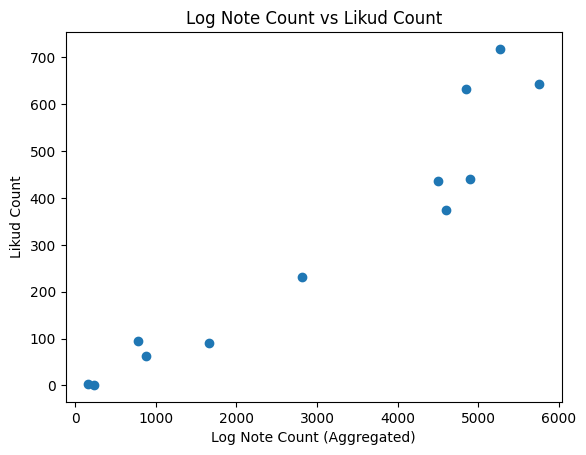

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(training_data['log_note_count'], training_data['likud_count'])
plt.xlabel('Log Note Count (Aggregated)')
plt.ylabel('Likud Count')
plt.title('Log Note Count vs Likud Count')
plt.show()


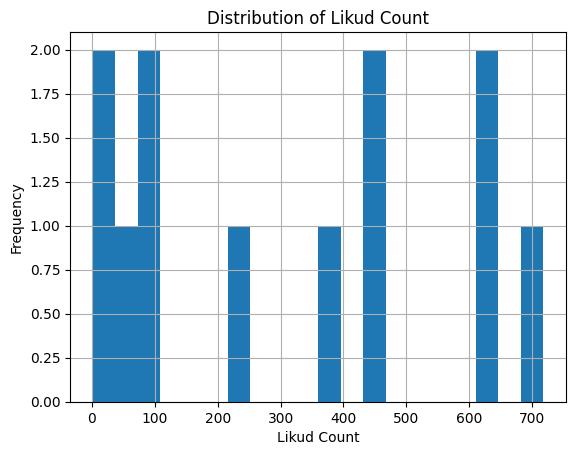

In [ ]:
training_data['likud_count'].hist(bins=20)
plt.xlabel('Likud Count')
plt.ylabel('Frequency')
plt.title('Distribution of Likud Count')
plt.show()


## RandomForest regresssor + groupKFold

In [ ]:
from sklearn.model_selection import train_test_split, GroupKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pickle
import warnings

warnings.filterwarnings("ignore")

# ------------------- Data Splitting ------------------- #
def split_data(training_data):
    """
    Splits data into training and test sets based on sessions.
    Ensures no overlap of sessions between train and test sets.
    """
    # Split sessions into training and test sets
    train_sessions, test_sessions = train_test_split(
        training_data['session'].unique(), test_size=0.2, random_state=42
    )

    # Create training and test dataframes
    train_data = training_data[training_data['session'].isin(train_sessions)]
    test_data = training_data[training_data['session'].isin(test_sessions)]

    return train_data, test_data

# ------------------- Model Training ------------------- #
def train_random_forest(train_data, k=5):
    """
    Trains a Random Forest Regressor with Group K-Fold Cross-Validation.
    Ensures session-based grouping during cross-validation.
    """
    X = train_data[['log_note_count']].values
    y = train_data['likud_count'].values
    groups = train_data['session'].values  # Session-based grouping for CV

    group_kfold = GroupKFold(n_splits=k)
    model = RandomForestRegressor(n_estimators=100, random_state=42)

    rmse_scores = []
    r2_scores = []

    for train_idx, val_idx in group_kfold.split(X, y, groups=groups):
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)

        rmse_scores.append(mean_squared_error(y_val, y_pred, squared=False))
        r2_scores.append(r2_score(y_val, y_pred))

    print(f"K-Fold Cross-Validation Results ({k} folds):")
    print(f"  Mean RMSE: {np.mean(rmse_scores):.2f}")
    print(f"  Mean R²: {np.mean(r2_scores):.2f}")

    # Train final model on all training data
    model.fit(X, y)
    with open('random_forest_model.pkl', 'wb') as f:
        pickle.dump(model, f)
    print("Final model trained and saved.")

    return model

# ------------------- Test Set Prediction ------------------- #
def predict_likud_count(test_data):
    """
    Predicts Likud count for the test set using the trained Random Forest model.
    """
    with open('random_forest_model.pkl', 'rb') as f:
        model = pickle.load(f)

    X_test = test_data[['log_note_count']].values
    y_test = test_data['likud_count'].values

    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    test_data['predicted_likud_count'] = y_pred
    print("Test Set Evaluation:")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R²: {r2:.2f}")

    total_predicted = test_data['predicted_likud_count'].sum()
    print(f"Total Predicted Likud Count: {total_predicted:.2f}")

    return test_data

# ------------------- Main Script ------------------- #
if __name__ == "__main__":
    # Load and prepare data
    train_files = [
        'session_127.csv', 'session_128.csv', 'session_129.csv',
        'session_130.csv', 'session_131.csv', 'session_132.csv',
        'session_133.csv', 'session_134.csv', 'session_135.csv',
        'session_136.csv', 'session_137.csv', 'session_138.csv', 'session_139.csv'
    ]
    training_data = prepare_training_data(train_files)

    # Split data into training and test sets
    train_data, test_data = split_data(training_data)

    # Train model with Group K-Fold CV
    model = train_random_forest(train_data, k=5)

    # Predict and evaluate on test set
    results = predict_likud_count(test_data)
    print(results.head())


K-Fold Cross-Validation Results (5 folds):
  Mean RMSE: 71.78
  Mean R²: 0.63
Final model trained and saved.
Test Set Evaluation:
  RMSE: 79.76
  R²: 0.78
Total Predicted Likud Count: 633.95
    session  log_note_count  likud_count  predicted_likud_count
0       127      783.408877           94                  35.45
9       136      884.905107           63                  35.45
11      138     4897.798675          441                 563.05


# OR Multiple Linear regression -WITH updated dataset (df=processed_combined_data2)

In [ ]:
# This is Multiple Linear Regression when filltering for Likud
# NO train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd



# Filter data for Likud Party ('הליכוד')
likud_data = df[df['party'] == 'הליכוד']

# Define independent variables (X) and dependent variable (y)
X = likud_data[['session', 'note_count', 'non_letter_note_count']].values  # Correctly selecting features
y = likud_data['count'].values  # Target variable

# Scale the independent variables
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

# Scale the dependent variable
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()  # Keep as 1D array

# Fit the Multiple Linear Regression model
model = LinearRegression()
model.fit(X_scaled, y_scaled)

# Predictions on the entire dataset
y_pred_scaled = model.predict(X_scaled)

# Inverse transform scaled predictions to match the original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# Calculate RMSE on the original scale
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Calculate RMSE as a percentage of the mean of the original target variable
rmse_percentage = (rmse / y.mean()) * 100

# Display results
print("Root Mean Squared Error (RMSE):", rmse)
print(f"RMSE as a Percentage of Mean 'count': {rmse_percentage:.2f}%")
print("R² Score:", model.score(X_scaled, y_scaled))

# Display coefficients
coef_summary = pd.DataFrame({
    'Feature': ['session', 'note_count', 'non_letter_note_count'],
    'Coefficient': model.coef_
})
print("\nCoefficient Summary:")
print(coef_summary)

#RMSE: 15.34%
#R² Score: 0.83


Root Mean Squared Error (RMSE): 78.35302511376156
RMSE as a Percentage of Mean 'count': 15.34%
R² Score: 0.83161746949015

Coefficient Summary:
                 Feature  Coefficient
0                session     0.158378
1             note_count    -0.219750
2  non_letter_note_count     1.149285


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib

# Define feature engineering function
#Fill here the code

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib

# Prepare the dataset: Drop rows with missing values in critical columns
df = df.dropna(subset=['session', 'text', 'role', 'party', 'note_count', 'count'])

# Use get_dummies to encode 'session'
X = pd.get_dummies(df[['session', 'note_count', 'non_letter_note_count']], columns=['session'], drop_first=True)
y = df['count']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the independent variables (excluding dummies, which are already binary)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Save the scaler and model for reuse
joblib.dump(scaler, 'likud_scaler.pkl')
joblib.dump(model, 'likud_model.pkl')

# Predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_percentage = (rmse / y_test.mean()) * 100
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print(f"RMSE as a Percentage of Mean count: {rmse_percentage:.2f}%")
print("R² Score:", r2)

# Display coefficients
coef_summary = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print("\nCoefficient Summary:")
print(coef_summary)


#RMSE as a Percentage of Mean count: 24.08%
#R² Score: 0.85

Root Mean Squared Error (RMSE): 46.53752732769585
RMSE as a Percentage of Mean count: 24.08%
R² Score: 0.8587676605884165

Coefficient Summary:
                  Feature  Coefficient
0              note_count   -36.492307
1   non_letter_note_count   139.331342
2             session_128    10.950446
3             session_129    24.724215
4             session_130     0.003290
5             session_131    17.872617
6             session_132    28.468543
7             session_133     2.951004
8             session_134    19.820580
9             session_135    17.317535
10            session_136     6.340675
11            session_137    42.467949
12            session_138    33.855815
13            session_139     0.052808


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Define independent variables (X) and dependent variable (y)
X = df[['session', 'note_count', 'non_letter_note_count']]
y = df['count']

# Scale the independent variables
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

# Scale the dependent variable
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()  # Keep as 1D array

# Split data into training and testing sets
X_train, X_test, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Fit the Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train_scaled)

# Predictions (scaled)
y_pred_scaled = model.predict(X_test)

# Inverse transform predictions to original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
y_test = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).ravel()

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate RMSE as a percentage of the mean of y_test
rmse_percentage = (rmse / y_test.mean()) * 100

# Calculate R²
r2 = r2_score(y_test, y_pred)

# Print results
print("Root Mean Squared Error (RMSE):", rmse)
print(f"RMSE as a Percentage of Mean count: {rmse_percentage:.2f}%")
print("R² Score:", r2)

# Display coefficients alongside feature names
coef_summary = pd.DataFrame({
    'Feature': ['session', 'note_count', 'non_letter_note_count'],
    'Coefficient': model.coef_
})
print("\nCoefficient Summary:")
print(coef_summary)

#RMSE as a Percentage of Mean count: 26.89%
#R² Score: 0.82


Root Mean Squared Error (RMSE): 51.97244197447206
RMSE as a Percentage of Mean count: 26.89%
R² Score: 0.8238535923633051

Coefficient Summary:
                 Feature  Coefficient
0                session     0.148200
1             note_count    -0.314753
2  non_letter_note_count     1.164477


In [ ]:
#NOW ALL PARTIES INCLUDED IN THE MODEL-


from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Prepare data: Drop rows with missing critical values
df = df.dropna(subset=['session', 'count', 'note_count', 'party', 'non_letter_note_count'])

# Ensure 'session' and 'party' are categorical
df['session'] = df['session'].astype('category')
df['party'] = df['party'].astype('category')

# Define features (X) and target (y)
X = df[['session', 'party', 'note_count', 'non_letter_note_count']]
y = df['count']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up the ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['note_count', 'non_letter_note_count']),  # Scale numerical columns
        ('cat_session', OneHotEncoder(handle_unknown='ignore'), ['session']),  # Encode session
        ('cat_party', OneHotEncoder(handle_unknown='ignore'), ['party'])  # Encode party
    ]
)

# Create a scaler for y (target variable)
y_scaler = StandardScaler()

# Scale y_train
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()  # Scale and flatten

# Create a pipeline for preprocessing and modeling
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the pipeline to the scaled training data
pipeline.fit(X_train, y_train_scaled)

# Make predictions on the test set (scaled predictions)
y_pred_scaled = pipeline.predict(X_test)

# Inverse transform predictions to the original scale
y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# Evaluate the model on the test set
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_percentage = (rmse / y_test.mean()) * 100
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Root Mean Squared Error (RMSE):", rmse)
print(f"RMSE as a Percentage of Mean count: {rmse_percentage:.2f}%")
print("R² Score:", r2)

# Extract and display model coefficients (optional)
# To interpret the coefficients, access the regressor in the pipeline
model = pipeline.named_steps['regressor']
coef = model.coef_
features = pipeline.named_steps['preprocessor'].get_feature_names_out()
coef_summary = pd.DataFrame({'Feature': features, 'Coefficient': coef})
print("\nCoefficient Summary:")
print(coef_summary)



#RMSE as a Percentage of Mean note_count: 18.80%
#R² Score: 0.91


Root Mean Squared Error (RMSE): 36.33199123916419
RMSE as a Percentage of Mean count: 18.80%
R² Score: 0.9139192690691498

Coefficient Summary:
                                   Feature  Coefficient
0                          num__note_count    -0.324963
1               num__non_letter_note_count     1.134399
2                 cat_session__session_127    -0.747146
3                 cat_session__session_128    -0.046735
4                 cat_session__session_129     0.336840
5                 cat_session__session_130    -0.435746
6                 cat_session__session_131     0.374904
7                 cat_session__session_132     0.391536
8                 cat_session__session_133    -0.078686
9                 cat_session__session_134     0.133261
10                cat_session__session_135     0.181177
11                cat_session__session_136    -0.045011
12                cat_session__session_137     0.335088
13                cat_session__session_138     0.565029
14              

In [ ]:
###Now take all parties and sessions. Use the following sessions as test set 139,138,127, 128.
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd

# Ensure 'session' and 'party' are categorical
df['session'] = df['session'].astype('category')
df['party'] = df['party'].astype('category')

# Define test sessions
test_sessions = [139, 138, 127, 128]

# Separate test and train sets
test_set = df[df['session'].isin(test_sessions)]
train_set = df[~df['session'].isin(test_sessions)]

# Debug: Check dataset splits
print(f"Unique sessions: {df['session'].unique()}")
print(f"Test set shape: {test_set.shape}")
print(f"Train set shape: {train_set.shape}")

# Raise error if test_set is empty
if test_set.empty:
    raise ValueError("Test sessions not found in the dataset!")

# Define features (X_train, X_test) and target (y_train, y_test)
X_train = train_set[['session', 'party', 'note_count','non_letter_note_count']]
y_train = train_set['count']
X_test = test_set[['session', 'note_count', 'party','non_letter_note_count']]
y_test = test_set['count']



# Set up OneHotEncoder for categorical features
encoder = OneHotEncoder(handle_unknown='ignore', drop=None)

# Preprocess categorical and numerical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['note_count','non_letter_note_count']),  # Scale numerical column
        ('cat_session', OneHotEncoder(handle_unknown='ignore'), ['session']),  # Encode session
        ('cat_party', encoder, ['party'])  # Encode party
    ]
)

# Create a pipeline for preprocessing and modeling
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Initialize K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Metrics for tracking performance

rmse_scores = []
rmse_percentage_scores = []  # To track RMSE as a percentage of the mean
r2_scores = []

# Perform K-Fold Cross-Validation
for train_index, val_index in kf.split(X_train):
    X_train_fold = X_train.iloc[train_index]
    X_val_fold = X_train.iloc[val_index]
    y_train_fold = y_train.iloc[train_index]
    y_val_fold = y_train.iloc[val_index]

    # Check for empty folds
    if X_train_fold.empty or X_val_fold.empty or y_train_fold.empty or y_val_fold.empty:
        raise ValueError("Empty training or validation set during cross-validation.")

    # Fit the model
    pipeline.fit(X_train_fold, y_train_fold)

    # Validate the model
    y_val_pred = pipeline.predict(X_val_fold)
    rmse = np.sqrt(mean_squared_error(y_val_fold, y_val_pred))
    r2 = r2_score(y_val_fold, y_val_pred)

    # Calculate RMSE as a percentage of the mean of y_val
    mean_y_val = np.mean(y_val_fold)
    rmse_percentage = (rmse / mean_y_val) * 100

    # Append metrics
    rmse_scores.append(rmse)
    rmse_percentage_scores.append(rmse_percentage)
    r2_scores.append(r2)

# Display Cross-Validation Metrics
print(f"K-Fold Cross-Validation Results (5 folds):")
print(f"  Mean RMSE: {np.mean(rmse_scores):.2f}")
print(f"  Mean RMSE (% of Mean): {np.mean(rmse_percentage_scores):.2f}%")
print(f"  Mean R²: {np.mean(r2_scores):.2f}")


# Evaluate the model on the test set
y_test_pred = pipeline.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mean_y_test = np.mean(y_test)
rmse_percentage_test = (rmse_test / mean_y_test) * 100
r2_test = r2_score(y_test, y_test_pred)

# Display test set evaluation results
print("\nTest Set Evaluation (Sessions 139, 138, 127, 128):")
print(f"  RMSE: {rmse_test:.2f}")
print(f"  RMSE (% of Mean): {rmse_percentage_test:.2f}%")
print(f"  R² Score: {r2_test:.2f}")


#Train test results (5 folds):

 # Mean RMSE (% of Mean): 14%
 # Mean R²: 0.956

#Test Set Evaluation (Sessions 139, 138, 127, 128):

 # RMSE (% of Mean): 47%
  #R² Score: 0.0



Unique sessions: [127, 128, 129, 130, 131, ..., 135, 136, 137, 138, 139]
Length: 13
Categories (13, int64): [127, 128, 129, 130, ..., 136, 137, 138, 139]
Test set shape: (1903, 9)
Train set shape: (4427, 9)
K-Fold Cross-Validation Results (5 folds):
  Mean RMSE: 27.11
  Mean RMSE (% of Mean): 14.06%
  Mean R²: 0.96

Test Set Evaluation (Sessions 139, 138, 127, 128):
  RMSE: 92.61
  RMSE (% of Mean): 47.31%
  R² Score: 0.00


In [ ]:
#Predicting df without Likud lines by using my last model for test_sessions = [139, 138, 127, 128]
###################################################

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd

# Ensure 'session' and 'party' are categorical
df['session'] = df['session'].astype('category')
df['party'] = df['party'].astype('category')

# Define test sessions
test_sessions = [139, 138, 127, 128]

# Predict Likud count using new data (excluding Likud rows)
new_data = df[df['party'] != 'הליכוד']  # Exclude Likud rows
X_new = new_data[['session', 'party', 'note_count','non_letter_note_count']]
predicted_counts = pipeline.predict(X_new)

# Add predictions to the new_data DataFrame
new_data['predicted_count'] = predicted_counts

# Aggregate predictions at the session level for Likud
likud_predicted_counts = (
    new_data.groupby('session')['predicted_count'].sum().reset_index()
    .rename(columns={'predicted_count': 'likud_predicted_count'})
)

# Check actual Likud counts in the dataset for the test sessions
actual_likud_counts = (
    df[(df['party'] == 'הליכוד') & (df['session'].isin(test_sessions))]
    .groupby('session')['count'].sum().reset_index()
    .rename(columns={'count': 'actual_likud_count'})
)

# If actual Likud counts are empty, add a warning
if actual_likud_counts.empty:
    print("Warning: No actual Likud rows found in the test sessions.")
else:
    # Merge actual and predicted Likud counts
    comparison = pd.merge(
        actual_likud_counts,
        likud_predicted_counts,
        on='session',
        how='right'  # Include all predicted sessions
    )

    # Fill missing actual values with 0
    comparison['actual_likud_count'] = comparison['actual_likud_count'].fillna(0)

    # Calculate error and percentage error
    comparison['error'] = comparison['actual_likud_count'] - comparison['likud_predicted_count']
    comparison['percentage_error'] = (
        comparison['error'] / comparison['actual_likud_count'].replace(0, np.nan) * 100
    ).abs()

    # Display the comparison
    print("\nActual vs Predicted Likud Counts with Errors:")
    print(comparison)






Actual vs Predicted Likud Counts with Errors:
   session  actual_likud_count  likud_predicted_count          error  \
0      127                8836           13674.807876   -4838.807876   
1      128              140625          234870.194886  -94245.194886   
2      129                   0          187818.005579 -187818.005579   
3      130                   0            2202.900278   -2202.900278   
4      131                   0           56522.253524  -56522.253524   
5      132                   0          231793.199205 -231793.199205   
6      133                   0            1110.111766   -1110.111766   
7      134                   0          148618.093052 -148618.093052   
8      135                   0           64794.551947  -64794.551947   
9      136                   0            9640.239016   -9640.239016   
10     137                   0          443647.844763 -443647.844763   
11     138              194481          189505.196518    4975.803482   
12     139       

C:\Users\User\AppData\Local\Temp\ipykernel_45280\1557112608.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['predicted_count'] = predicted_counts
C:\Users\User\AppData\Local\Temp\ipykernel_45280\1557112608.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  new_data.groupby('session')['predicted_count'].sum().reset_index()
C:\Users\User\AppData\Local\Temp\ipykernel_45280\1557112608.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current b

In [ ]:
# Predict Likud count using new data (excluding Likud rows)
new_data = df[df['party'] != 'הליכוד']  # Exclude Likud rows
X_new = new_data[['session', 'note_count', 'party']]
predicted_counts = pipeline.predict(X_new)

# Add predictions to the new_data DataFrame
new_data['predicted_count'] = predicted_counts

# Aggregate predictions at the session level for Likud
likud_predicted_counts = (
    new_data.groupby('session')['predicted_count'].sum().reset_index()
    .rename(columns={'predicted_count': 'likud_predicted_count'})
)

# Check actual Likud counts in the dataset for the test sessions
actual_likud_counts = (
    df[(df['party'] == 'הליכוד') & (df['session'].isin(test_sessions))]
    .groupby('session')['count'].sum().reset_index()
    .rename(columns={'count': 'actual_likud_count'})
)

# If actual Likud counts are empty, add a warning
if actual_likud_counts.empty:
    print("Warning: No actual Likud rows found in the test sessions.")
else:
    # Merge actual and predicted Likud counts
    comparison = pd.merge(
        actual_likud_counts,
        likud_predicted_counts,
        on='session',
        how='right'  # Include all predicted sessions
    )

    # Fill missing actual values with 0
    comparison['actual_likud_count'] = comparison['actual_likud_count'].fillna(0)

    # Calculate error and percentage error
    comparison['error'] = comparison['actual_likud_count'] - comparison['likud_predicted_count']
    comparison['percentage_error'] = (
        comparison['error'] / comparison['actual_likud_count'].replace(0, np.nan) * 100
    ).abs()

    # Calculate RMSE and R² for train and test sets
    # Train
    y_train_pred = pipeline.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_percentage_train = (rmse_train / np.mean(y_train)) * 100
    r2_train = r2_score(y_train, y_train_pred)

    # Test
    y_test_pred = pipeline.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    rmse_percentage_test = (rmse_test / np.mean(y_test)) * 100
    r2_test = r2_score(y_test, y_test_pred)

    # Display metrics
    print("\nTrain Set Evaluation:")
    print(f"  RMSE: {rmse_train:.2f}")
    print(f"  RMSE (% of Mean): {rmse_percentage_train:.2f}%")
    print(f"  R² Score: {r2_train:.2f}")

    print("\nTest Set Evaluation (Sessions 139, 138, 127, 128):")
    print(f"  RMSE: {rmse_test:.2f}")
    print(f"  RMSE (% of Mean): {rmse_percentage_test:.2f}%")
    print(f"  R² Score: {r2_test:.2f}")

    # Display the comparison
    print("\nActual vs Predicted Likud Counts with Errors:")
    print(comparison)



Train Set Evaluation:
  RMSE: 50.48
  RMSE (% of Mean): 19.08%
  R² Score: 0.95

Test Set Evaluation (Sessions 139, 138, 127, 128):
  RMSE: 89.12
  RMSE (% of Mean): 42.67%
  R² Score: 0.54

Actual vs Predicted Likud Counts with Errors:
   session  actual_likud_count  likud_predicted_count          error  \
0      127                8836           13674.807876   -4838.807876   
1      128              140625          234870.194886  -94245.194886   
2      129                   0          187818.005579 -187818.005579   
3      130                   0            2202.900278   -2202.900278   
4      131                   0           56522.253524  -56522.253524   
5      132                   0          231793.199205 -231793.199205   
6      133                   0            1110.111766   -1110.111766   
7      134                   0          148618.093052 -148618.093052   
8      135                   0           64794.551947  -64794.551947   
9      136                   0            

C:\Users\User\AppData\Local\Temp\ipykernel_45280\622723878.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['predicted_count'] = predicted_counts
C:\Users\User\AppData\Local\Temp\ipykernel_45280\622723878.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  new_data.groupby('session')['predicted_count'].sum().reset_index()
C:\Users\User\AppData\Local\Temp\ipykernel_45280\622723878.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behav

In [ ]:
df['session'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 14418 entries, 0 to 14417
Series name: session
Non-Null Count  Dtype   
--------------  -----   
14418 non-null  category
dtypes: category(1)
memory usage: 14.9 KB


In [ ]:
#Train-Test Split for a new dataset and count likud
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Prepare data
df['session'] = df['session'].astype('category')
df['party'] = df['party'].astype('category')

# Split data into training and testing sets
X = df[['session', 'party', 'note_count', 'non_letter_note_count']]
y = df['count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessor for numerical and categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['note_count', 'non_letter_note_count']),  # Scale numerical columns
        ('cat_session', OneHotEncoder(handle_unknown='ignore'), ['session']),  # Encode session
        ('cat_party', OneHotEncoder(handle_unknown='ignore'), ['party'])  # Encode party
    ]
)

# Create pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the model
pipeline.fit(X_train, y_train)

# Evaluate model on the train and test sets
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Train set metrics
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_percentage_train = (rmse_train / np.mean(y_train)) * 100
r2_train = r2_score(y_train, y_train_pred)

# Test set metrics
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
rmse_percentage_test = (rmse_test / np.mean(y_test)) * 100
r2_test = r2_score(y_test, y_test_pred)

# Display train and test set evaluation
print("\nTrain Set Evaluation:")
print(f"  RMSE: {rmse_train:.2f}")
print(f"  RMSE (% of Mean): {rmse_percentage_train:.2f}%")
print(f"  R² Score: {r2_train:.2f}")

print("\nTest Set Evaluation:")
print(f"  RMSE: {rmse_test:.2f}")
print(f"  RMSE (% of Mean): {rmse_percentage_test:.2f}%")
print(f"  R² Score: {r2_test:.2f}")

# Exclude Likud rows and predict counts for new data
new_data = df[df['party'] != 'הליכוד']
X_new = new_data[['session', 'party', 'note_count', 'non_letter_note_count']]
new_data['predicted_count'] = pipeline.predict(X_new)

# Aggregate predictions at the session level for Likud
likud_predicted_counts = (
    new_data.groupby('session')['predicted_count'].sum().reset_index()
    .rename(columns={'predicted_count': 'likud_predicted_count'})
)

# Actual Likud counts from the dataset
actual_likud_counts = (
    df[df['party'] == 'הליכוד']
    .groupby('session')['count'].sum().reset_index()
    .rename(columns={'count': 'actual_likud_count'})
)

# Merge actual and predicted Likud counts for comparison
comparison = pd.merge(
    actual_likud_counts,
    likud_predicted_counts,
    on='session',
    how='right'
)

# Handle missing values in actual Likud counts
comparison['actual_likud_count'] = comparison['actual_likud_count'].fillna(0)

# Calculate errors
comparison['error'] = comparison['actual_likud_count'] - comparison['likud_predicted_count']
comparison['percentage_error'] = (
    comparison['error'] / comparison['actual_likud_count'].replace(0, np.nan) * 100
).abs()

# Display comparison
print("\nActual vs Predicted Likud Counts with Errors:")
print(comparison)


#Test Set Evaluation:
  #RMSE (% of Mean): 18.80%
  #R² Score: 0.91



Train Set Evaluation:
  RMSE: 37.52
  RMSE (% of Mean): 19.34%
  R² Score: 0.91

Test Set Evaluation:
  RMSE: 36.33
  RMSE (% of Mean): 18.80%
  R² Score: 0.91

Actual vs Predicted Likud Counts with Errors:
   session  actual_likud_count  likud_predicted_count          error  \
0      127                6768            1141.921074    5626.078926   
1      128                   0          168137.306905 -168137.306905   
2      129                   0          118352.066088 -118352.066088   
3      130                   0            1357.295529   -1357.295529   
4      131                   0           57365.045339  -57365.045339   
5      132                   0          152974.570595 -152974.570595   
6      133                   0             716.851187    -716.851187   
7      134                   0          111910.895092 -111910.895092   
8      135                   0           61634.007910  -61634.007910   
9      136                   0            9180.482563   -9180.482563   


C:\Users\User\AppData\Local\Temp\ipykernel_45280\2359422516.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['predicted_count'] = pipeline.predict(X_new)
C:\Users\User\AppData\Local\Temp\ipykernel_45280\2359422516.py:70: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  new_data.groupby('session')['predicted_count'].sum().reset_index()
C:\Users\User\AppData\Local\Temp\ipykernel_45280\2359422516.py:77: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain cu

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   session                14418 non-null  category
 1   party                  14418 non-null  category
 2   count                  14418 non-null  int64   
 3   note_count             14418 non-null  int32   
 4   non_letter_note_count  14418 non-null  int64   
 5   role                   6331 non-null   object  
 6   text                   14414 non-null  object  
 7   subject                14418 non-null  object  
 8   sub_subject            9230 non-null   object  
dtypes: category(2), int32(1), int64(2), object(4)
memory usage: 761.8+ KB


# NEW WITHIN FUNCTION

In [ ]:
#NEWWWW
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
### I need to create all features in the function 'note_count', 'non_letter_note_count', "count"
# הנחת בסיס: df הוא הדאטה המקורי
df['session'] = df['session'].astype('category')
df['party'] = df['party'].astype('category')

# יצירת דאטה ללא הליכוד
non_likud_data = df[df['party'] != 'הליכוד']
likud_data = df[df['party'] == 'הליכוד']

# הגדרת הפיצ'רים (X) והמטרה (y) לדאטה ללא הליכוד
X = non_likud_data[['session', 'party', 'note_count', 'non_letter_note_count']]
y = non_likud_data['count']

# חלוקה לסט אימון ובדיקה
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# עיבוד משתנים: מספריים וקטגוריים
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['note_count', 'non_letter_note_count']),
        ('cat_session', OneHotEncoder(handle_unknown='ignore'), ['session']),
        ('cat_party', OneHotEncoder(handle_unknown='ignore'), ['party'])
    ]
)

# בניית פייפליין
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# אימון המודל
pipeline.fit(X_train, y_train)

# הערכת ביצועים על סט הבדיקה
y_test_pred = pipeline.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)



print("\nTest Set Evaluation:")
print(f"  RMSE: {rmse_test:.2f}")
print(f"  R² Score: {r2_test:.2f}")



Test Set Evaluation:
  RMSE: 42.10
  R² Score: 0.83


In [ ]:
def predict_likud_rows(new_data, pipeline):
    """
    פונקציה שלוקחת דאטה ללא שורות ליכוד ומחזירה תחזיות למספר שורות הליכוד.

    Args:
    new_data (pd.DataFrame): דאטה חדש ללא שורות הליכוד.
    pipeline: הפייפליין שאומן מראש.

    Returns:
    pd.DataFrame: טבלת תחזיות לפי session.
    """
    # עיבוד הנתונים
    new_data = new_data.copy()
    X_new = new_data[['session', 'party', 'note_count', 'non_letter_note_count']]

    # חיזוי
    predicted_counts = pipeline.predict(X_new)
    new_data['predicted_count'] = predicted_counts

    # אגרגציה לפי session
    likud_predicted_counts = (
        new_data.groupby('session')['predicted_count'].sum().reset_index()
        .rename(columns={'predicted_count': 'likud_predicted_count'})
    )

    return likud_predicted_counts


In [ ]:
# דוגמה לשימוש בפונקציה
new_data = df[df['party'] != 'הליכוד']  # נניח שזה קובץ חדש
predicted_likud = predict_likud_rows(new_data, pipeline)

print("\nPredicted Likud Rows (Aggregated by Session):")
print(predicted_likud)



Predicted Likud Rows (Aggregated by Session):
   session  likud_predicted_count
0      127            3873.825028
1      128          231051.699816
2      129          186843.505684
3      130            1615.636925
4      131           66277.958104
5      132          242959.262235
6      133             808.053901
7      134          156978.113191
8      135           84799.896505
9      136           13025.650787
10     137          391554.223087
11     138          272787.075289
12     139             521.464615


C:\Users\User\AppData\Local\Temp\ipykernel_45268\2167388427.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  new_data.groupby('session')['predicted_count'].sum().reset_index()


# Linear regression with count vectorizer

In [ ]:
#LINEAR REGRESSION with count VECTORIZER
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Ensure session and party are treated as categorical
df_merged['session'] = df_merged['session'].astype('category')
df_merged['party'] = df_merged['party'].astype('category')

# Separate data for 'הליכוד' and others
non_likud_data = df_merged[df_merged['party'] != 'הליכוד']
likud_data = df_merged[df_merged['party'] == 'הליכוד']

# Identify CountVectorizer columns
countvectorizer_columns = [col for col in df_merged.columns if col not in ['session', 'party', 'note_count', 'non_letter_note_count', 'count']]
# Filter only numeric CountVectorizer columns
countvectorizer_columns = [col for col in countvectorizer_columns if df_merged[col].dtype in ['int64', 'float64']]

# Define features (X) and target (y)
X = non_likud_data[['session', 'party', 'note_count', 'non_letter_note_count'] + countvectorizer_columns]
y = non_likud_data['count']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess numerical, categorical, and CountVectorizer columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['note_count', 'non_letter_note_count'] + countvectorizer_columns),
        ('cat_session', OneHotEncoder(handle_unknown='ignore'), ['session']),
        ('cat_party', OneHotEncoder(handle_unknown='ignore'), ['party'])
    ]
)

# Build the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the model
pipeline.fit(X_train, y_train)

# Evaluate the model on the test set
y_test_pred = pipeline.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

print("\nTest Set Evaluation:")
print(f"  RMSE: {rmse_test:.2f}")
print(f"  R² Score: {r2_test:.2f}")



Test Set Evaluation:
  RMSE: 20.64
  R² Score: 0.96


# EXTRA: Linear Regression Model and count Likud

In [ ]:

# Load the concatenated dataset
file_path = 'processed_combined_data2.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Specify the column representing sessions
session_column = 'session'  # Adjust this to match the column name in your dataset

# Save each session's data as a separate CSV in the current working directory
for session, group in data.groupby(session_column):
    session_file_name = f'session_{int(session)}.csv'  # Example: session_127.csv
    group.to_csv(session_file_name, index=False)
    print(f"Saved {session_file_name} with {len(group)} rows.")

print("All session CSV files have been saved in the current directory.")

In [ ]:
#With test_train_split

import pandas as pd
import pickle
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Function to prepare data for training
def prepare_training_data(file_list):
    combined_data = []
    for file in file_list:
        data = pd.read_csv(file)

        # Ensure 'party' column exists
        if 'party' not in data.columns:
            print(f"Skipping {file}: Missing 'party' column.")
            continue

        # Calculate note_count if not already present
        if 'note_count' not in data.columns and 'text' in data.columns:
            data['note_count'] = (
                data['text']
                .fillna("")  # Replace NaN with empty string
                .str.split()
                .str.len()
                .astype(int)
            )

        # Calculate likud_count
        likud_count = data['party'].value_counts().get('הליכוד', 0)
        data['likud_count'] = likud_count

        combined_data.append(data[['note_count', 'likud_count']])  # Use only relevant columns

    # Combine all sessions into one dataset
    return pd.concat(combined_data, ignore_index=True)

# Function to visualize relationships with a pair plot
def plot_pairplot(training_data):
    """
    Generates a pair plot for the training data to visualize relationships
    between features and the target.
    """
    sns.pairplot(training_data, diag_kind="kde", markers="o")
    plt.suptitle("Pair Plot of Features", y=1.02)  # Add a title
    plt.show()

# Function to train the model using K-Fold Cross-Validation
def train_model_with_kfold(training_data, test_data=None, k=5):
    """
    Trains a model using K-Fold Cross-Validation on the training data.
    Optionally evaluates the model on a separate test dataset.
    """
    # Define features (X) and target (y)
    X = training_data[['note_count']].values
    y = training_data['likud_count'].values

    # Scale features and target
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()

    X_scaled = scaler_X.fit_transform(X)
    y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

    # Initialize K-Fold
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    model = LinearRegression()

    # Metrics for tracking performance
    rmse_scores = []
    r2_scores = []

    for train_idx, val_idx in kf.split(X_scaled):
        X_train, X_val = X_scaled[train_idx], X_scaled[val_idx]  #train_idx corresponds to the training folds.
        y_train, y_val = y_scaled[train_idx], y_scaled[val_idx]  #val_idx corresponds to the validation fold.

        # Train the model
        model.fit(X_train, y_train)

        # Validate the model
        y_val_pred = model.predict(X_val)

        rmse = mean_squared_error(y_val, y_val_pred) ** 0.5
        r2 = r2_score(y_val, y_val_pred)

        rmse_scores.append(rmse)
        r2_scores.append(r2)

    # Display cross-validation metrics
    print(f"K-Fold Cross-Validation Results ({k} folds):")
    print(f"  Mean RMSE: {np.mean(rmse_scores):.2f}")
    print(f"  Mean R²: {np.mean(r2_scores):.2f}")

    # Train the final model on all training data
    model.fit(X_scaled, y_scaled)

    # Optionally evaluate on the test dataset
    if test_data is not None:
        X_test = test_data[['note_count']].values
        y_test = test_data['likud_count'].values

        X_test_scaled = scaler_X.transform(X_test)
        y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

        # Predictions on the test set
        y_test_pred_scaled = model.predict(X_test_scaled)
        y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()


        rmse_test = mean_squared_error(y_test, y_test_pred) ** 0.5
        r2_test = r2_score(y_test, y_test_pred)

        print("\nTest Set Evaluation:")
        print(f"  RMSE: {rmse_test:.2f}")
        print(f"  R²: {r2_test:.2f}")

    # Save scalers and model for later use
    with open('model_and_scalers.pkl', 'wb') as f:
        pickle.dump((model, scaler_X, scaler_y), f)

    print("Final model trained and saved.")
    return model, scaler_X, scaler_y

# Function to use the trained model for prediction
def run_model(test_file):
    # Load the trained model and scalers
    with open('model_and_scalers.pkl', 'rb') as f:
        model, scaler_X, scaler_y = pickle.load(f)

    # Load the test dataset
    data = pd.read_csv(test_file)

    # Ensure the `party` column exists
    if 'party' not in data.columns:
        raise ValueError(f"{test_file} is missing the 'party' column.")

    # Calculate note_count if not already present
    if 'note_count' not in data.columns and 'text' in data.columns:
        data['note_count'] = (
            data['text']
            .fillna("")  # Replace NaN with empty string
            .str.split()
            .str.len()
            .astype(int)
        )

    # Extract features
    X_test = data[['note_count']].values
    X_test_scaled = scaler_X.transform(X_test)

    # Predict the scaled target and inverse transform it to original scale
    y_pred_scaled = model.predict(X_test_scaled)
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

    # Return the sum of predicted likud_count
    return int(round(sum(y_pred)))

# Main script
if __name__ == "__main__":
    # Step 1: Define training and test files
    train_files = [
        'session_127.csv',
        'session_128.csv',
        'session_129.csv',
        'session_130.csv',
        'session_131.csv',
        'session_132.csv',
        'session_133.csv',
        'session_134.csv',
        'session_135.csv',
        'session_136.csv',
        'session_137.csv',
        'session_138.csv'
    ]
    test_file = 'session_139.csv'

    # Step 2: Prepare training and test data
    training_data = prepare_training_data(train_files)
    test_data = prepare_training_data([test_file])  # Load test session data

    # Step 2.5: Visualize relationships using a pair plot
    plot_pairplot(training_data)

    # Step 3: Train the model with K-Fold Cross-Validation and evaluate on the test set
    train_model_with_kfold(training_data, test_data, k=5)

    # Step 4: Use the trained model for prediction on the test file
    predicted_likud_count = run_model(test_file)
    print(f"Predicted likud_count for {test_file}: {predicted_likud_count}")

    #Mean RMSE: 0.94
  # Mean R²: 0.11


In [ ]:
############################
# Here I loaded the updated file
file_path = (r"C:\Users\User\Downloads\processed_combined_data2.csv")  # Replace with your file path
data = pd.read_csv(file_path)

# Specify the column representing sessions
session_column = 'session'  # Adjust this to match the column name in your dataset

# Save each session's data as a separate CSV in the current working directory
for session, group in data.groupby(session_column):
    session_file_name = f'session_{int(session)}.csv'  # Example: session_127.csv
    group.to_csv(session_file_name, index=False)
    print(f"Saved {session_file_name} with {len(group)} rows.")

print("All session CSV files have been saved in the current directory.")

Saved session_127.csv with 260 rows.
Saved session_128.csv with 1788 rows.
Saved session_129.csv with 1958 rows.
Saved session_130.csv with 71 rows.
Saved session_131.csv with 630 rows.
Saved session_132.csv with 2130 rows.
Saved session_133.csv with 51 rows.
Saved session_134.csv with 1726 rows.
Saved session_135.csv with 1029 rows.
Saved session_136.csv with 318 rows.
Saved session_137.csv with 2412 rows.
Saved session_138.csv with 1919 rows.
Saved session_139.csv with 126 rows.
All session CSV files have been saved in the current directory.


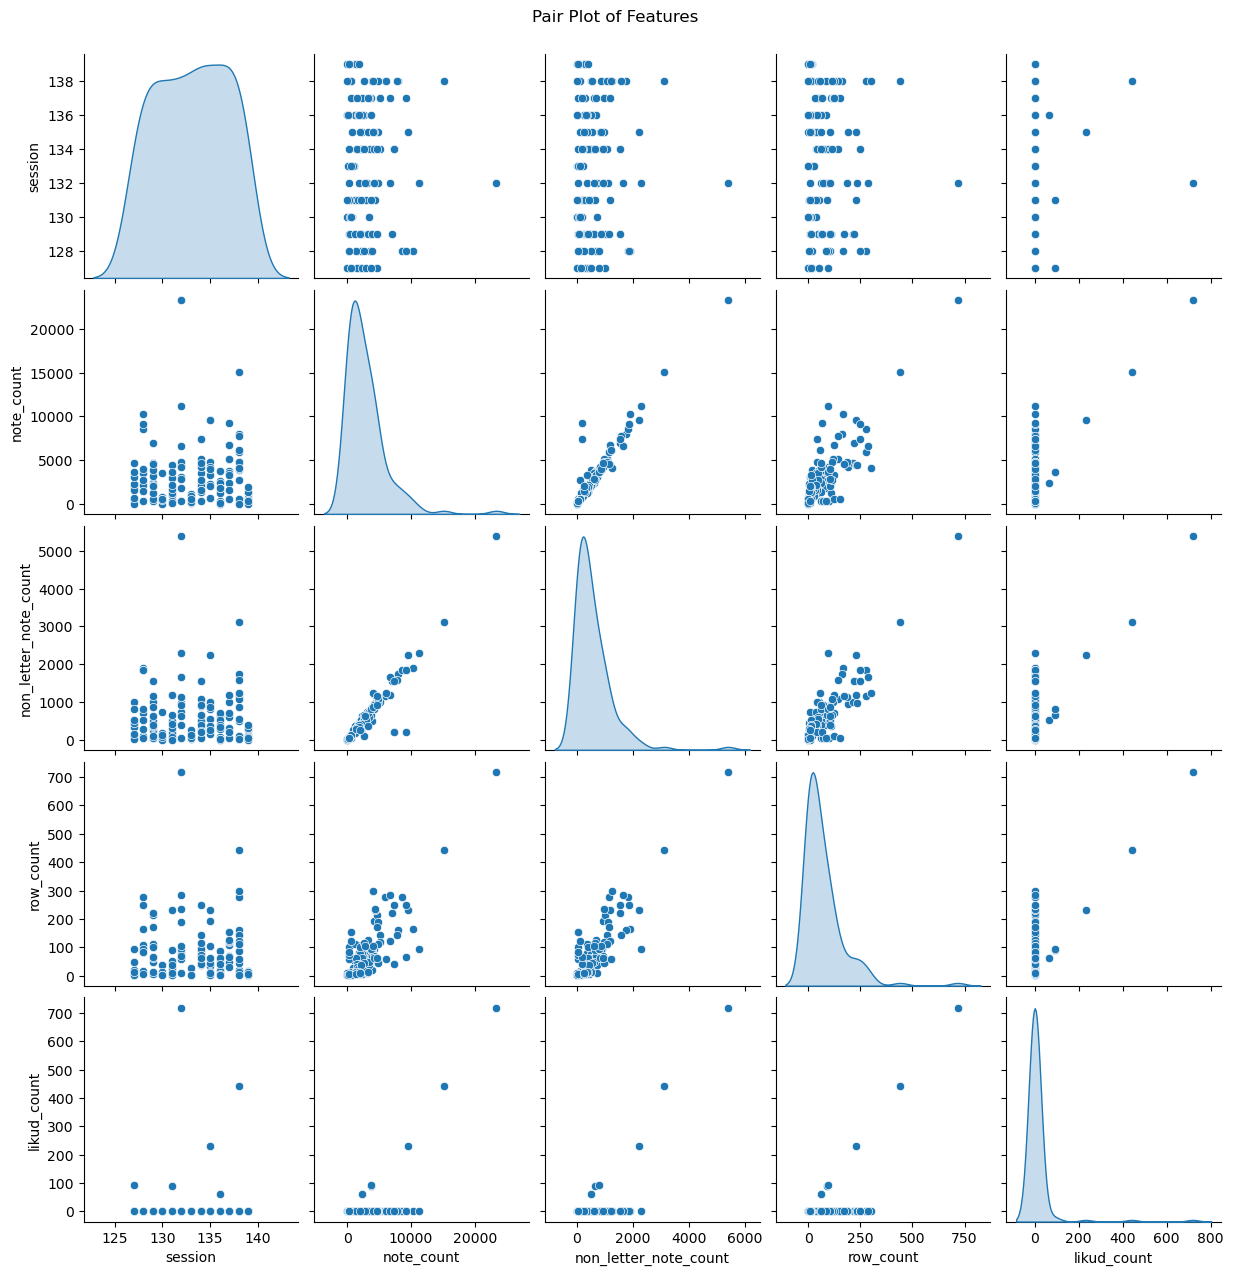

K-Fold Cross-Validation Results (5 folds):
  Mean RMSE: 0.80
  Mean R²: -6.03

Test Set Evaluation:
  RMSE: 114.13
  RMSE (% of Mean): 186.49%
  R²: 0.55
Final model trained and saved.


c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the func

In [ ]:
import pandas as pd
import numpy as np
import re
import pickle
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Function to count non-letter notes in text
def count_non_letter_notes(text):
    if pd.isna(text):
        return 0
    # Use regex to find words that contain non-letter characters
    non_letter_words = re.findall(r'\b\w*[^\w\s]\w*|\b\d+\b', text)
    return len(non_letter_words)

# Function to prepare training data
def prepare_training_data(data):
    """
    Prepares the training data by aggregating features and calculating required columns.
    """
    # Ensure text column exists
    data['text'] = data['text'].fillna("")

    # Calculate note_count
    data['note_count'] = data['text'].str.split().str.len().astype(int)

    # Calculate non_letter_note_count
    data['non_letter_note_count'] = data['text'].apply(count_non_letter_notes)

    # Aggregate features by session and party
    aggregated = data.groupby(['session', 'party']).agg(
        note_count=('note_count', 'sum'),
        non_letter_note_count=('non_letter_note_count', 'sum'),
        row_count=('text', 'count')
    ).reset_index()

    # Add target column for Likud count
    aggregated['likud_count'] = aggregated.apply(
        lambda row: row['row_count'] if row['party'] == "הליכוד" else 0, axis=1
    )

    return aggregated

# Function to visualize relationships with pair plots
def plot_pairplot(training_data):
    sns.pairplot(training_data, diag_kind="kde", markers="o")
    plt.suptitle("Pair Plot of Features", y=1.02)
    plt.show()

# Function to train model using K-Fold Cross-Validation
def train_model_with_kfold(training_data, test_data=None, k=5):
    """
    Trains a model using K-Fold Cross-Validation on the training data.
    Optionally evaluates the model on a separate test dataset.
    """
    # Define features (X) and target (y)
    X = training_data[['note_count', 'non_letter_note_count']].values
    y = training_data['likud_count'].values

    # Scale features and target
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()

    X_scaled = scaler_X.fit_transform(X)
    y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

    # Initialize K-Fold
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    model = LinearRegression()

    # Metrics for tracking performance
    rmse_scores = []
    r2_scores = []

    for train_idx, val_idx in kf.split(X_scaled):
        X_train, X_val = X_scaled[train_idx], X_scaled[val_idx]
        y_train, y_val = y_scaled[train_idx], y_scaled[val_idx]

        # Train the model
        model.fit(X_train, y_train)

        # Validate the model
        y_val_pred = model.predict(X_val)

        rmse = mean_squared_error(y_val, y_val_pred, squared=False)
        r2 = r2_score(y_val, y_val_pred)

        rmse_scores.append(rmse)
        r2_scores.append(r2)

    # Display cross-validation metrics
    print(f"K-Fold Cross-Validation Results ({k} folds):")
    print(f"  Mean RMSE: {np.mean(rmse_scores):.2f}")
    print(f"  Mean R²: {np.mean(r2_scores):.2f}")

    # Train the final model on all training data
    model.fit(X_scaled, y_scaled)

    # Optionally evaluate on the test dataset
    if test_data is not None:
        X_test = test_data[['note_count', 'non_letter_note_count']].values
        y_test = test_data['likud_count'].values

        X_test_scaled = scaler_X.transform(X_test)
        y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

        # Predictions on the test set
        y_test_pred_scaled = model.predict(X_test_scaled)
        y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()

        rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
        rmse_percentage = (rmse_test / np.mean(y_test)) * 100
        r2_test = r2_score(y_test, y_test_pred)

        print("\nTest Set Evaluation:")
        print(f"  RMSE: {rmse_test:.2f}")
        print(f"  RMSE (% of Mean): {rmse_percentage:.2f}%")
        print(f"  R²: {r2_test:.2f}")

    # Save scalers and model for later use
    with open('model_and_scalers.pkl', 'wb') as f:
        pickle.dump((model, scaler_X, scaler_y), f)

    print("Final model trained and saved.")
    return model, scaler_X, scaler_y

# Function to run the trained model on new data
def run_model(test_file):
    """
    Uses the trained model to predict Likud counts in the given test file.
    """
    # Load the trained model and scalers
    with open('model_and_scalers.pkl', 'rb') as f:
        model, scaler_X, scaler_y = pickle.load(f)

    # Load the test dataset
    data = pd.read_csv(test_file)

    # Prepare the data
    data = prepare_training_data(data)

    # Extract features
    X_test = data[['note_count', 'non_letter_note_count']].values
    X_test_scaled = scaler_X.transform(X_test)

    # Predict the scaled target and inverse transform it to original scale
    y_pred_scaled = model.predict(X_test_scaled)
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

    # Return the sum of predicted Likud counts
    return int(round(sum(y_pred)))

# Main script
if __name__ == "__main__":
    # Load dataset
    file_path = r"C:\Users\User\Downloads\processed_combined_data2.csv"
    data = pd.read_csv(file_path)

    # Prepare the dataset
    data = prepare_training_data(data)

    # Split the data into train and test sets
    train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

    # Visualize the data
    plot_pairplot(train_data)

    # Train the model and evaluate on the test set
    train_model_with_kfold(train_data, test_data, k=5)
